<a href="https://colab.research.google.com/github/Celsius1313/AdvancedAnalyticsML01/blob/main/DL_ReneWind_Main_Project_Celsio_Cosme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

## Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description

The data provided is a transformed version of the original data which was collected using sensors.

- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable.

# **Installing and Importing the necessary libraries**

In [ ]:
# Installing the libraries with the specified version
# !pip install --no-deps tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib===3.8.3 seaborn==0.13.2 numpy==1.26.4 pandas==2.2.2 -q --user --no-warn-script-location

In [ ]:
# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd                                                                                                             # Dataset manipulations library
import numpy as np                                                                                                              # Numbers Dataset Manipulations library
import matplotlib.pyplot as plt                                                                                                        # Visual Ploting library
import seaborn as sns                                                                                                           # Statistical Plots library
from sklearn.model_selection import train_test_split                                                                            # Train and Test selection funcion
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report    # Evaluation Metrics functions

import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import SGD, Adam

import time                                                                                                                     # Evaluating the time performance of machine learning models

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

# **Loading the Data**

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
main_data = pd.read_csv(r"C:\Users\P4773\Documents\Desktop_Folder_CelsioCosme_Work\McCOMBS UNIVERSITY OF TEXAS -- PGP - AIML\HANDS-ON PROJECTS\04. DEEP LEARNING PROJECT\RENE-WIND\Train.csv", delimiter=",")
test_data = pd.read_csv(r"C:\Users\P4773\Documents\Desktop_Folder_CelsioCosme_Work\McCOMBS UNIVERSITY OF TEXAS -- PGP - AIML\HANDS-ON PROJECTS\04. DEEP LEARNING PROJECT\RENE-WIND\Test.csv", delimiter=",")

In [ ]:
main_data

V1         V2        V3        V4        V5        V6        V7  \
0     -4.464606  -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1      3.365912   3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
2     -3.831843  -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   
3      1.618098   1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309   
4     -0.111440   3.872488 -3.758361 -2.982897  3.792714  0.544960  0.205433   
...         ...        ...       ...       ...       ...       ...       ...   
19995 -2.071318  -1.088279 -0.796174 -3.011720 -2.287540  2.807310  0.481428   
19996  2.890264   2.483069  5.643919  0.937053 -1.380870  0.412051 -1.593386   
19997 -3.896979  -3.942407 -0.351364 -2.417462  1.107546 -1.527623 -3.519882   
19998 -3.187322 -10.051662  5.695955 -4.370053 -5.354758 -1.873044 -3.947210   
19999 -2.686903   1.961187  6.137088  2.600133  2.657241 -4.290882 -2.344267   

             V8        V9       V10  ...       V32       V33        V34  \
0      0.050714 -1.522351  3.761892  ...  3.059700 -1.690440   2.846296   
1     -4.332135  0.565695 -0.101080  ... -1.795474  3.032780  -2.467514   
2     -3.173204 -2.081860  5.392621  ... -0.257101  0.803550   4.086219   
3     -2.493629  0.344926  2.118578  ... -3.584425 -2.577474   1.363769   
4      4.848994 -1.854920 -6.220023  ...  8.265896  6.629213 -10.068689   
...         ...       ...       ...  ...       ...       ...        ...   
19995  0.105171 -0.586599 -2.899398  ... -8.273996  5.745013   0.589014   
19996 -5.762498  2.150096  0.272302  ... -4.159092  1.181466  -0.742412   
19997  2.054792 -0.233996 -0.357687  ...  7.112162  1.476080  -3.953710   
19998  0.679420 -2.389254  5.456756  ...  0.402812  3.163661   3.752095   
19999  0.974004 -1.027462  0.497421  ...  6.620811 -1.988786  -1.348901   

            V35       V36       V37       V38       V39       V40  Target  
0      2.235198  6.667486  0.443809 -2.369169  2.950578 -3.480324       0  
1      1.894599 -2.297780 -1.731048  5.908837 -0.386345  0.616242       0  
2      2.292138  5.360850  0.351993  2.940021  3.839160 -4.309402       0  
3      0.622714  5.550100 -1.526796  0.138853  3.101430 -1.277378       0  
4      1.222987 -3.229763  1.686909 -2.163896 -3.644622  6.510338       0  
...         ...       ...       ...       ...       ...       ...     ...  
19995 -0.649988 -3.043174  2.216461  0.608723  0.178193  2.927755       1  
19996  5.368979 -0.693028 -1.668971  3.659954  0.819863 -1.987265       0  
19997  1.855555  5.029209  2.082588 -6.409304  1.477138 -0.874148       0  
19998  8.529894  8.450626  0.203958 -7.129918  4.249394 -6.112267       0  
19999  3.951801  5.449706 -0.455411 -2.202056  1.678229 -1.974413       0  

[20000 rows x 41 columns]

In [ ]:
test_data

V1        V2        V3        V4        V5        V6        V7  \
0    -0.613489 -3.819640  2.202302  1.300420 -1.184929 -4.495964 -1.835817   
1     0.389608 -0.512341  0.527053 -2.576776 -1.016766  2.235112 -0.441301   
2    -0.874861 -0.640632  4.084202 -1.590454  0.525855 -1.957592 -0.695367   
3     0.238384  1.458607  4.014528  2.534478  1.196987 -3.117330 -0.924035   
4     5.828225  2.768260 -1.234530  2.809264 -1.641648 -1.406698  0.568643   
...        ...       ...       ...       ...       ...       ...       ...   
4995 -5.120451  1.634804  1.251259  4.035944  3.291204 -2.932230 -1.328662   
4996 -5.172498  1.171653  1.579105  1.219922  2.529627 -0.668648 -2.618321   
4997 -1.114136 -0.403576 -1.764875 -5.879475  3.571558  3.710802 -2.482952   
4998 -1.703241  0.614650  6.220503 -0.104132  0.955916 -3.278706 -1.633855   
4999 -0.603701  0.959550 -0.720995  8.229574 -1.815610 -2.275547 -2.574524   

            V8        V9       V10  ...       V32       V33        V34  \
0     4.722989  1.206140 -0.341909  ...  2.291204 -5.411388   0.870073   
1    -4.405744 -0.332869  1.966794  ... -2.474936  2.493582   0.315165   
2     1.347309 -1.732348  0.466500  ... -1.318888 -2.997464   0.459664   
3     0.269493  1.322436  0.702345  ...  3.517918 -3.074085  -0.284220   
4     0.965043  1.918379 -2.774855  ...  1.773841 -1.501573  -2.226702   
...        ...       ...       ...  ...       ...       ...        ...   
4995  1.754066 -2.984586  1.248633  ...  9.979118  0.063438   0.217281   
4996 -2.000545  0.633791 -0.578938  ...  4.423900  2.603811  -2.152170   
4997 -0.307614 -0.921945 -2.999141  ...  3.791778  7.481506 -10.061396   
4998 -0.103936  1.388152 -1.065622  ... -4.100352 -5.949325   0.550372   
4999 -1.041479  4.129645 -2.731288  ...  2.369776 -1.062408   0.790772   

           V35       V36       V37        V38       V39       V40  Target  
0     0.574479  4.157191  1.428093 -10.511342  0.454664 -1.448363       0  
1     2.059288  0.683859 -0.485452   5.128350  1.720744 -1.488235       0  
2     0.619774  5.631504  1.323512  -1.752154  1.808302  1.675748       0  
3     0.954576  3.029331 -1.367198  -3.412140  0.906000 -2.450889       0  
4     4.776830 -6.559698 -0.805551  -0.276007 -3.858207 -0.537694       0  
...        ...       ...       ...        ...       ...       ...     ...  
4995  3.036388  2.109323 -0.557433   1.938718  0.512674 -2.694194       0  
4996  0.917401  2.156586  0.466963   0.470120  2.196756 -2.376515       0  
4997 -0.387166  1.848509  1.818248  -1.245633 -1.260876  7.474682       0  
4998 -1.573640  6.823936  2.139307  -4.036164  3.436051  0.579249       0  
4999  4.951955 -7.440825 -0.069506  -0.918083 -2.291154 -5.362891       0  

[5000 rows x 41 columns]

In [ ]:
main_data.head(10)

V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
2 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   
3  1.618098  1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309   
4 -0.111440  3.872488 -3.758361 -2.982897  3.792714  0.544960  0.205433   
5  0.159623 -4.233781 -0.264310 -5.477119 -0.190854 -0.356274 -0.134486   
6 -0.184565 -4.721470  0.864988 -3.078695 -2.226888 -1.282220 -0.804717   
7  1.734840  1.682945 -1.269070  4.600630 -1.416975 -2.543916  0.131648   
8  1.781583  1.314664  4.248690 -0.518293 -0.149044  0.033082 -1.087893   
9 -0.894140  4.011498  5.251902  3.320747  0.727067 -4.771070  1.031232   

         V8        V9       V10  ...       V32       V33        V34       V35  \
0  0.050714 -1.522351  3.761892  ...  3.059700 -1.690440   2.846296  2.235198   
1 -4.332135  0.565695 -0.101080  ... -1.795474  3.032780  -2.467514  1.894599   
2 -3.173204 -2.081860  5.392621  ... -0.257101  0.803550   4.086219  2.292138   
3 -2.493629  0.344926  2.118578  ... -3.584425 -2.577474   1.363769  0.622714   
4  4.848994 -1.854920 -6.220023  ...  8.265896  6.629213 -10.068689  1.222987   
5  4.066608 -3.858569  1.692441  ...  3.227235  0.628900  -1.548860  1.321979   
6  3.289733 -1.567971  0.749904  ... -0.544941 -0.762921   0.815558  1.889373   
7 -0.198661  3.094057 -1.109324  ...  1.717474 -3.838931   1.569448  1.794899   
8 -3.117561  0.624935  1.567455  ...  1.611014  2.951390  -1.862016  4.389598   
9  3.632080 -1.391444 -1.966746  ... -0.635742 -4.449139   2.296340  1.575110   

        V36       V37       V38       V39       V40  Target  
0  6.667486  0.443809 -2.369169  2.950578 -3.480324       0  
1 -2.297780 -1.731048  5.908837 -0.386345  0.616242       0  
2  5.360850  0.351993  2.940021  3.839160 -4.309402       0  
3  5.550100 -1.526796  0.138853  3.101430 -1.277378       0  
4 -3.229763  1.686909 -2.163896 -3.644622  6.510338       0  
5  5.461345  1.109410 -3.869993  0.273964  2.805941       0  
6  3.624347  1.555740 -5.432884  0.678703  0.464697       0  
7 -4.268517 -0.516195 -0.619218 -0.830889 -4.967266       1  
8  1.371300 -2.516235  0.770496  0.831132 -2.310953       0  
9  1.376268  0.596757 -1.413652  0.543871  0.035020       0  

[10 rows x 41 columns]

In [ ]:
main_data.tail(10)

V1         V2        V3        V4        V5        V6        V7  \
19990 -0.579836  -2.629670  0.474419 -2.671421 -2.323783 -1.830285 -0.112126   
19991  6.826134   3.141716  6.575012 -4.684994 -1.978555  1.552752  1.268366   
19992 -0.730383  -8.463166  1.111823 -8.918874 -2.309441  2.902515 -4.203021   
19993  0.250887  -5.068987  5.866389 -5.048788 -1.226417 -2.077842 -3.638690   
19994 -2.546629  -2.370481 -0.728626 -0.947777  1.417739 -2.489878 -0.820629   
19995 -2.071318  -1.088279 -0.796174 -3.011720 -2.287540  2.807310  0.481428   
19996  2.890264   2.483069  5.643919  0.937053 -1.380870  0.412051 -1.593386   
19997 -3.896979  -3.942407 -0.351364 -2.417462  1.107546 -1.527623 -3.519882   
19998 -3.187322 -10.051662  5.695955 -4.370053 -5.354758 -1.873044 -3.947210   
19999 -2.686903   1.961187  6.137088  2.600133  2.657241 -4.290882 -2.344267   

             V8        V9       V10  ...       V32       V33       V34  \
19990  3.581327 -1.085178 -1.369451  ... -1.940408 -0.769011  0.802292   
19991 -5.975145  0.297224  2.047525  ... -7.818127  0.765248 -0.539477   
19992 -3.019003 -0.093653  2.472905  ... -2.711114  3.624536 -3.264870   
19993  0.940573  0.851951  0.056203  ... -2.642109 -2.768446 -2.611676   
19994  4.790304 -2.949182  0.209342  ...  5.798262 -2.451336 -0.697349   
19995  0.105171 -0.586599 -2.899398  ... -8.273996  5.745013  0.589014   
19996 -5.762498  2.150096  0.272302  ... -4.159092  1.181466 -0.742412   
19997  2.054792 -0.233996 -0.357687  ...  7.112162  1.476080 -3.953710   
19998  0.679420 -2.389254  5.456756  ...  0.402812  3.163661  3.752095   
19999  0.974004 -1.027462  0.497421  ...  6.620811 -1.988786 -1.348901   

            V35       V36       V37       V38       V39       V40  Target  
19990  1.814545  1.657435  2.424586 -4.565140  0.827243  0.228813       0  
19991  4.031437  2.270127 -2.454773  5.460646  2.018346  0.081557       0  
19992  2.393250  7.795103  2.312051 -3.950337  3.226444  1.138433       0  
19993  1.853566  9.387797  2.556526 -9.389720  2.845682  1.878341       0  
19994  0.460678  4.298600  1.973705 -3.613722  0.165335  1.342830       0  
19995 -0.649988 -3.043174  2.216461  0.608723  0.178193  2.927755       1  
19996  5.368979 -0.693028 -1.668971  3.659954  0.819863 -1.987265       0  
19997  1.855555  5.029209  2.082588 -6.409304  1.477138 -0.874148       0  
19998  8.529894  8.450626  0.203958 -7.129918  4.249394 -6.112267       0  
19999  3.951801  5.449706 -0.455411 -2.202056  1.678229 -1.974413       0  

[10 rows x 41 columns]

In [ ]:
test_data.head(10)

V1        V2        V3        V4        V5        V6        V7  \
0 -0.613489 -3.819640  2.202302  1.300420 -1.184929 -4.495964 -1.835817   
1  0.389608 -0.512341  0.527053 -2.576776 -1.016766  2.235112 -0.441301   
2 -0.874861 -0.640632  4.084202 -1.590454  0.525855 -1.957592 -0.695367   
3  0.238384  1.458607  4.014528  2.534478  1.196987 -3.117330 -0.924035   
4  5.828225  2.768260 -1.234530  2.809264 -1.641648 -1.406698  0.568643   
5 -1.885713 -1.964160  0.245667 -1.187255  0.027369 -2.214094 -0.605558   
6 -1.836429  1.216661 -0.186460  0.232731  1.752135 -1.982141  0.637039   
7 -1.649117  0.646787  2.657947  1.395099  0.725959  0.305211 -1.877257   
8 -2.744431 -5.870927  1.169155 -1.586454 -2.215360 -3.561773 -2.037385   
9 -0.247320 -1.130009  4.584899  0.051528  0.044828 -2.527062 -1.643095   

         V8        V9       V10  ...       V32       V33       V34       V35  \
0  4.722989  1.206140 -0.341909  ...  2.291204 -5.411388  0.870073  0.574479   
1 -4.405744 -0.332869  1.966794  ... -2.474936  2.493582  0.315165  2.059288   
2  1.347309 -1.732348  0.466500  ... -1.318888 -2.997464  0.459664  0.619774   
3  0.269493  1.322436  0.702345  ...  3.517918 -3.074085 -0.284220  0.954576   
4  0.965043  1.918379 -2.774855  ...  1.773841 -1.501573 -2.226702  4.776830   
5  3.434368 -2.366542  0.238592  ...  3.481445 -1.241937  0.165481  1.938014   
6  3.654029 -2.891643 -0.882726  ...  3.697508 -1.371313 -0.267922  0.385374   
7 -3.814487  2.273639  0.434063  ... -1.082314  0.530939 -0.290736 -0.219059   
8  2.782849 -0.687223  1.527678  ...  0.172074 -5.489960  3.224386  1.433453   
9  1.042020 -0.059002  0.751700  ...  1.133185 -2.171650 -0.245509  2.071918   

        V36       V37        V38       V39       V40  Target  
0  4.157191  1.428093 -10.511342  0.454664 -1.448363       0  
1  0.683859 -0.485452   5.128350  1.720744 -1.488235       0  
2  5.631504  1.323512  -1.752154  1.808302  1.675748       0  
3  3.029331 -1.367198  -3.412140  0.906000 -2.450889       0  
4 -6.559698 -0.805551  -0.276007 -3.858207 -0.537694       0  
5  3.174898  1.513700  -2.634459  0.694483 -0.169500       0  
6  1.392039  1.195155   0.104975 -0.258228  1.581771       0  
7  1.364707 -0.565783   0.605945  1.772588 -1.977966       0  
8  6.421956  3.016854  -5.953351  3.084918 -2.982987       0  
9  4.719610  0.033392  -4.396785  1.221412 -0.531737       0  

[10 rows x 41 columns]

In [ ]:
test_data.tail(10)

V1        V2        V3        V4        V5        V6        V7  \
4990  0.346325  2.798803  3.350848 -2.140356  2.473873 -1.792833 -0.812149   
4991 -6.146209 -2.895358  5.717660  2.677663  0.591271 -2.658867 -4.353942   
4992 -2.221440 -1.466118  0.775687 -0.495688  0.747413 -1.738130 -0.756338   
4993 -1.206023  3.927584  0.212296 -1.189733  1.246608 -0.086468  0.157855   
4994 -2.917370 -2.024932  1.099793 -1.997568  2.489529 -1.411940 -3.588022   
4995 -5.120451  1.634804  1.251259  4.035944  3.291204 -2.932230 -1.328662   
4996 -5.172498  1.171653  1.579105  1.219922  2.529627 -0.668648 -2.618321   
4997 -1.114136 -0.403576 -1.764875 -5.879475  3.571558  3.710802 -2.482952   
4998 -1.703241  0.614650  6.220503 -0.104132  0.955916 -3.278706 -1.633855   
4999 -0.603701  0.959550 -0.720995  8.229574 -1.815610 -2.275547 -2.574524   

            V8        V9       V10  ...       V32       V33        V34  \
4990  1.555741 -0.537242 -2.696862  ...  2.153635 -0.319363  -5.045356   
4991 -1.215816 -1.036671  3.950797  ...  8.187397  3.280644   1.023940   
4992  2.495991 -1.967265  0.303927  ...  2.289260 -1.790380   0.316837   
4993 -1.317988  0.970073 -3.747191  ... -2.509357  0.501016  -2.355198   
4994  0.486875 -0.153225 -0.186815  ...  6.755191 -0.026051  -4.833377   
4995  1.754066 -2.984586  1.248633  ...  9.979118  0.063438   0.217281   
4996 -2.000545  0.633791 -0.578938  ...  4.423900  2.603811  -2.152170   
4997 -0.307614 -0.921945 -2.999141  ...  3.791778  7.481506 -10.061396   
4998 -0.103936  1.388152 -1.065622  ... -4.100352 -5.949325   0.550372   
4999 -1.041479  4.129645 -2.731288  ...  2.369776 -1.062408   0.790772   

           V35       V36       V37       V38       V39       V40  Target  
4990  1.175298  3.542540  1.211428 -2.557570  0.424029  3.358153       0  
4991  6.255137  5.789272 -1.789318 -2.663849  3.077153 -6.805379       0  
4992  0.499267  3.479255  1.427283 -1.832676  0.792145  0.664632       0  
4993 -0.705423 -0.902603  2.092649  2.448642  1.319697  1.057325       0  
4994  1.519867  6.006719  1.714545 -4.080330  1.555300  0.355005       0  
4995  3.036388  2.109323 -0.557433  1.938718  0.512674 -2.694194       0  
4996  0.917401  2.156586  0.466963  0.470120  2.196756 -2.376515       0  
4997 -0.387166  1.848509  1.818248 -1.245633 -1.260876  7.474682       0  
4998 -1.573640  6.823936  2.139307 -4.036164  3.436051  0.579249       0  
4999  4.951955 -7.440825 -0.069506 -0.918083 -2.291154 -5.362891       0  

[10 rows x 41 columns]

# **Data Overview**

In [ ]:
# Verifing the rows and columns
print("The Main dataset have {} rows and {} columns".format(main_data.shape[0], main_data.shape[1]))
print("The Testing dataset have {} rows and {} columns".format(test_data.shape[0], test_data.shape[1]))

The Main dataset have 20000 rows and 41 columns
The Testing dataset have 5000 rows and 41 columns


In [ ]:
# Checking the data types into Main dataset
print("Main Dataset 'Info'", end="\n")
print("*"*40)
print(main_data.info())

Main Dataset 'Info'
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     200

##### **Observations:**
The Main dataset (That will be used for Training and Validation) as 2 types of data:
* float (40 columns - Predictors);
* integer (1 column - Target Variable).

In [ ]:
# Checking the data types into Main dataset
print("Testing Dataset 'Info'", end="\n")
print("*"*40)
print(test_data.info())

Testing Dataset 'Info'
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     50

##### **Observations:**
The Testing dataset as 2 types of data like Main dataset:
* float (40 columns - Predictors);
* integer (1 column - Target Variable).

In [ ]:
# Validating duplicated rows in both datasets
print("'Main dataset' have {} duplicated rows and the 'Testing dataset' have {} rows.".format(main_data.duplicated().sum(), test_data.duplicated().sum()))

'Main dataset' have 0 duplicated rows and the 'Testing dataset' have 0 rows.


##### **Observations:**
* In both datasets haven't duplicated rows.

In [ ]:
# Checking the columns of 'Main Dataset' with 'null' values
print("'Null' values - Main Dataset")
print(main_data.isnull().sum()[main_data.isnull().sum() > 0], "\n")
print("'Null' values in percentage - Main Dataset")
print(main_data.isnull().sum()[main_data.isnull().sum() > 0] / main_data.isnull().count()[main_data.isnull().sum() > 0] * 100)


'Null' values - Main Dataset
V1    18
V2    18
dtype: int64 

'Null' values in percentage - Main Dataset
V1    0.09
V2    0.09
dtype: float64


In [ ]:
# Checking the columns of 'Main Dataset' with 'na' values
print("'Na' values")
print(main_data.isna().sum()[main_data.isna().sum() > 0], "\n")
print("'Na' values in percentage")
print(main_data.isna().sum()[main_data.isna().sum() > 0] / main_data.isna().count()[main_data.isna().sum() > 0] * 100)


'Na' values
V1    18
V2    18
dtype: int64 

'Na' values in percentage
V1    0.09
V2    0.09
dtype: float64


##### **Observations:**
For Main dataset we have:
* 0.09% of "null" values in V1 and V2 columns;
* 0.09% of "na" values in V1 and V2 columns.

In [ ]:
# Checking the columns of 'Testing Dataset' with 'null' values
print("'Null' values - Testing Dataset")
print(test_data.isnull().sum()[test_data.isnull().sum() > 0], "\n")
print("'Null' values in percentage - Testing Dataset")
print(test_data.isnull().sum()[test_data.isnull().sum() > 0] / test_data.isnull().count()[test_data.isnull().sum() > 0] * 100)

'Null' values - Testing Dataset
V1    5
V2    6
dtype: int64 

'Null' values in percentage - Testing Dataset
V1    0.10
V2    0.12
dtype: float64


In [ ]:
# Checking the columns of 'Testing Dataset' with 'na' values
print("'Na' values - Testing Dataset")
print(test_data.isna().sum()[test_data.isna().sum() > 0], "\n")
print("'Na' values in percentage - Testing Dataset")
print(test_data.isna().sum()[test_data.isna().sum() > 0] / test_data.isna().count()[test_data.isna().sum() > 0] * 100)

'Na' values - Testing Dataset
V1    5
V2    6
dtype: int64 

'Na' values in percentage - Testing Dataset
V1    0.10
V2    0.12
dtype: float64


##### **Observations:**
For Testing dataset we have:
* 0.10% for V1 and 0.12% for V2 columns according to "null" values;
* 0.10% for V1 and 0.12% for V2 columns according to "na" values;

In [ ]:
# Checking the 'Failures' == 1 and 'No Failures' == 0 in Main Dataset
print(main_data["Target"].value_counts())
print("*"*30)
print(main_data["Target"].value_counts(normalize=True) * 100)

Target
0    18890
1     1110
Name: count, dtype: int64
******************************
Target
0    94.45
1     5.55
Name: proportion, dtype: float64


##### **Observations:**
For Main dataset we have 94.45% of **no failure** and 5.55% of **failure** in wind turbines.

In [ ]:
# Checking the 'Failures' == 1 and 'No Failures' == 0 in Testing Dataset
print(test_data["Target"].value_counts())
print("*"*30)
print(test_data["Target"].value_counts(normalize=True) * 100)

Target
0    4718
1     282
Name: count, dtype: int64
******************************
Target
0    94.36
1     5.64
Name: proportion, dtype: float64


##### **Observations:**
For Testing dataset we have 94.36% of **no failure** and 5.64% of **failure** in wind turbines.

In [ ]:
main_data.describe().T

count      mean       std        min       25%       50%       75%  \
V1      19982.0 -0.271996  3.441625 -11.876451 -2.737146 -0.747917  1.840112   
V2      19982.0  0.440430  3.150784 -12.319951 -1.640674  0.471536  2.543967   
V3      20000.0  2.484699  3.388963 -10.708139  0.206860  2.255786  4.566165   
V4      20000.0 -0.083152  3.431595 -15.082052 -2.347660 -0.135241  2.130615   
V5      20000.0 -0.053752  2.104801  -8.603361 -1.535607 -0.101952  1.340480   
V6      20000.0 -0.995443  2.040970 -10.227147 -2.347238 -1.000515  0.380330   
V7      20000.0 -0.879325  1.761626  -7.949681 -2.030926 -0.917179  0.223695   
V8      20000.0 -0.548195  3.295756 -15.657561 -2.642665 -0.389085  1.722965   
V9      20000.0 -0.016808  2.160568  -8.596313 -1.494973 -0.067597  1.409203   
V10     20000.0 -0.012998  2.193201  -9.853957 -1.411212  0.100973  1.477045   
V11     20000.0 -1.895393  3.124322 -14.832058 -3.922404 -1.921237  0.118906   
V12     20000.0  1.604825  2.930454 -12.948007 -0.396514  1.507841  3.571454   
V13     20000.0  1.580486  2.874658 -13.228247 -0.223545  1.637185  3.459886   
V14     20000.0 -0.950632  1.789651  -7.738593 -2.170741 -0.957163  0.270677   
V15     20000.0 -2.414993  3.354974 -16.416606 -4.415322 -2.382617 -0.359052   
V16     20000.0 -2.925225  4.221717 -20.374158 -5.634240 -2.682705 -0.095046   
V17     20000.0 -0.134261  3.345462 -14.091184 -2.215611 -0.014580  2.068751   
V18     20000.0  1.189347  2.592276 -11.643994 -0.403917  0.883398  2.571770   
V19     20000.0  1.181808  3.396925 -13.491784 -1.050168  1.279061  3.493299   
V20     20000.0  0.023608  3.669477 -13.922659 -2.432953  0.033415  2.512372   
V21     20000.0 -3.611252  3.567690 -17.956231 -5.930360 -3.532888 -1.265884   
V22     20000.0  0.951835  1.651547 -10.122095 -0.118127  0.974687  2.025594   
V23     20000.0 -0.366116  4.031860 -14.866128 -3.098756 -0.262093  2.451750   
V24     20000.0  1.134389  3.912069 -16.387147 -1.468062  0.969048  3.545975   
V25     20000.0 -0.002186  2.016740  -8.228266 -1.365178  0.025050  1.397112   
V26     20000.0  1.873785  3.435137 -11.834271 -0.337863  1.950531  4.130037   
V27     20000.0 -0.612413  4.368847 -14.904939 -3.652323 -0.884894  2.189177   
V28     20000.0 -0.883218  1.917713  -9.269489 -2.171218 -0.891073  0.375884   
V29     20000.0 -0.985625  2.684365 -12.579469 -2.787443 -1.176181  0.629773   
V30     20000.0 -0.015534  3.005258 -14.796047 -1.867114  0.184346  2.036229   
V31     20000.0  0.486842  3.461384 -13.722760 -1.817772  0.490304  2.730688   
V32     20000.0  0.303799  5.500400 -19.876502 -3.420469  0.052073  3.761722   
V33     20000.0  0.049825  3.575285 -16.898353 -2.242857 -0.066249  2.255134   
V34     20000.0 -0.462702  3.183841 -17.985094 -2.136984 -0.255008  1.436935   
V35     20000.0  2.229620  2.937102 -15.349803  0.336191  2.098633  4.064358   
V36     20000.0  1.514809  3.800860 -14.833178 -0.943809  1.566526  3.983939   
V37     20000.0  0.011316  1.788165  -5.478350 -1.255819 -0.128435  1.175533   
V38     20000.0 -0.344025  3.948147 -17.375002 -2.987638 -0.316849  2.279399   
V39     20000.0  0.890653  1.753054  -6.438880 -0.272250  0.919261  2.057540   
V40     20000.0 -0.875630  3.012155 -11.023935 -2.940193 -0.920806  1.119897   
Target  20000.0  0.055500  0.228959   0.000000  0.000000  0.000000  0.000000   

              max  
V1      15.493002  
V2      13.089269  
V3      17.090919  
V4      13.236381  
V5       8.133797  
V6       6.975847  
V7       8.006091  
V8      11.679495  
V9       8.137580  
V10      8.108472  
V11     11.826433  
V12     15.080698  
V13     15.419616  
V14      5.670664  
V15     12.246455  
V16     13.583212  
V17     16.756432  
V18     13.179863  
V19     13.237742  
V20     16.052339  
V21     13.840473  
V22      7.409856  
V23     14.458734  
V24     17.163291  
V25      8.223389  
V26     16.836410  
V27     17.560404  
V28      6.527643  
V29     10.722055  
V30     12.505812  
V31     17.255090  
V32     2

In [ ]:
test_data.describe().T

count      mean       std        min       25%       50%       75%  \
V1      4995.0 -0.277622  3.466280 -12.381696 -2.743691 -0.764767  1.831313   
V2      4994.0  0.397928  3.139562 -10.716179 -1.649211  0.427369  2.444486   
V3      5000.0  2.551787  3.326607  -9.237940  0.314931  2.260428  4.587000   
V4      5000.0 -0.048943  3.413937 -14.682446 -2.292694 -0.145753  2.166468   
V5      5000.0 -0.080120  2.110870  -7.711569 -1.615238 -0.131890  1.341197   
V6      5000.0 -1.042138  2.005444  -8.924196 -2.368853 -1.048571  0.307555   
V7      5000.0 -0.907922  1.769017  -8.124230 -2.054259 -0.939695  0.212228   
V8      5000.0 -0.574592  3.331911 -12.252731 -2.642088 -0.357943  1.712896   
V9      5000.0  0.030121  2.174139  -6.785495 -1.455712 -0.079891  1.449548   
V10     5000.0  0.018524  2.145437  -8.170956 -1.353320  0.166292  1.511248   
V11     5000.0 -2.008615  3.112220 -13.151753 -4.050432 -2.043122  0.044069   
V12     5000.0  1.576413  2.907401  -8.164048 -0.449674  1.488253  3.562626   
V13     5000.0  1.622456  2.882892 -11.548209 -0.126012  1.718649  3.464604   
V14     5000.0 -0.921097  1.803470  -7.813929 -2.110952 -0.896011  0.272324   
V15     5000.0 -2.452174  3.387041 -15.285768 -4.479072 -2.417131 -0.432943   
V16     5000.0 -3.018503  4.264407 -20.985779 -5.648343 -2.773763 -0.178105   
V17     5000.0 -0.103721  3.336513 -13.418281 -2.227683  0.047462  2.111907   
V18     5000.0  1.195606  2.586403 -12.214016 -0.408850  0.881395  2.604014   
V19     5000.0  1.210490  3.384662 -14.169635 -1.026394  1.295864  3.526278   
V20     5000.0  0.138429  3.657171 -13.719620 -2.325454  0.193386  2.539550   
V21     5000.0 -3.664398  3.577841 -16.340707 -5.944369 -3.662870 -1.329645   
V22     5000.0  0.961960  1.640414  -6.740239 -0.047728  0.986020  2.029321   
V23     5000.0 -0.422182  4.056714 -14.422274 -3.162690 -0.279222  2.425911   
V24     5000.0  1.088841  3.968207 -12.315545 -1.623203  0.912815  3.537195   
V25     5000.0  0.061235  2.010227  -6.770139 -1.298377  0.076703  1.428491   
V26     5000.0  1.847261  3.400330 -11.414019 -0.242470  1.917032  4.156106   
V27     5000.0 -0.552397  4.402947 -13.177038 -3.662591 -0.871982  2.247257   
V28     5000.0 -0.867678  1.926181  -7.933388 -2.159811 -0.930695  0.420587   
V29     5000.0 -1.095805  2.655454  -9.987800 -2.861373 -1.340547  0.521843   
V30     5000.0 -0.118699  3.023292 -12.438434 -1.996743  0.112463  1.946450   
V31     5000.0  0.468810  3.446324 -11.263271 -1.822421  0.485742  2.779008   
V32     5000.0  0.232567  5.585628 -17.244168 -3.556267 -0.076694  3.751857   
V33     5000.0 -0.080115  3.538624 -14.903781 -2.348121 -0.159713  2.099160   
V34     5000.0 -0.392663  3.166101 -14.699725 -2.009604 -0.171745  1.465402   
V35     5000.0  2.211205  2.948426 -12.260591  0.321818  2.111750  4.031639   
V36     5000.0  1.594845  3.774970 -12.735567 -0.866066  1.702964  4.104409   
V37     5000.0  0.022931  1.785320  -5.079070 -1.240526 -0.110415  1.237522   
V38     5000.0 -0.405659  3.968936 -15.334533 -2.984480 -0.381162  2.287998   
V39     5000.0  0.938800  1.716502  -5.451050 -0.208024  0.959152  2.130769   
V40     5000.0 -0.932406  2.978193 -10.076234 -2.986587 -1.002764  1.079738   
Target  5000.0  0.056400  0.230716   0.000000  0.000000  0.000000  0.000000   

              max  
V1      13.504352  
V2      14.079073  
V3      15.314503  
V4      12.140157  
V5       7.672835  
V6       5.067685  
V7       7.616182  
V8      10.414722  
V9       8.850720  
V10      6.598728  
V11      9.956400  
V12     12.983644  
V13     12.620041  
V14      5.734112  
V15     11.673420  
V16     13.975843  
V17     19.776592  
V18     13.642235  
V19     12.427997  
V20     13.870565  
V21     11.046925  
V22      7.505291  
V23     13.180887  
V24     17.806035  
V25      6.556937  
V26     17.528193  
V27     17.290161  
V28      7.415659  
V29     14.039466  
V30     10.314976  
V31     12.558928  
V32     26.539391  
V33     13.323517  
V34     12

In [ ]:
# Coverting the Target Variable in both dataset to float64
main_data["Target"] = main_data["Target"].astype("float64")
test_data["Target"] = test_data["Target"].astype("float64")

In [ ]:
print("The Target Variable for Main Dataset is '{}', and for Testing Dataset is '{}'.".format(main_data.dtypes.Target, test_data.dtypes.Target))

The Target Variable for Main Dataset is 'float64', and for Testing Dataset is 'float64'.


# **Exploratory Data Analysis**

## Univariate analysis

Total columns to plot: 40



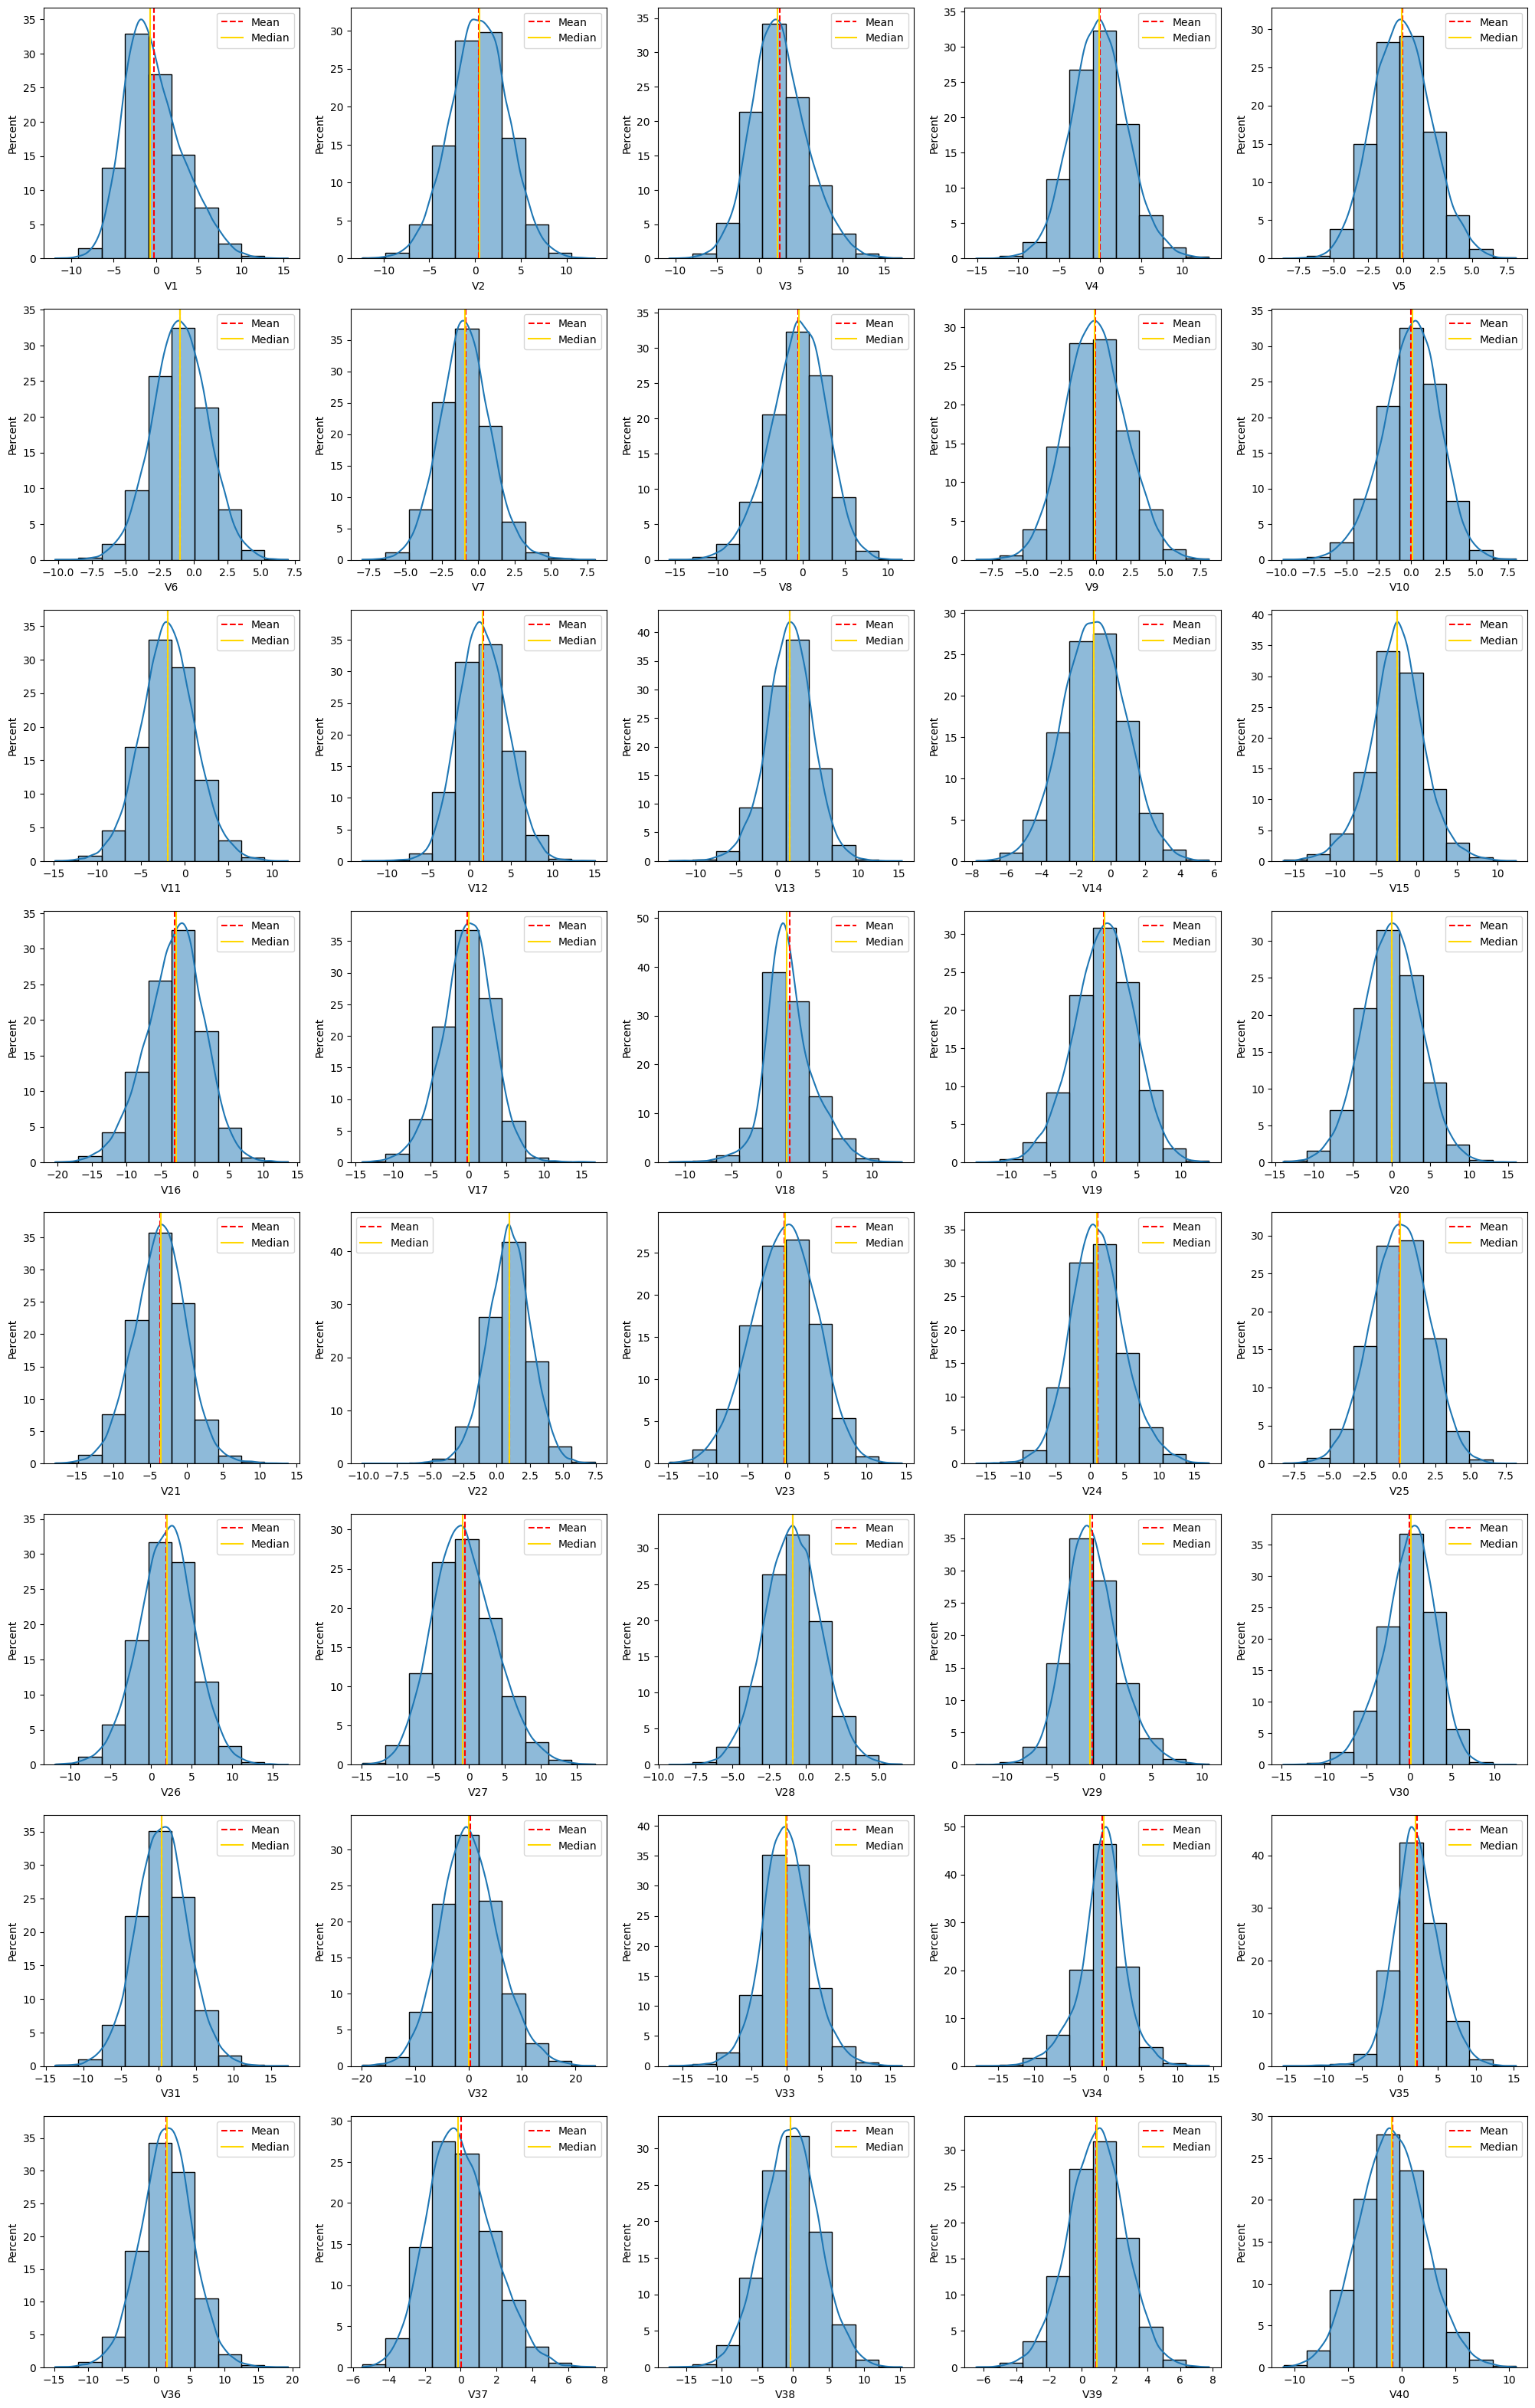

In [ ]:
col_list = main_data.select_dtypes(include="float64").columns.to_list()
col_list.remove("Target")

print("Total columns to plot: {}".format(len(col_list)), end="\n\n")

plt_cols = 5
plt_rows = int(len(col_list) / plt_cols)

plt.figure(figsize=(25, plt_rows * plt_cols))
for index, column_name in enumerate(col_list):
    plt.subplot(plt_rows, plt_cols, index + 1)
    sns.histplot(main_data, x=column_name, bins=10, kde=True, stat="percent")
    plt.axvline(main_data[column_name].mean(), color="red", linestyle="--", label="Mean")
    plt.axvline(main_data[column_name].median(), color="gold", linestyle="-", label="Median")
    plt.legend();

##### **Observations:**
* The histgrams above show us that most values (**at least 60%**) of independet variables can vary from **-2** to **+3**;
* The histgrams above show us that the central values (Median) and average values are close to **0**.

In [ ]:
def hist_boxplot(data, independent_var, figsize=(10, 6), kde=True, bins=10):
    """
    This function plots a Histogram and a Boxplot together
    data: dataframe
    independent_var: are the columns in X axis
    """
    func, (ax_box, ax_hist) = plt.subplots(
        nrows = 2,
        ncols = 1,
        sharex = True,
        gridspec_kw = {"height_ratios": (.25, .75)},
        figsize = figsize
    )

    sns.boxplot(
        data, x=independent_var, ax=ax_box, showmeans=True, color="orange" # boxplot will be created and a triangle will indicate the mean value of the column
    )
    sns.histplot(
        data=data, x=independent_var, kde=kde, ax=ax_hist, bins=bins
    ) if bins else sns.histplot(
        data=data, x=independent_var, kde=kde, ax=ax_hist
    )
    ax_hist.axvline(
        data[independent_var].mean(), color="green", linestyle="--" # Mean line into the histogram
    )
    ax_hist.axvline(
        data[independent_var].median(), color="black", linestyle="-" # Median line into the histogram
    )

Total columns to plot: 40



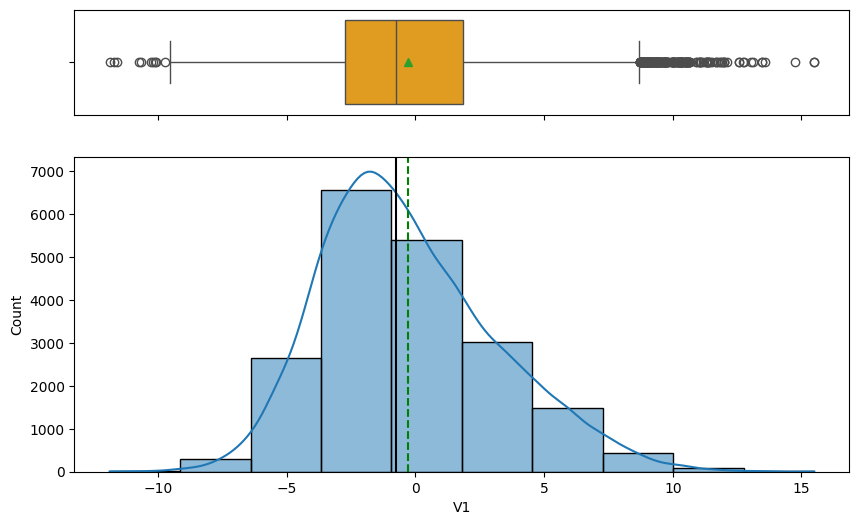

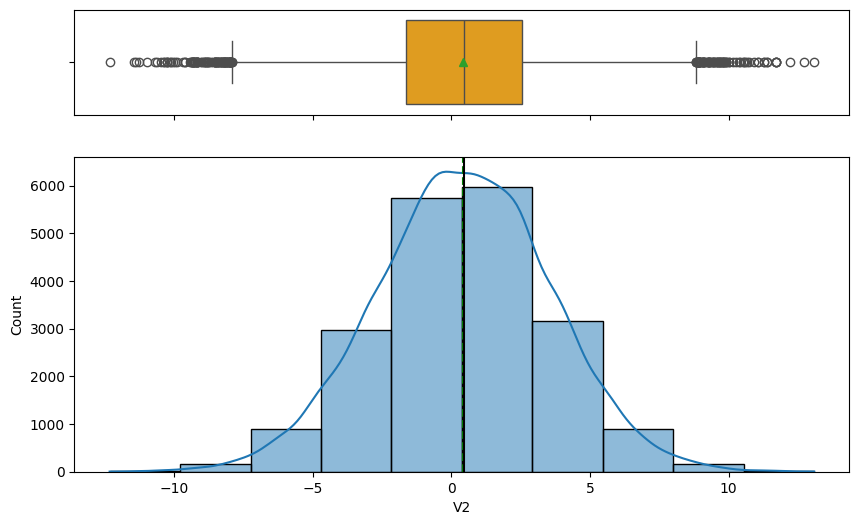

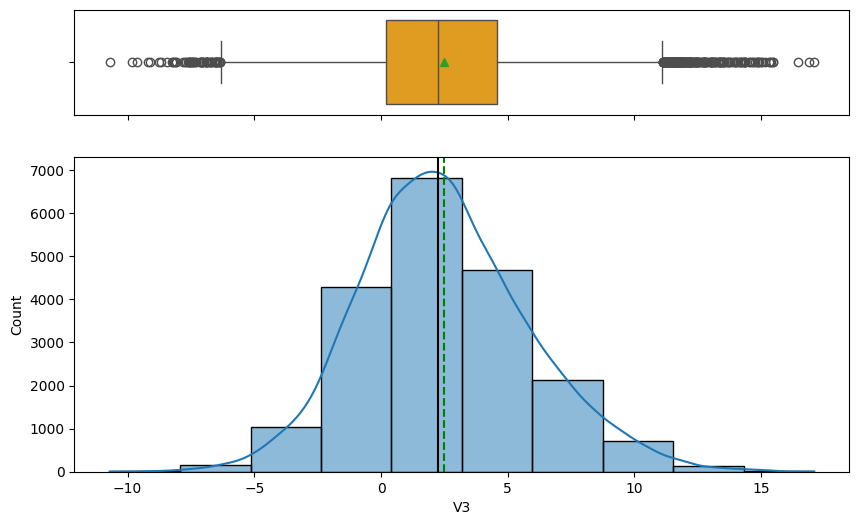

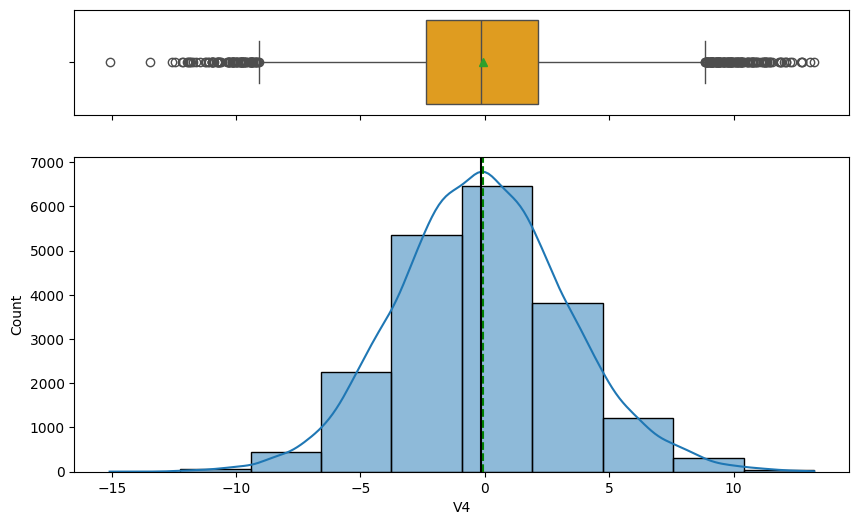

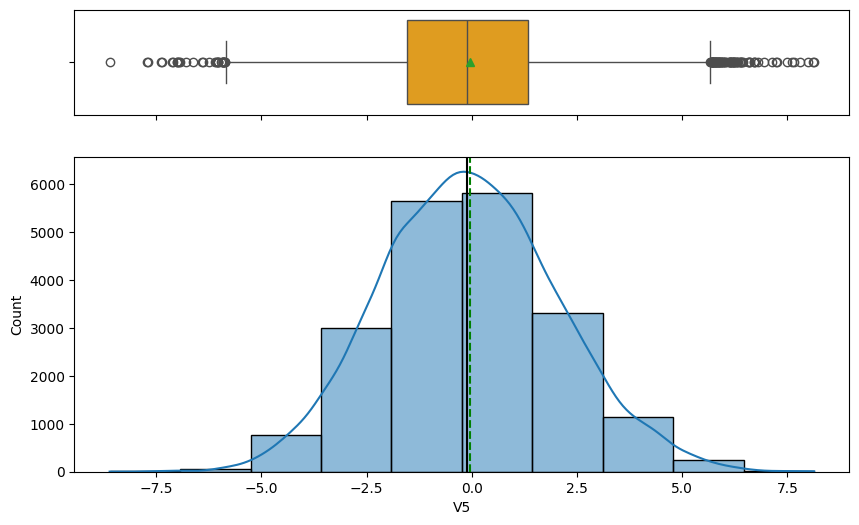

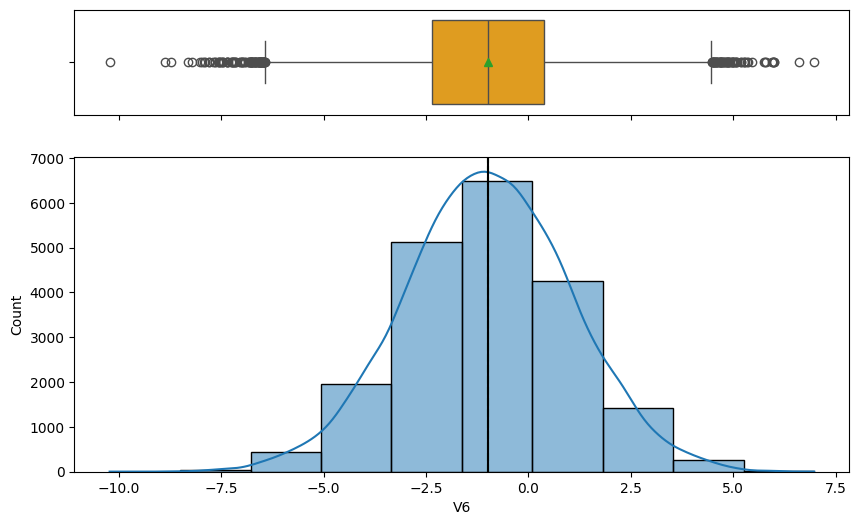

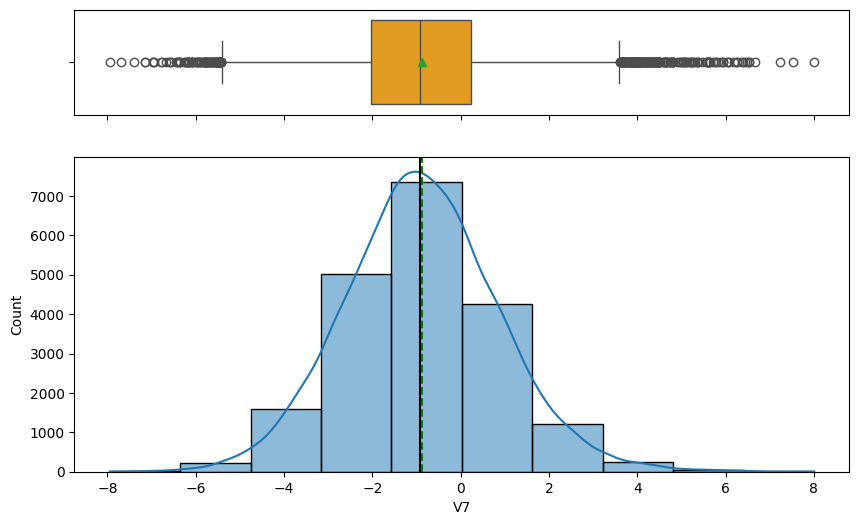

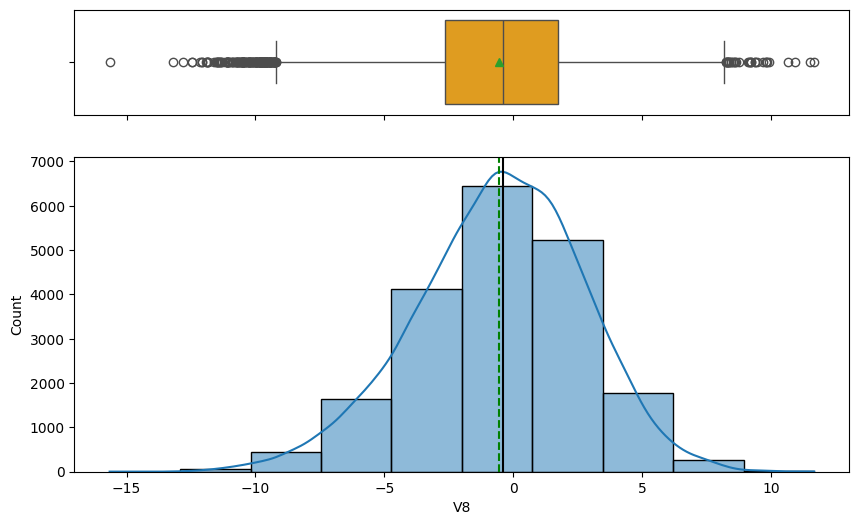

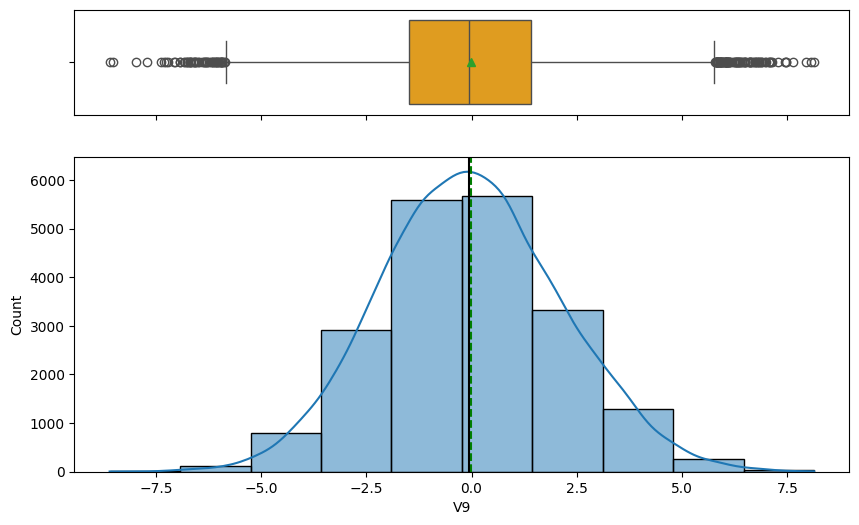

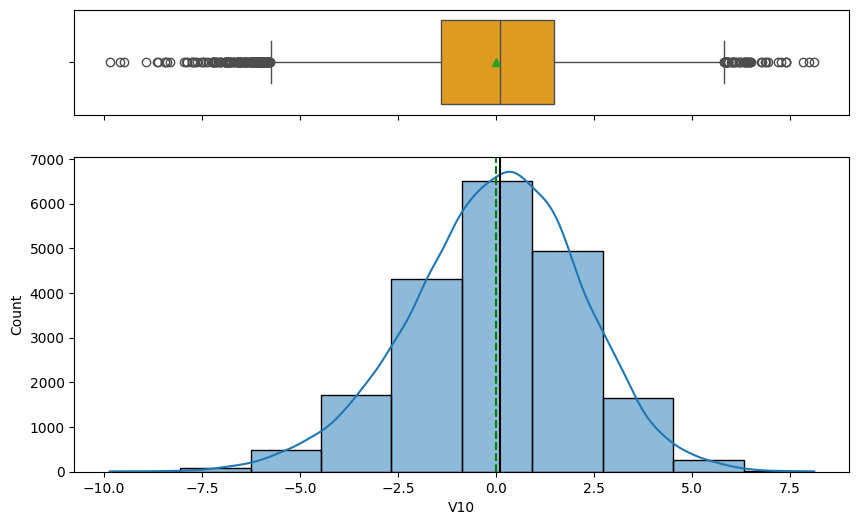

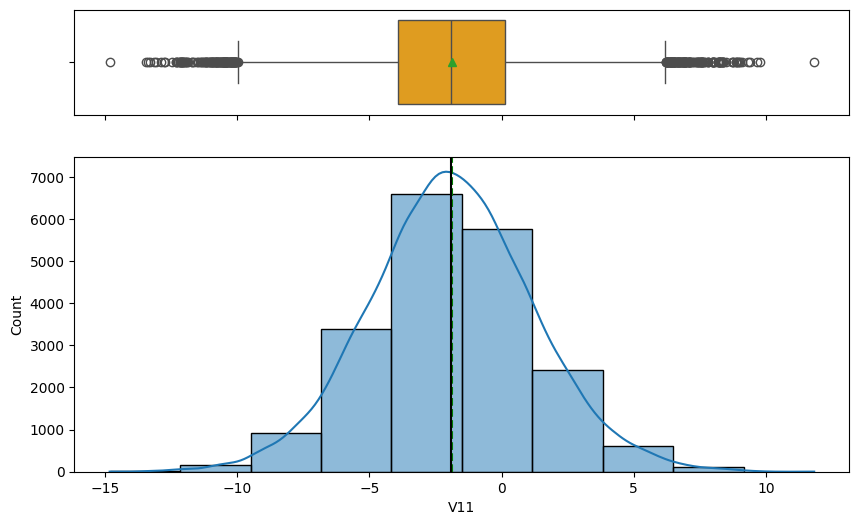

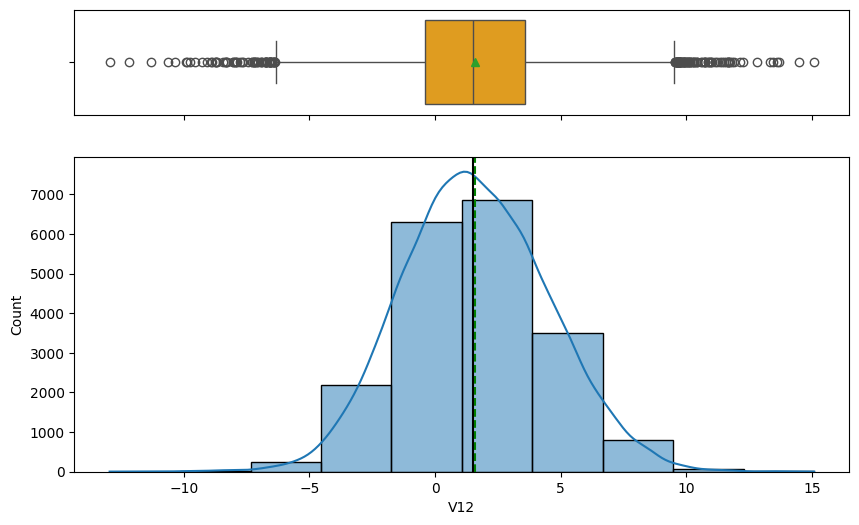

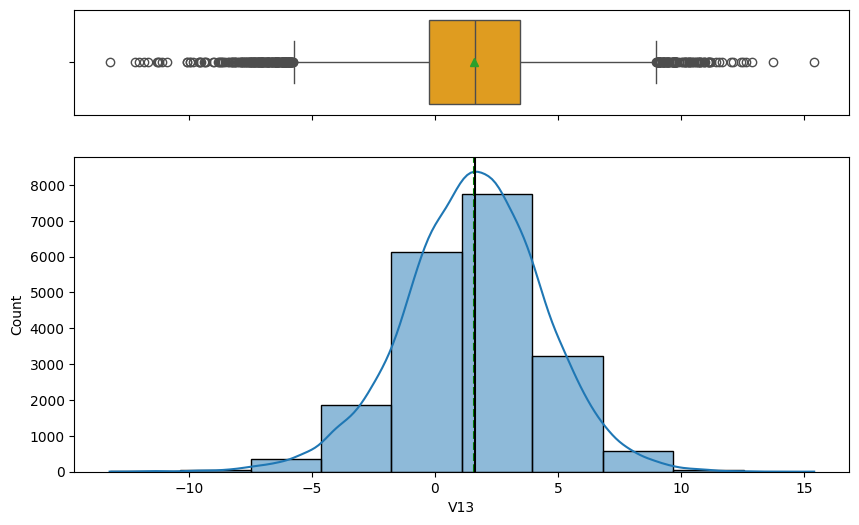

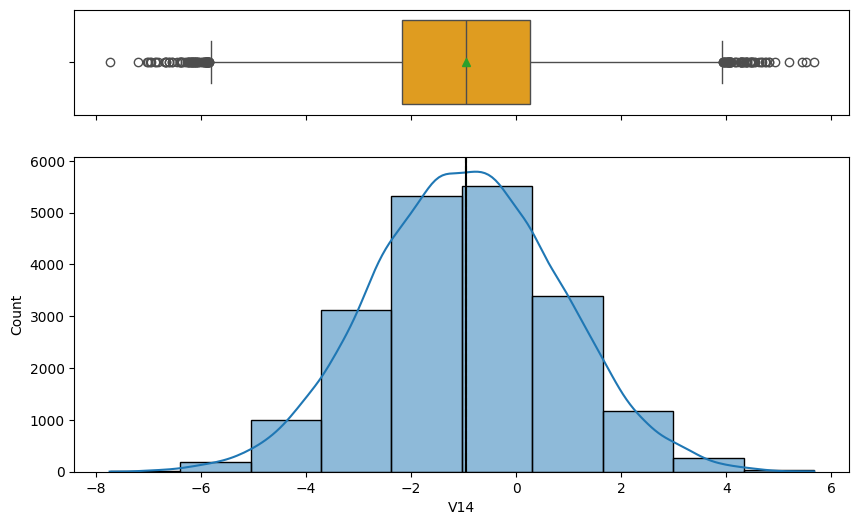

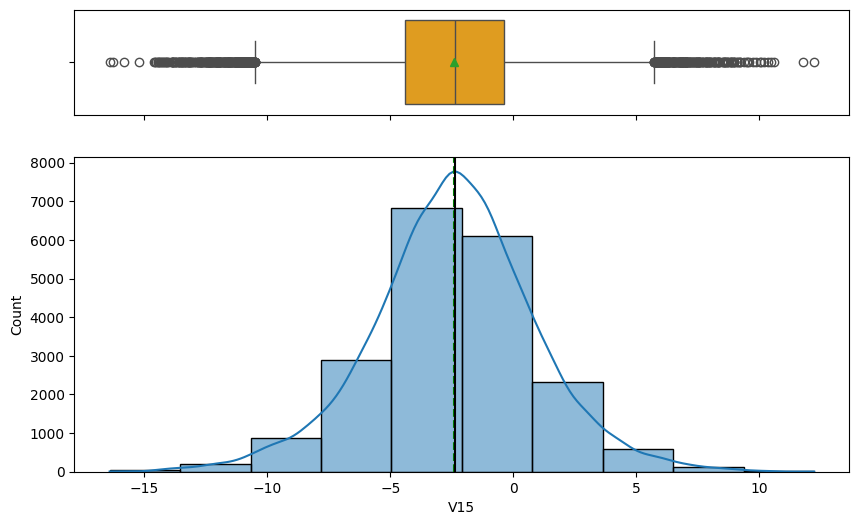

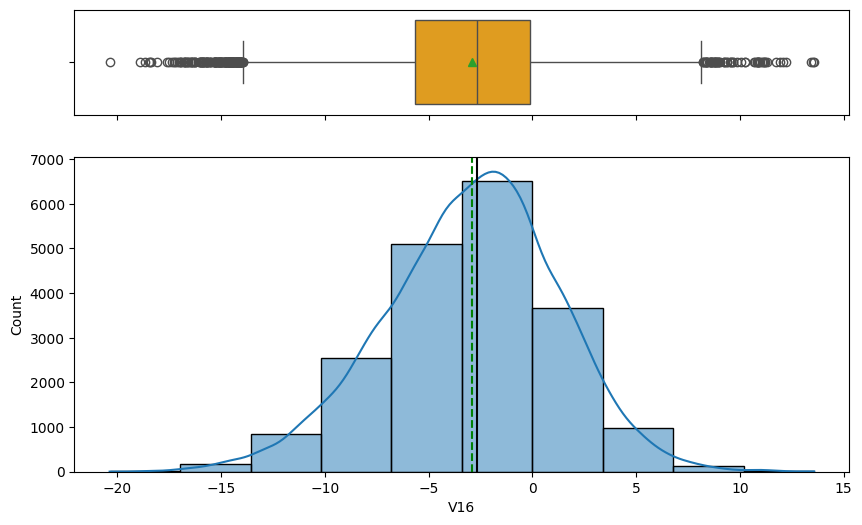

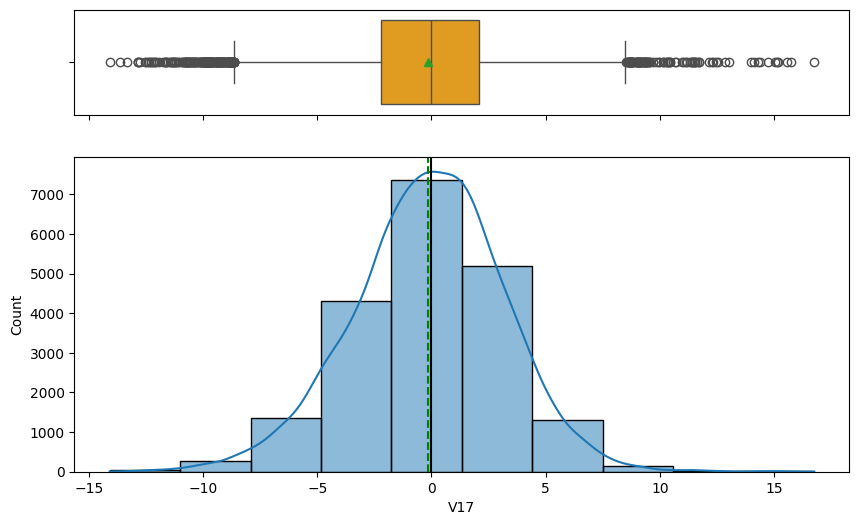

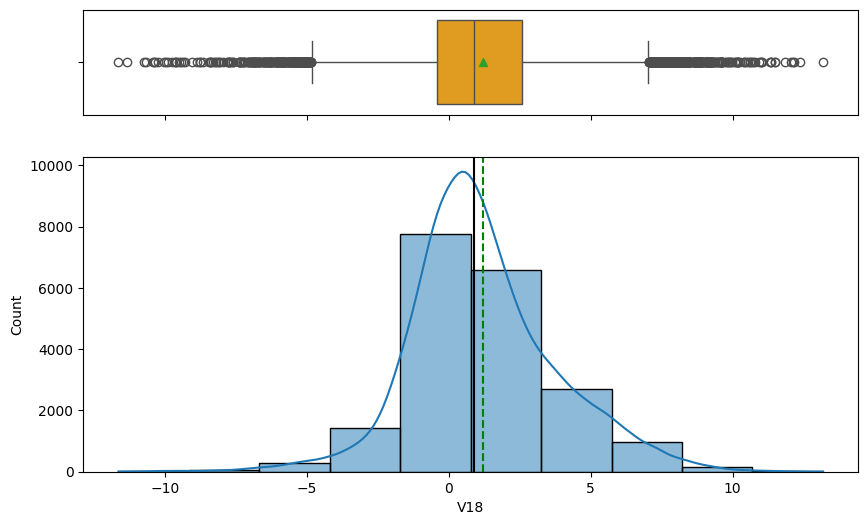

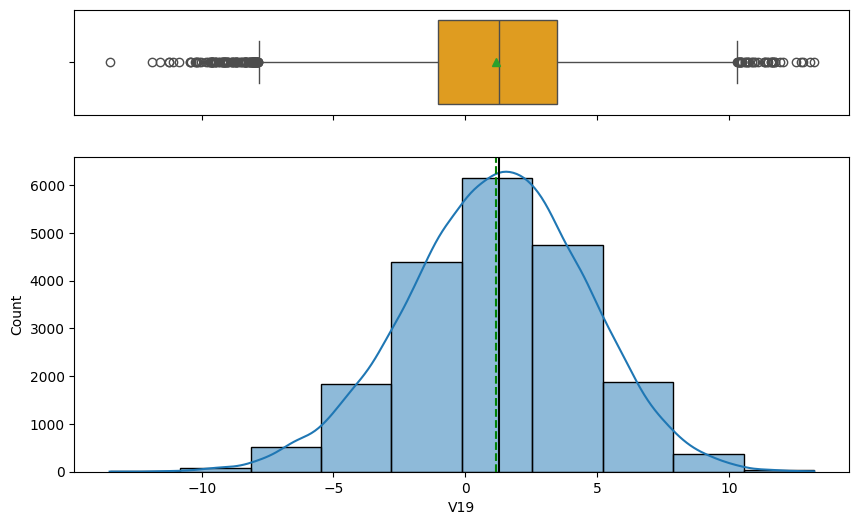

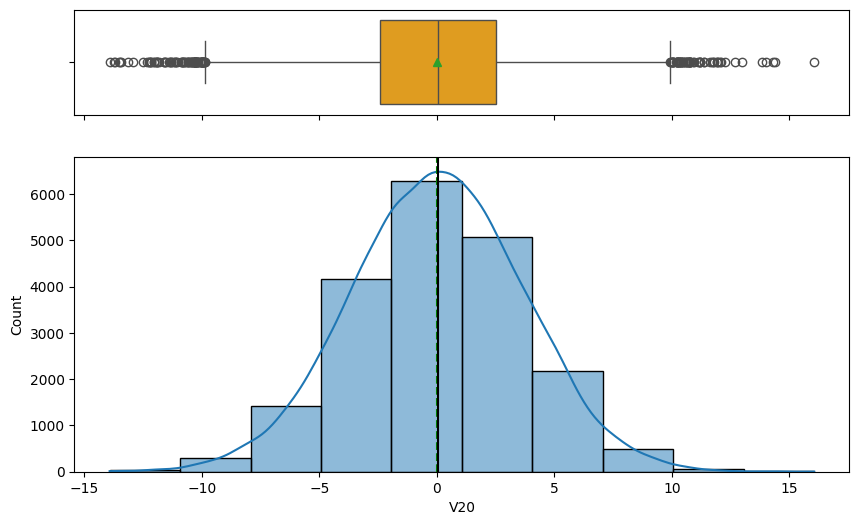

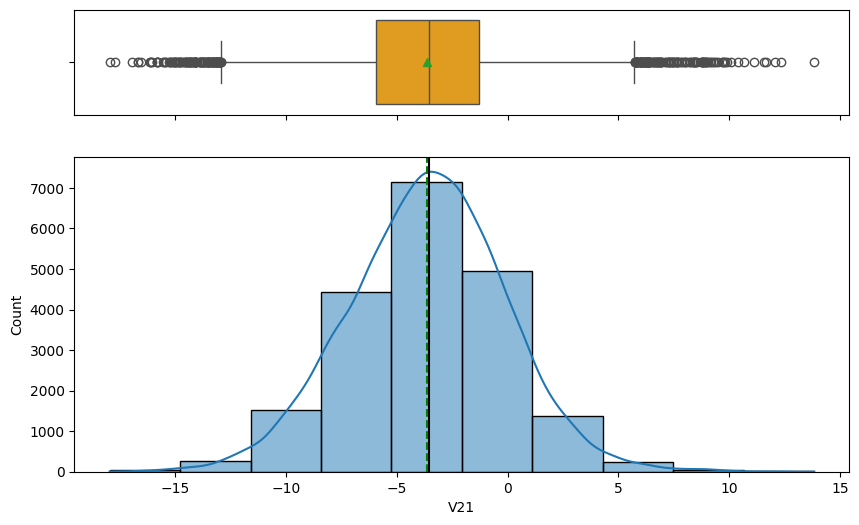

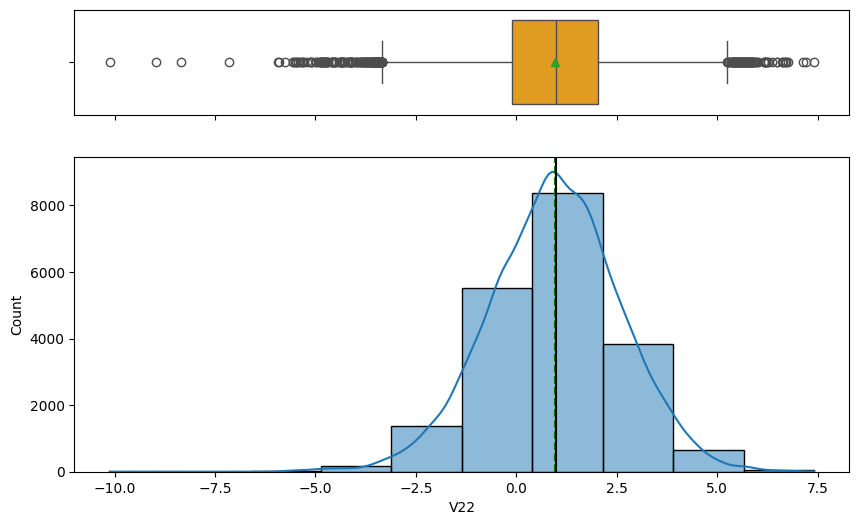

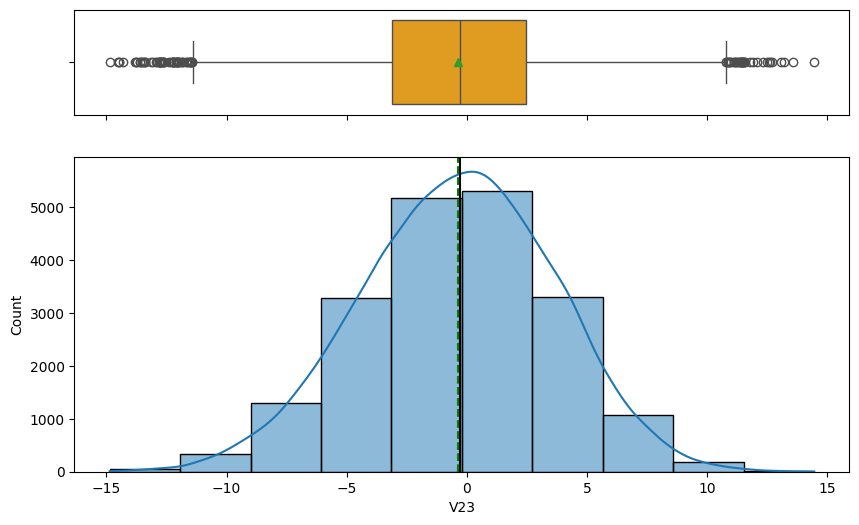

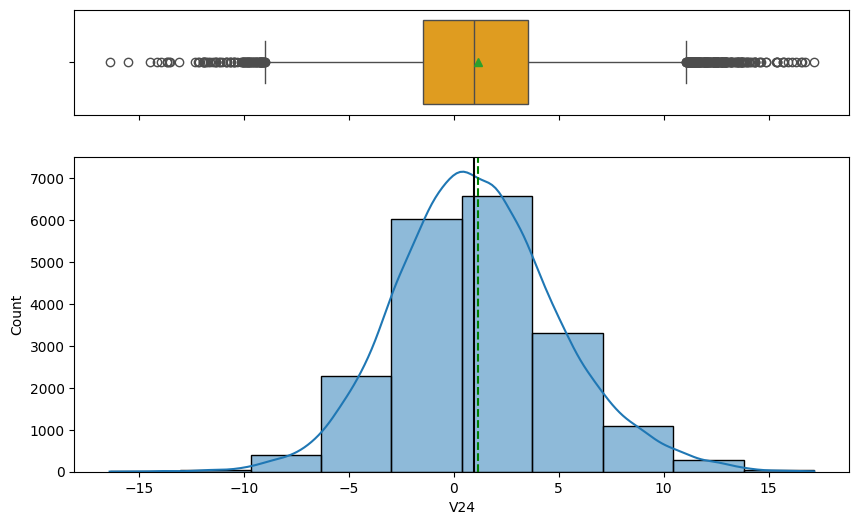

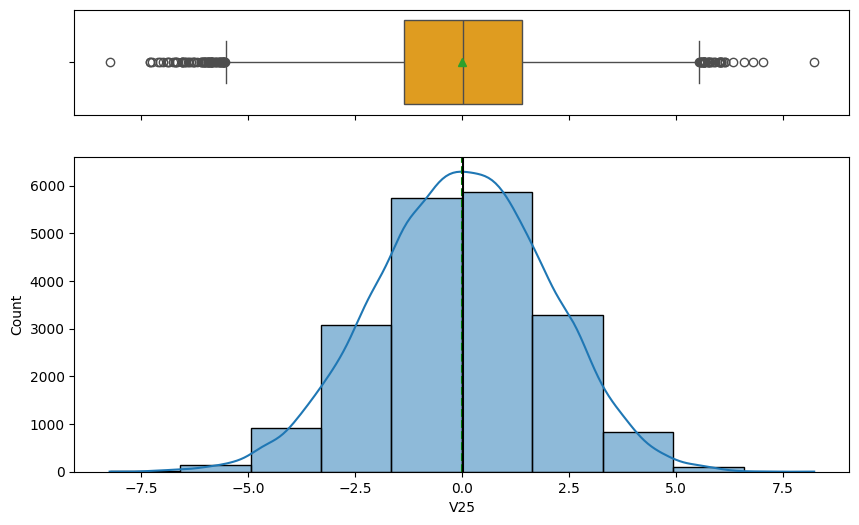

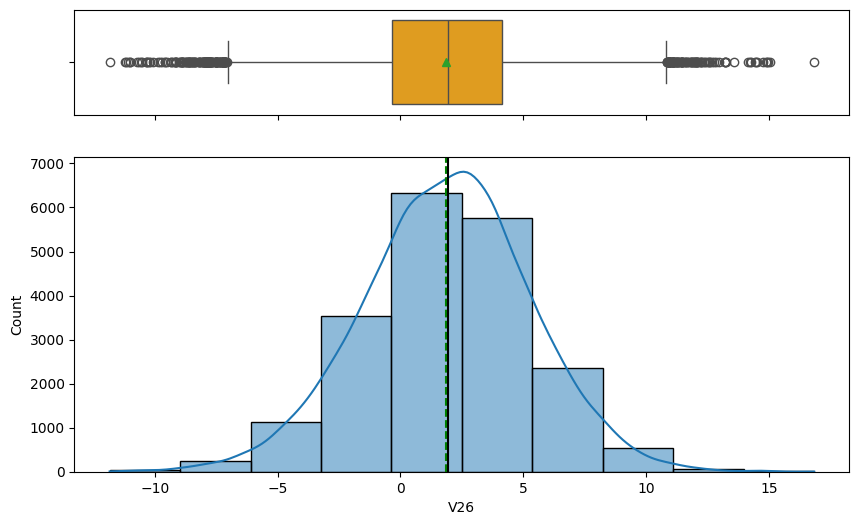

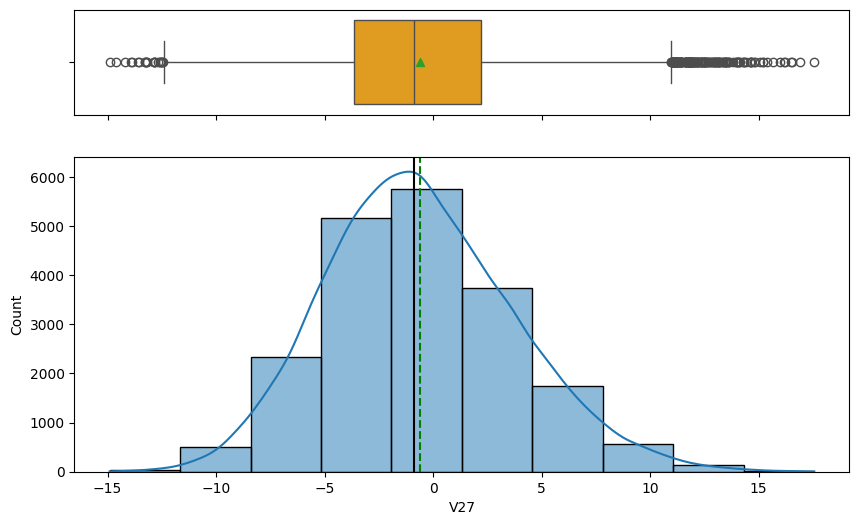

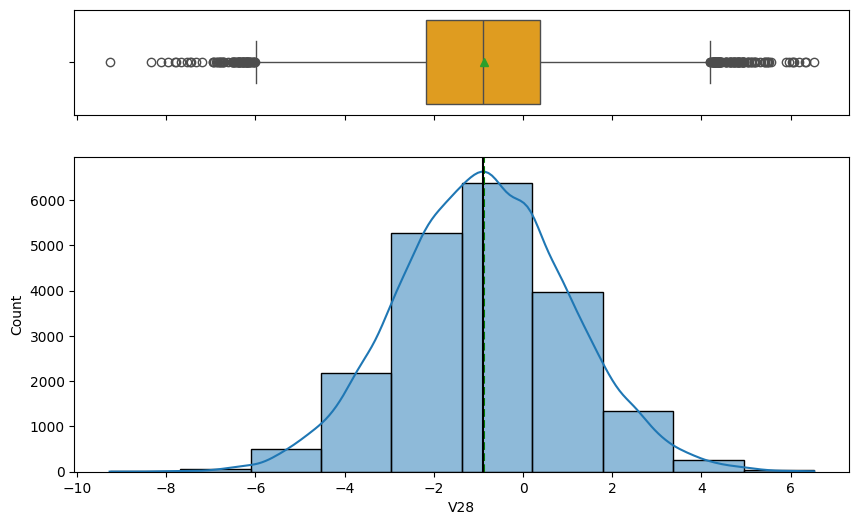

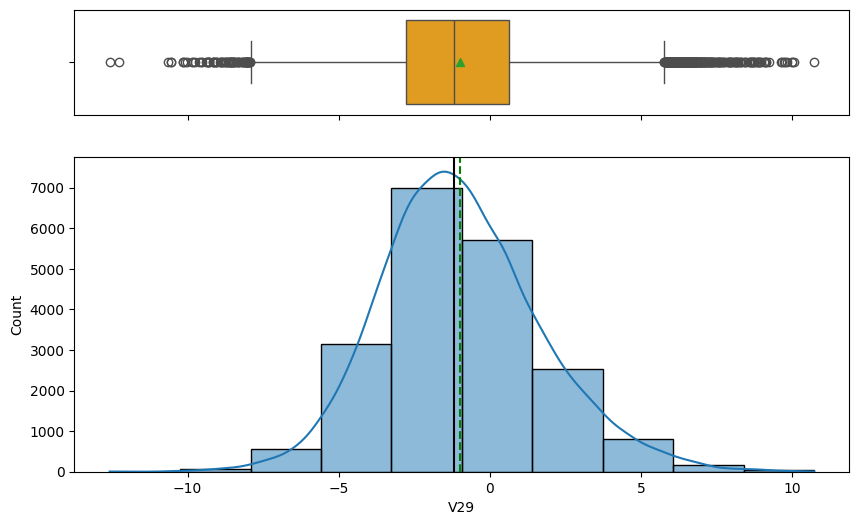

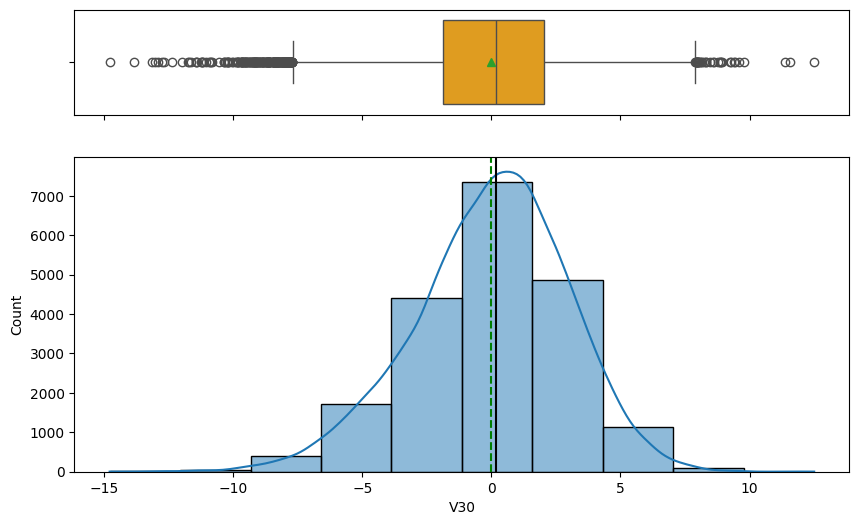

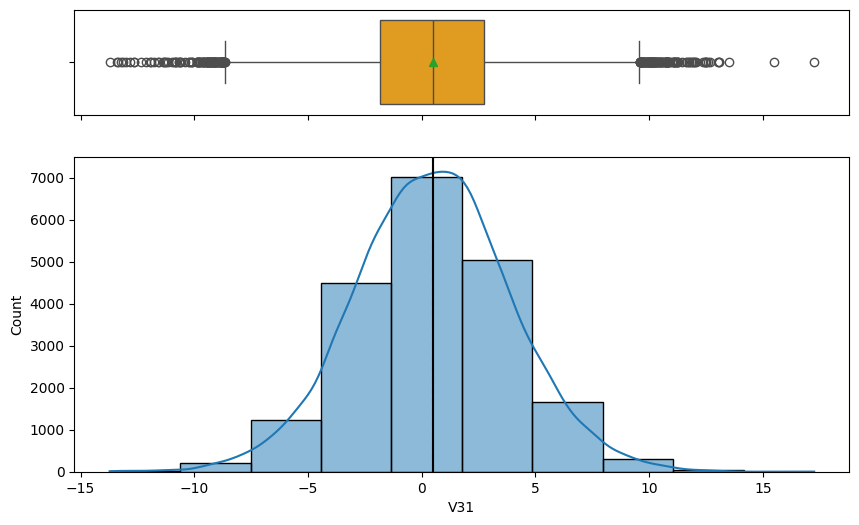

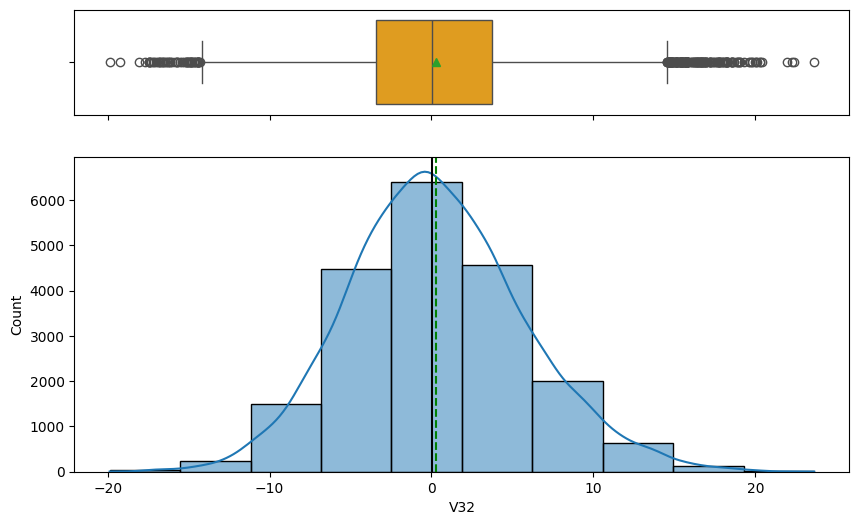

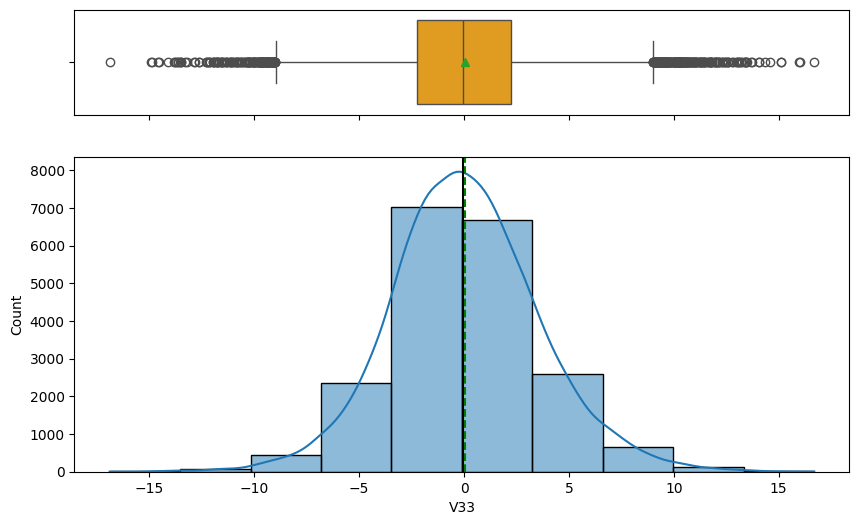

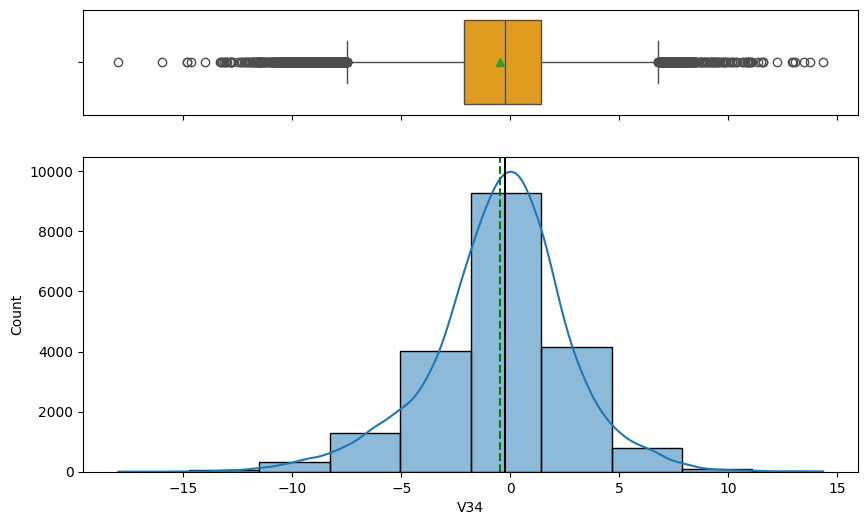

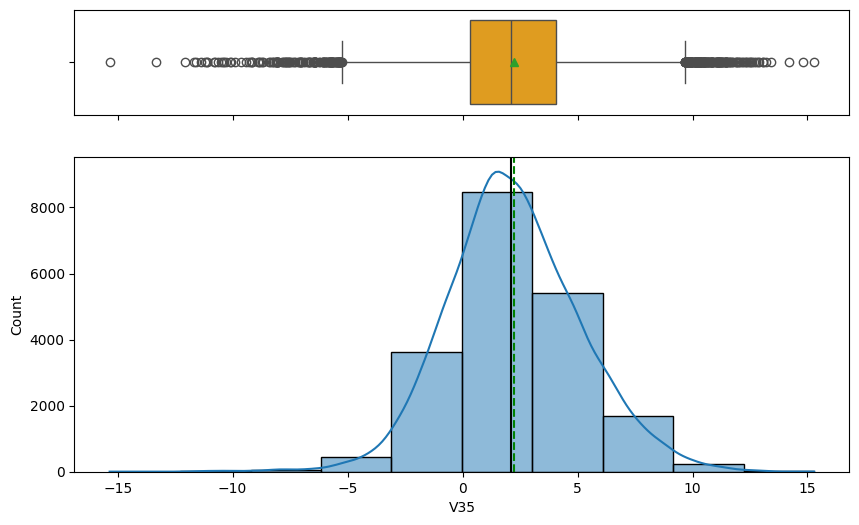

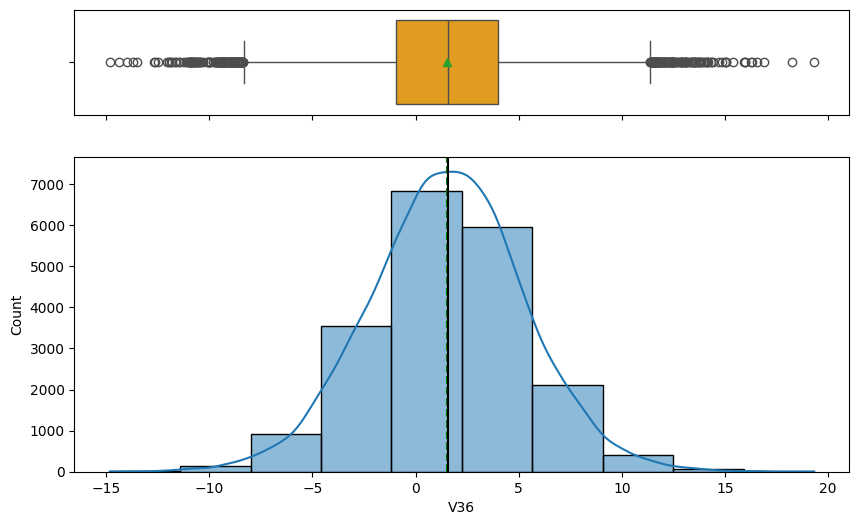

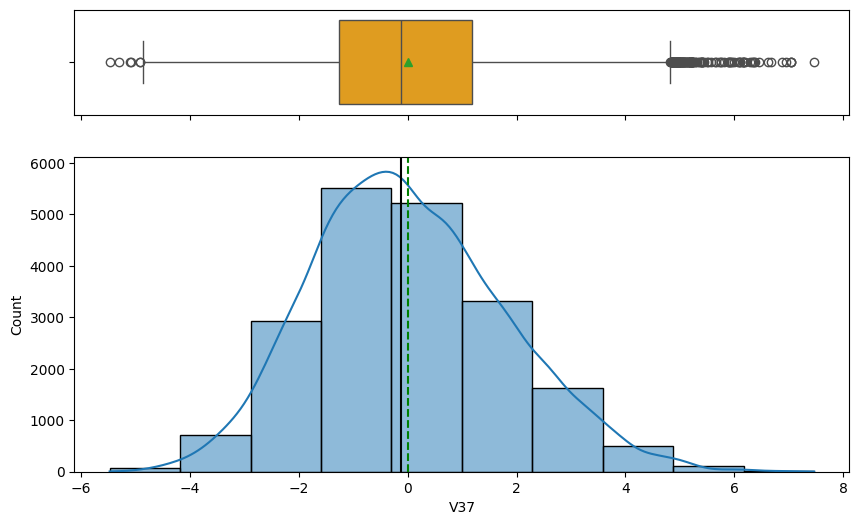

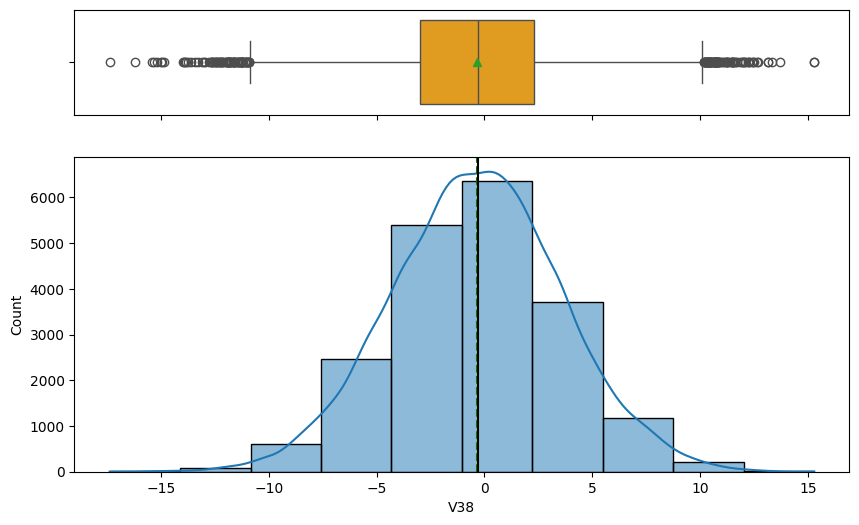

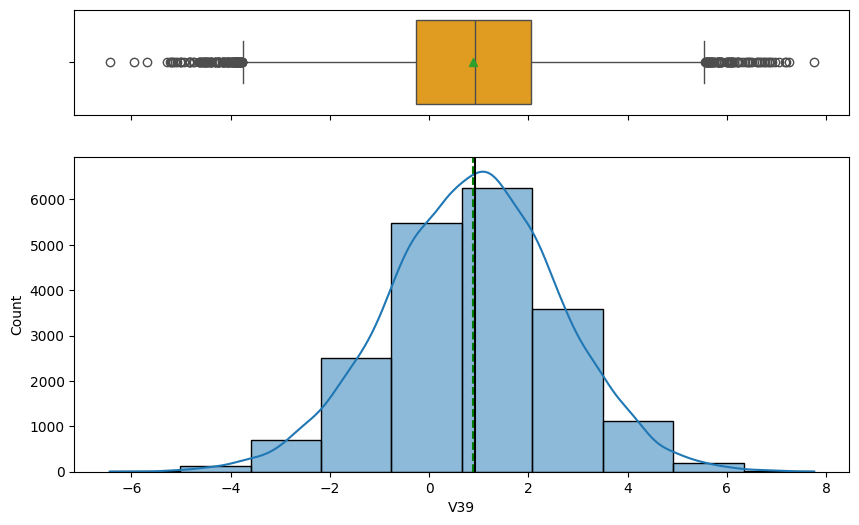

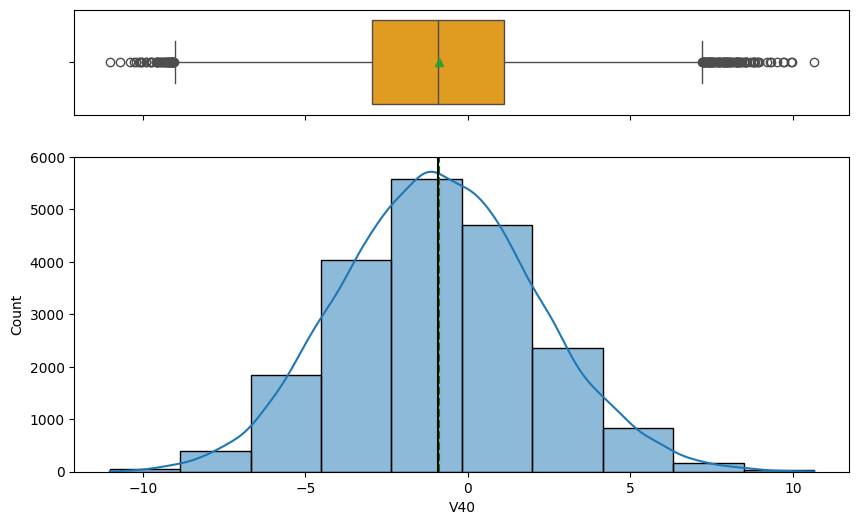

In [ ]:
print("Total columns to plot: {}".format(len(col_list)), end="\n\n")

index = 0
for index, column_name in enumerate(col_list):
    hist_boxplot(main_data, col_list[index]);


##### **Observations:**
* The those plots above show us that most of predictors of wind turbines failure have as a **max value 9** and as a **minimum value -9**, values less than -9 and above of 9, are abnormal.

## Bivariate Analysis

Total columns to plot: 40



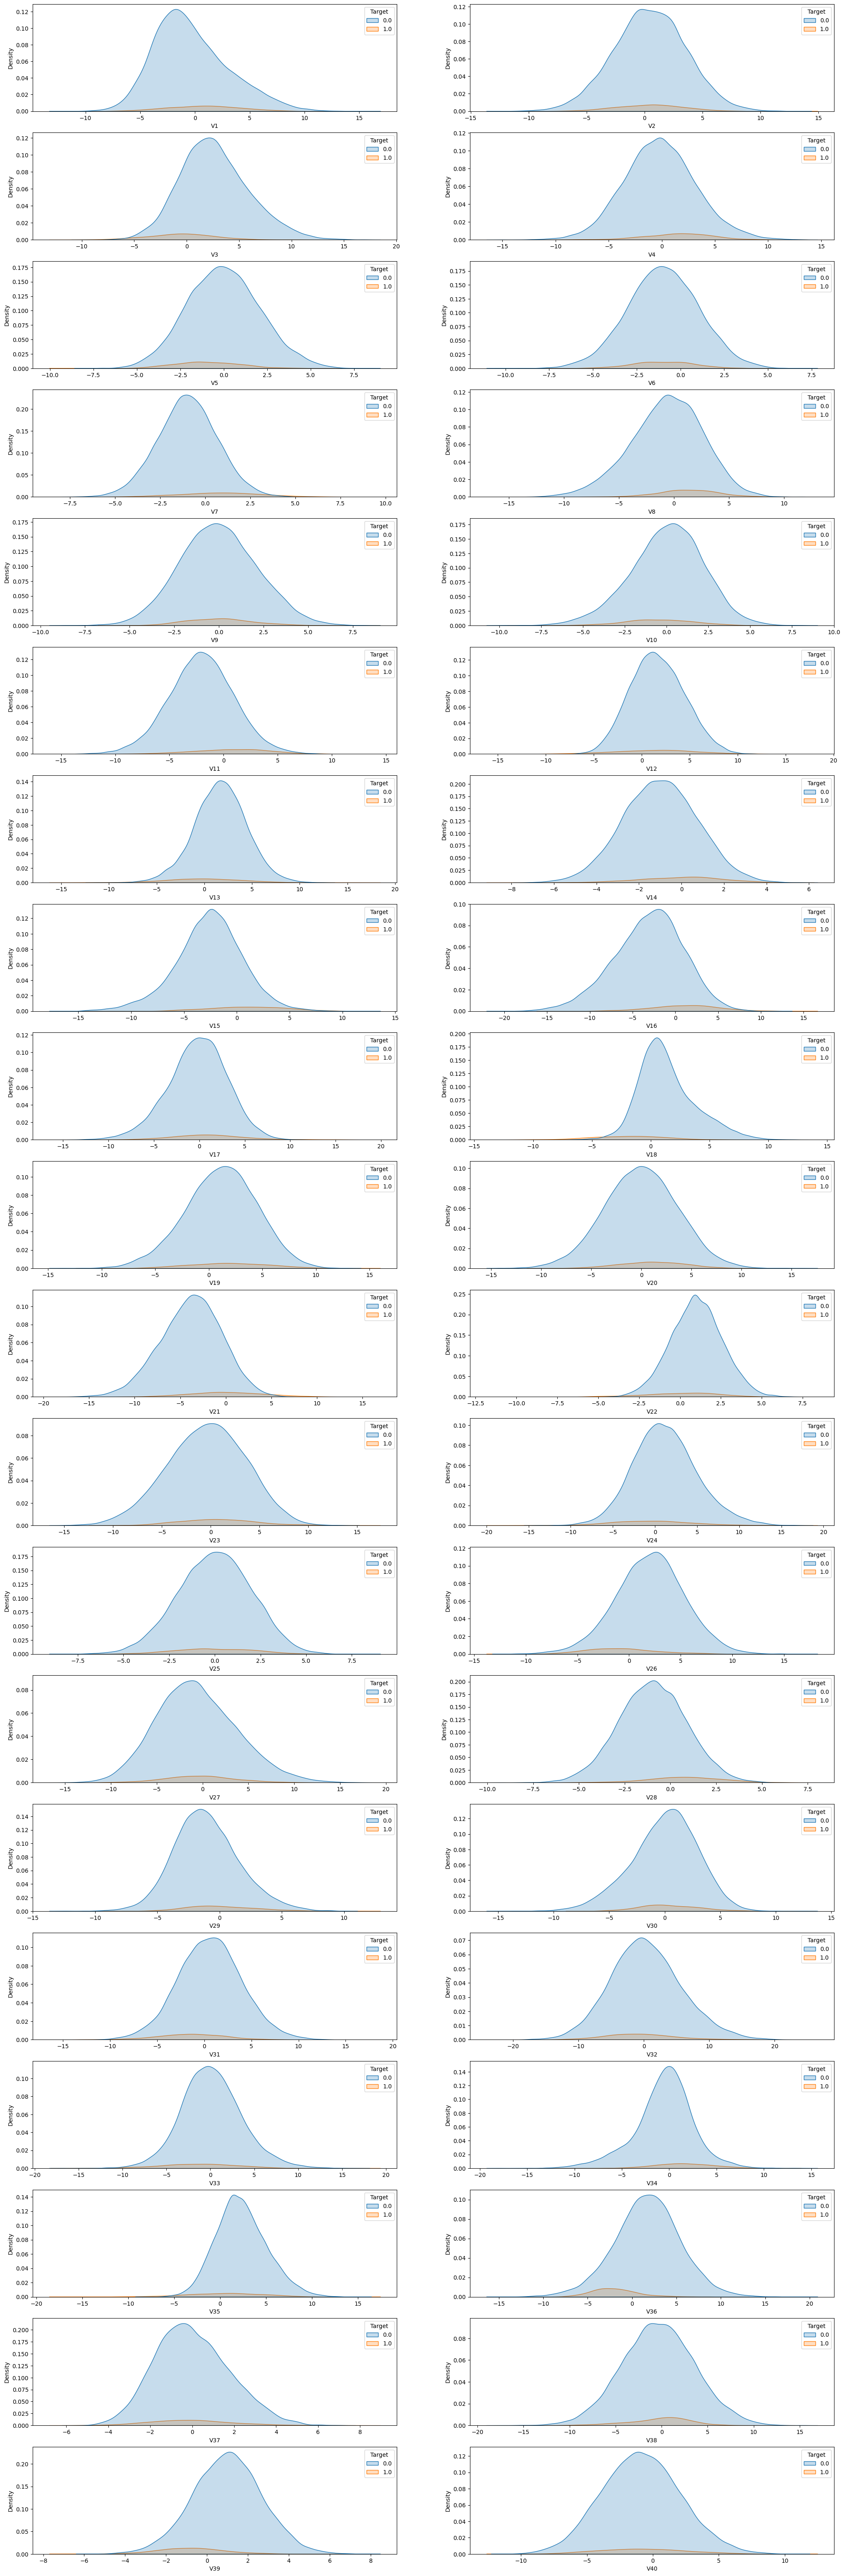

In [ ]:
print("Total columns to plot: {}".format(len(col_list)), end="\n\n")

plt_cols = 2
plt_rows = int(len(col_list) / plt_cols)

plt.figure(figsize=(25, plt_rows * plt_cols * 2))
for index, column_name in enumerate(col_list):
    plt.subplot(plt_rows, plt_cols, index + 1)
    sns.kdeplot(main_data, x=column_name, hue="Target", fill=True);

#### Observations:
Each chart represents the distribution of a continuous variable associated with **1 = No Failure** | **0 = Failure** events  

By observing the density curves, we can identify subtle variations in mean, standard deviation. These statistical differences are valuable for:
- **Understanding sensor behavior** in failure scenarios  

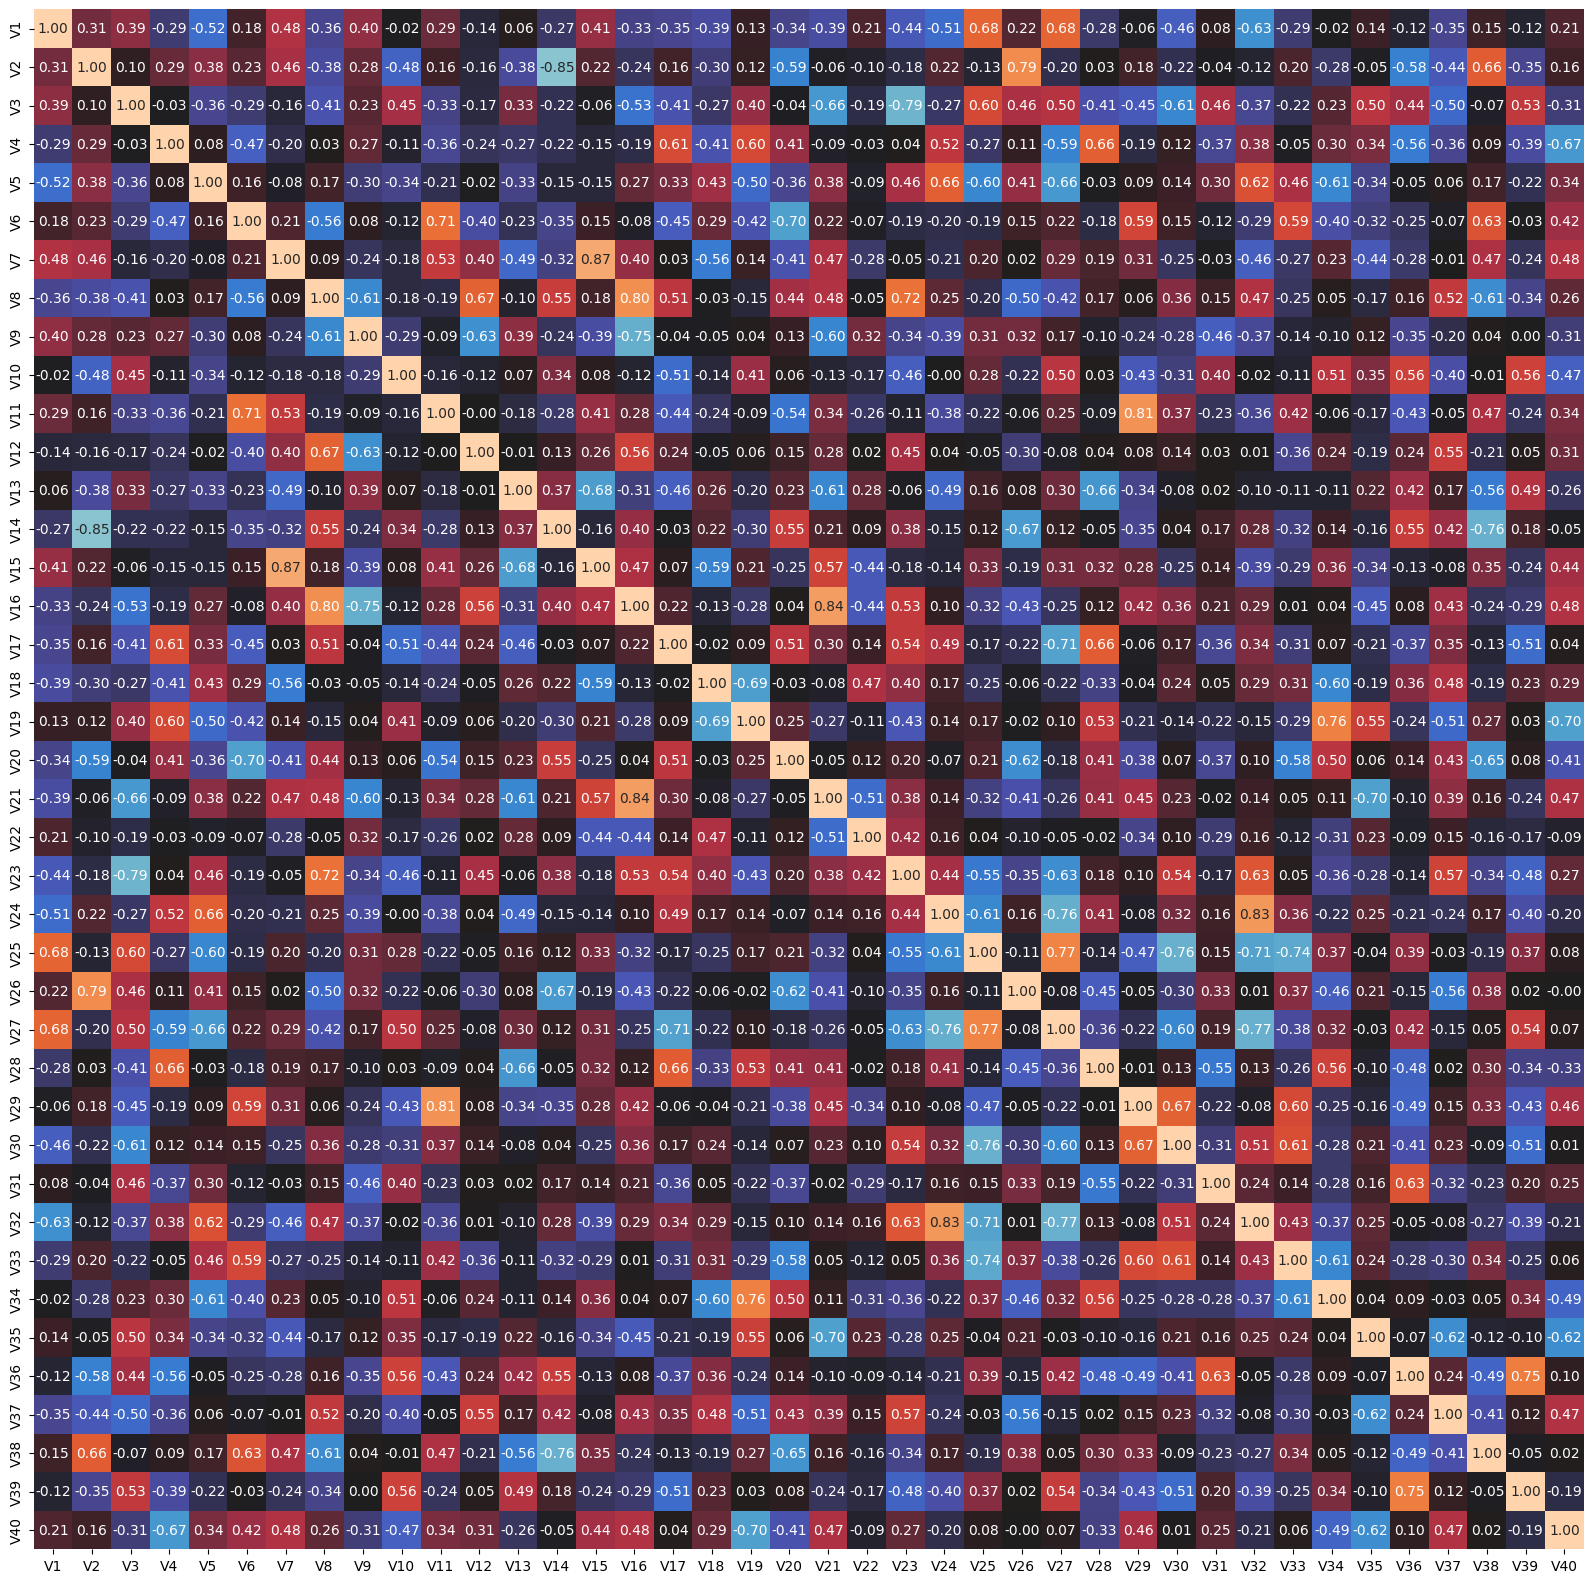

In [ ]:
main_data_corr = main_data[col_list].corr()

plt.figure(figsize=(20,20))
sns.heatmap(main_data_corr, annot=True, cbar=False, fmt=".2f", center=0);

# **Data Preprocessing**

In [ ]:
df = main_data.copy()
df_test = test_data.copy()

#### **Missing Values Treatment - Based on V1 and V2 Columns**

In [ ]:
# Validating the values to impute
df["V1"].fillna(df["V1"].mean(), inplace=True)
df["V2"].fillna(df["V2"].mean(), inplace=True)

In [ ]:
print("Checking missing values in V1 column: {}".format(df["V1"].isna().sum()))
print("Checking missing values in V2 column: {}".format(df["V2"].isna().sum()))

Checking missing values in V1 column: 0
Checking missing values in V2 column: 0


#### **Outliers detection**

In [ ]:
# Calculate IQR (Inter Quartile)
Q1 = df[col_list].quantile(.25)
Q3 = df[col_list].quantile(.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR

# Checking the percentage of Outliers into the columns
((df[col_list] < lower_whisker) | (df[col_list] > upper_whisker)).sum() / df.shape[0] * 100

V1     1.070
V2     0.915
V3     1.375
V4     1.140
V5     0.565
V6     0.775
V7     1.455
V8     0.955
V9     0.740
V10    1.070
V11    1.290
V12    0.740
V13    1.515
V14    0.640
V15    2.565
V16    1.150
V17    1.480
V18    3.655
V19    0.745
V20    0.765
V21    1.245
V22    1.225
V23    0.470
V24    1.535
V25    0.570
V26    1.210
V27    0.890
V28    0.905
V29    1.680
V30    1.230
V31    1.145
V32    1.160
V33    1.915
V34    4.015
V35    1.575
V36    1.305
V37    0.700
V38    0.825
V39    0.975
V40    0.685
dtype: float64

These are the columns with 'Outliers' before the treatment


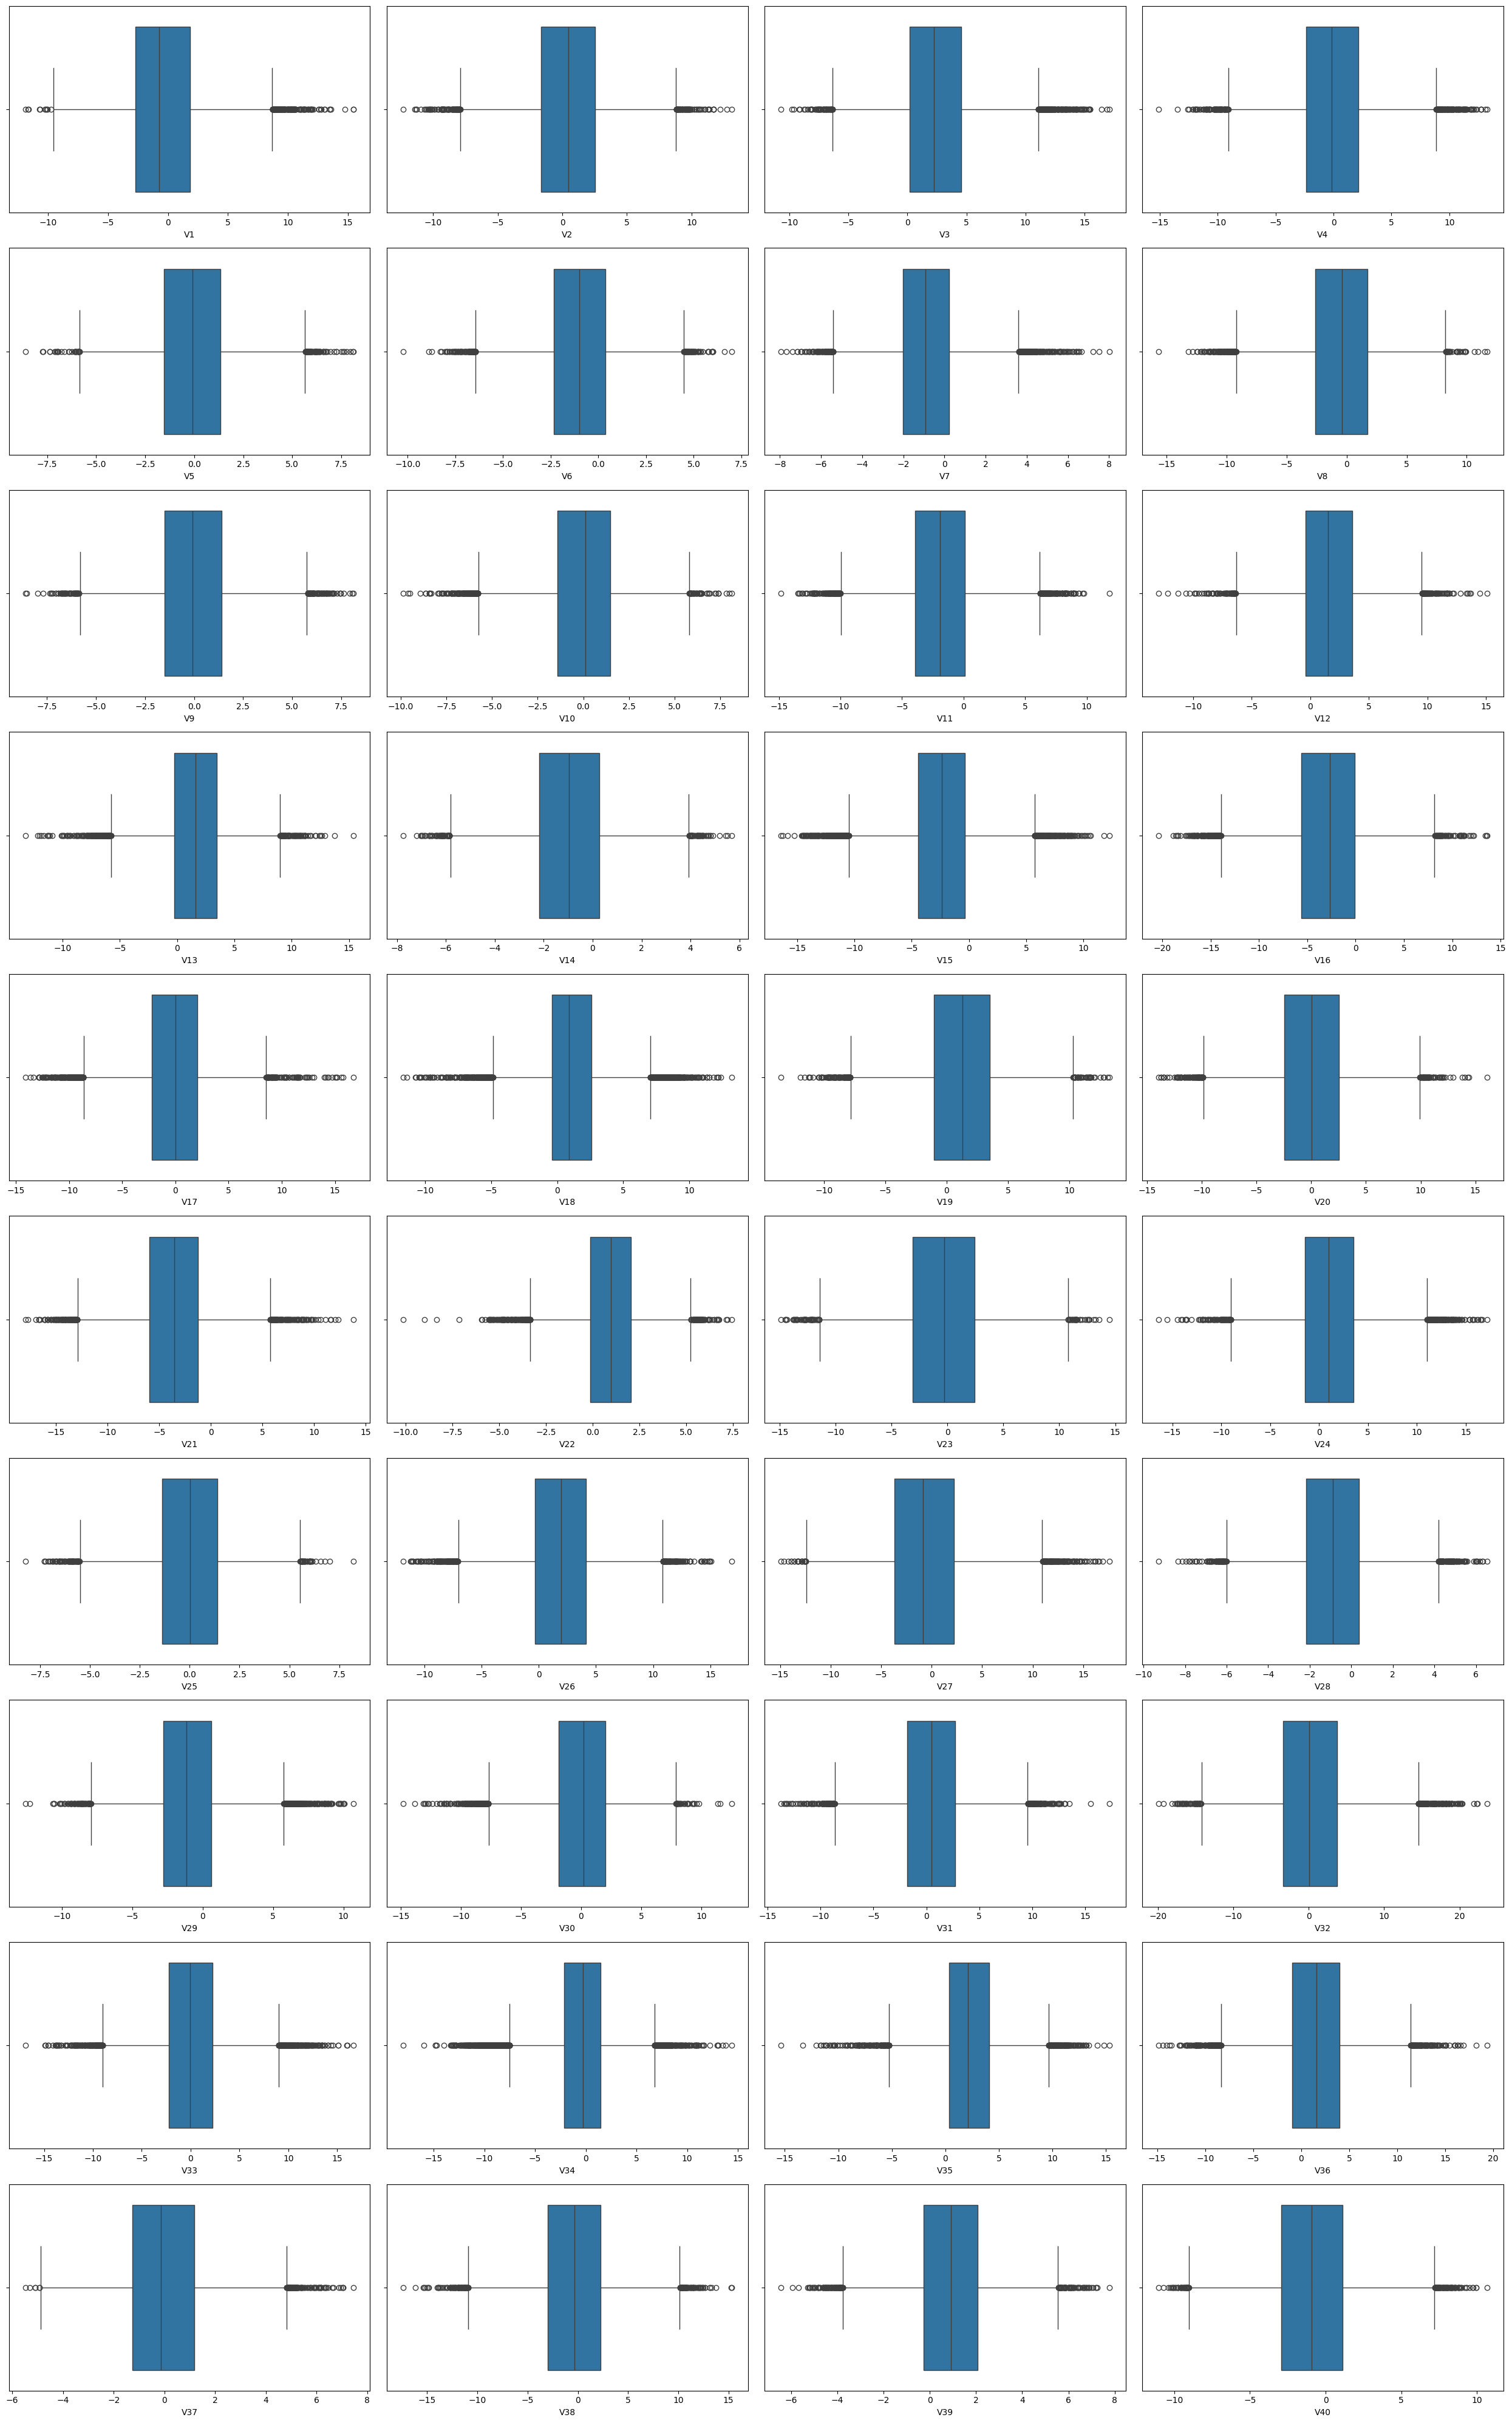

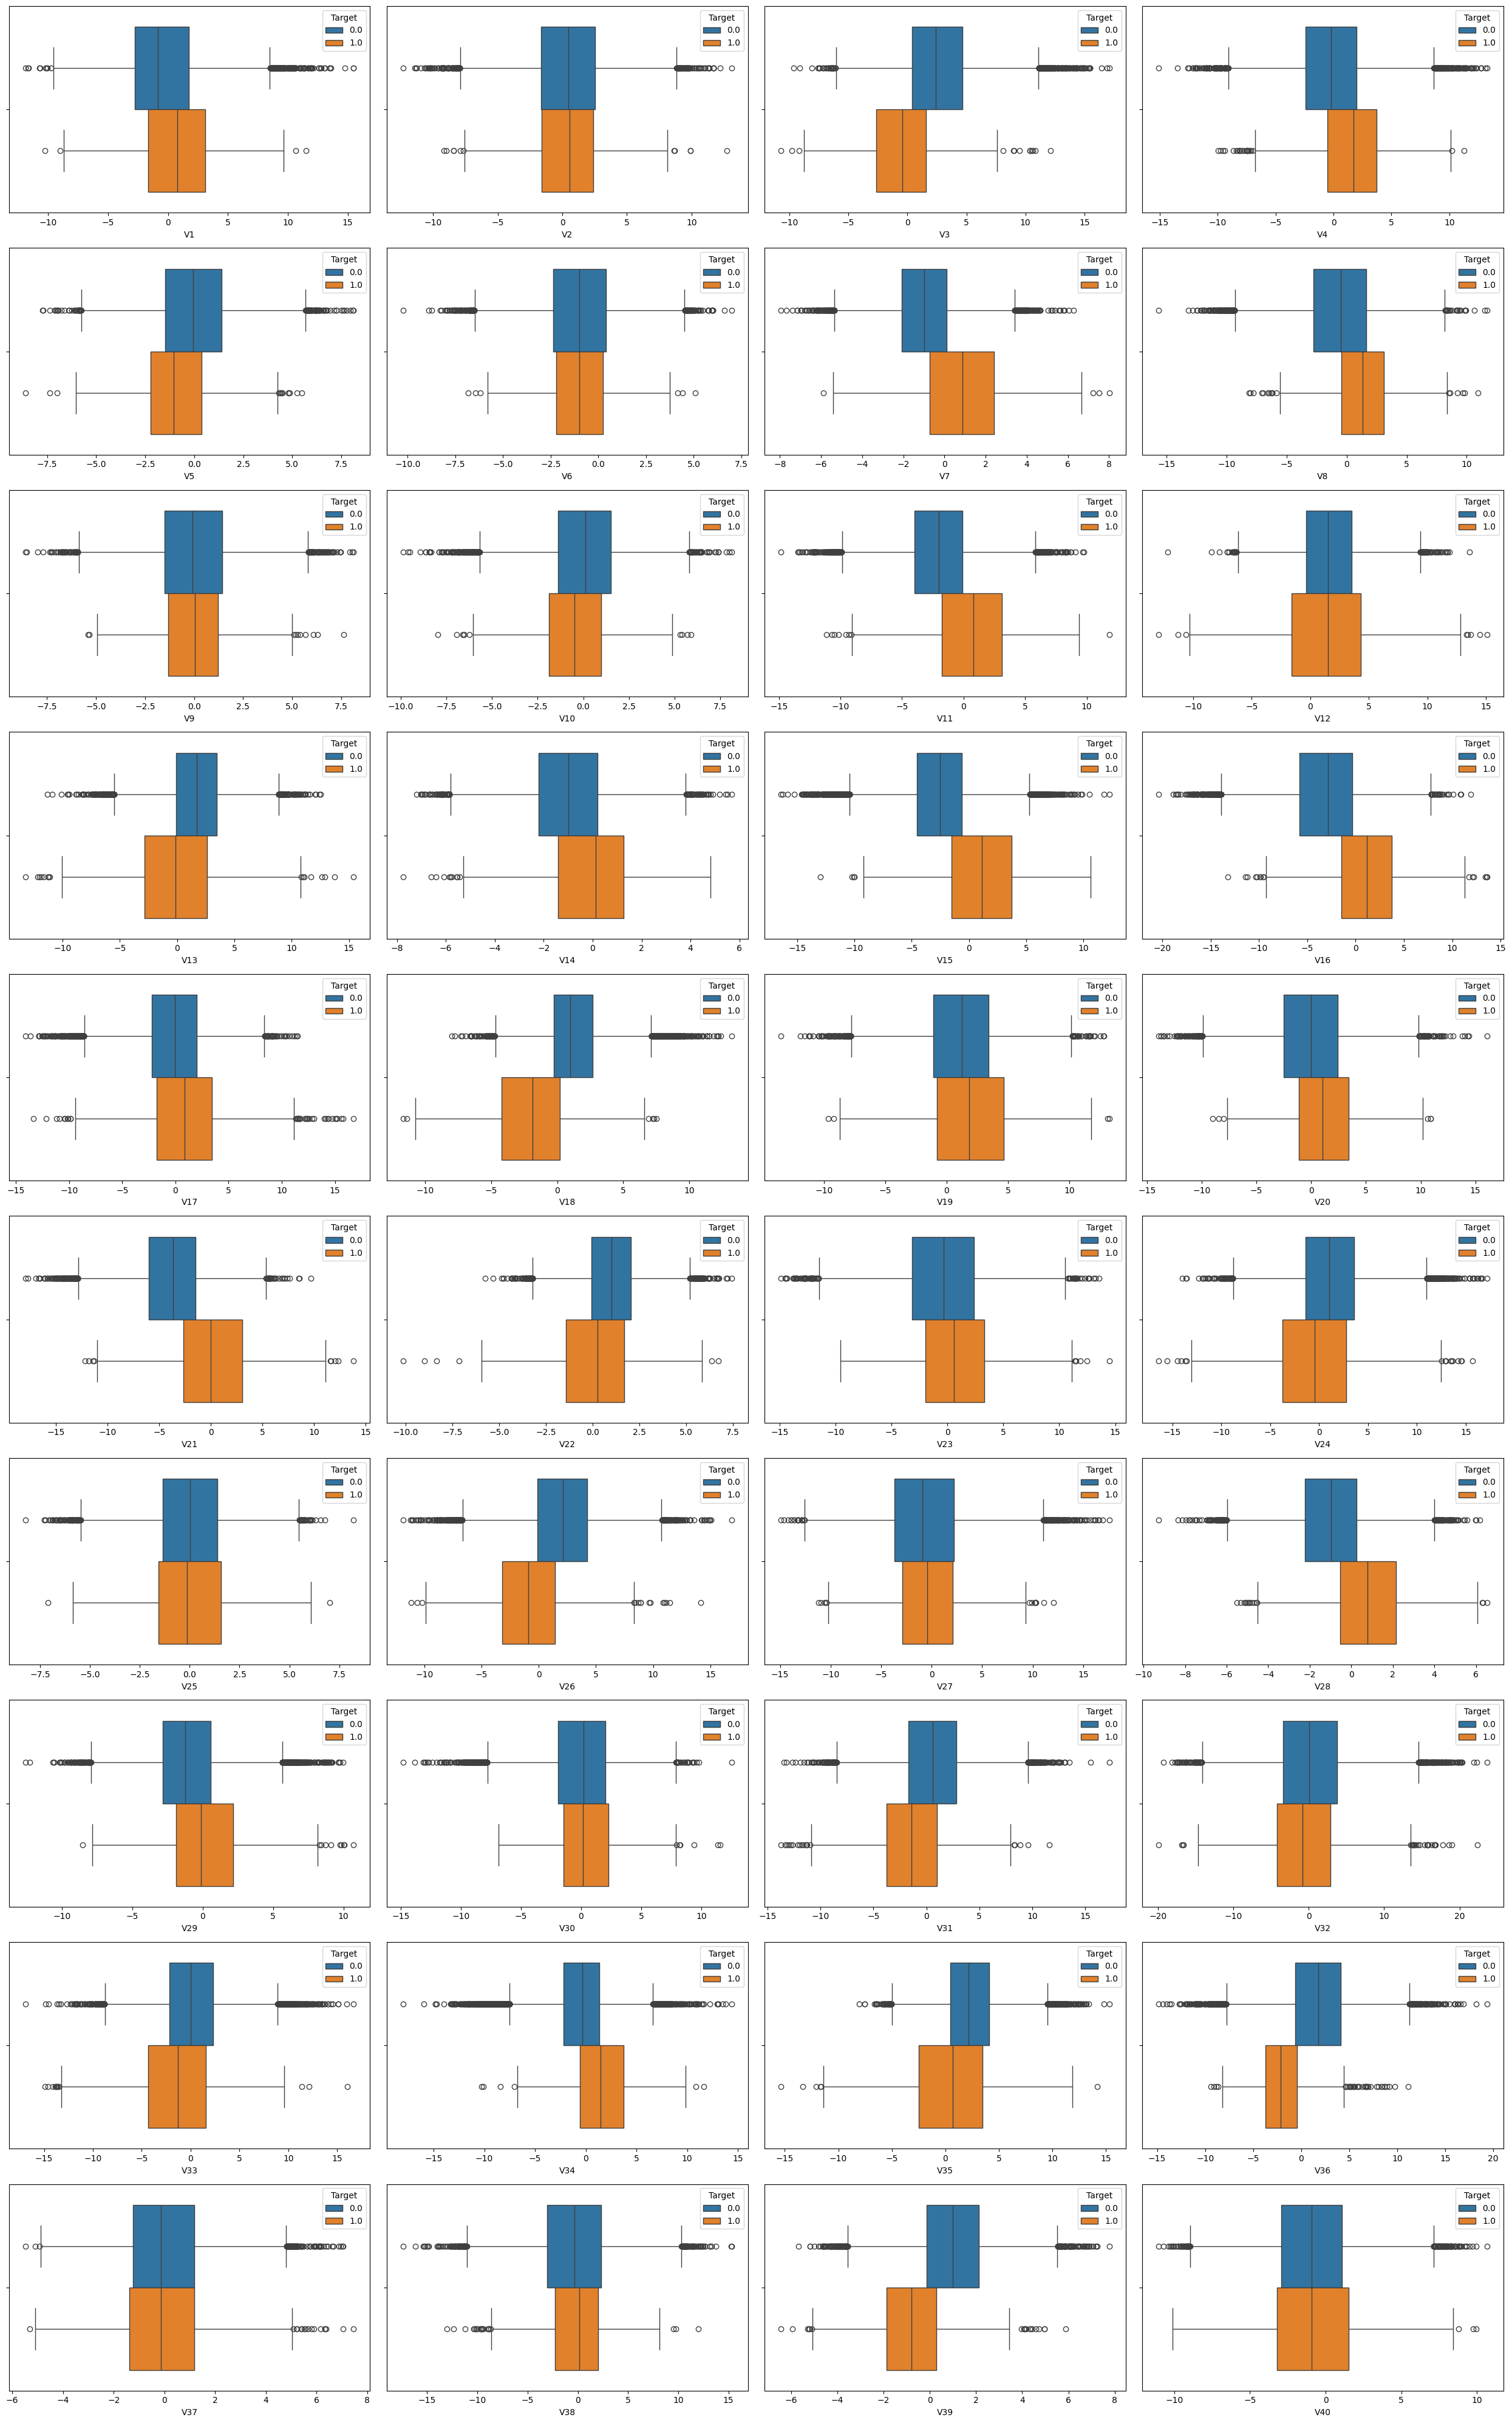

In [ ]:
print("These are the columns with 'Outliers' before the treatment")

plt_cols = 4
plt_rows = int(len(col_list) / plt_cols)

plt.figure(figsize=(25, plt_rows * plt_cols))
for index, column_name in enumerate(col_list):
    plt.subplot(plt_rows, plt_cols, index+1)
    sns.boxplot(df, x=column_name)
    plt.tight_layout();

plt.figure(figsize=(25, plt_rows * plt_cols))
for index, column_name in enumerate(col_list):
    plt.subplot(plt_rows, plt_cols, index+1)
    sns.boxplot(df, x=column_name, hue="Target")
    plt.tight_layout();

#### Observations:
Here we are checking the the **Outliers** inside the Predictors, to conclude if we going to to treat them or not.
We note that we have **Outliers** in all Predictors, so in the next step we going to solve it.

#### **Outliers treatment**

In [ ]:
# Here we going to treat the Outliers based on the limits of lower_whisker and upper_whisker
for col in col_list:
    df[col] = np.clip(df[col], lower_whisker[col], upper_whisker[col])


These are the columns with 'Outliers' after the treatment


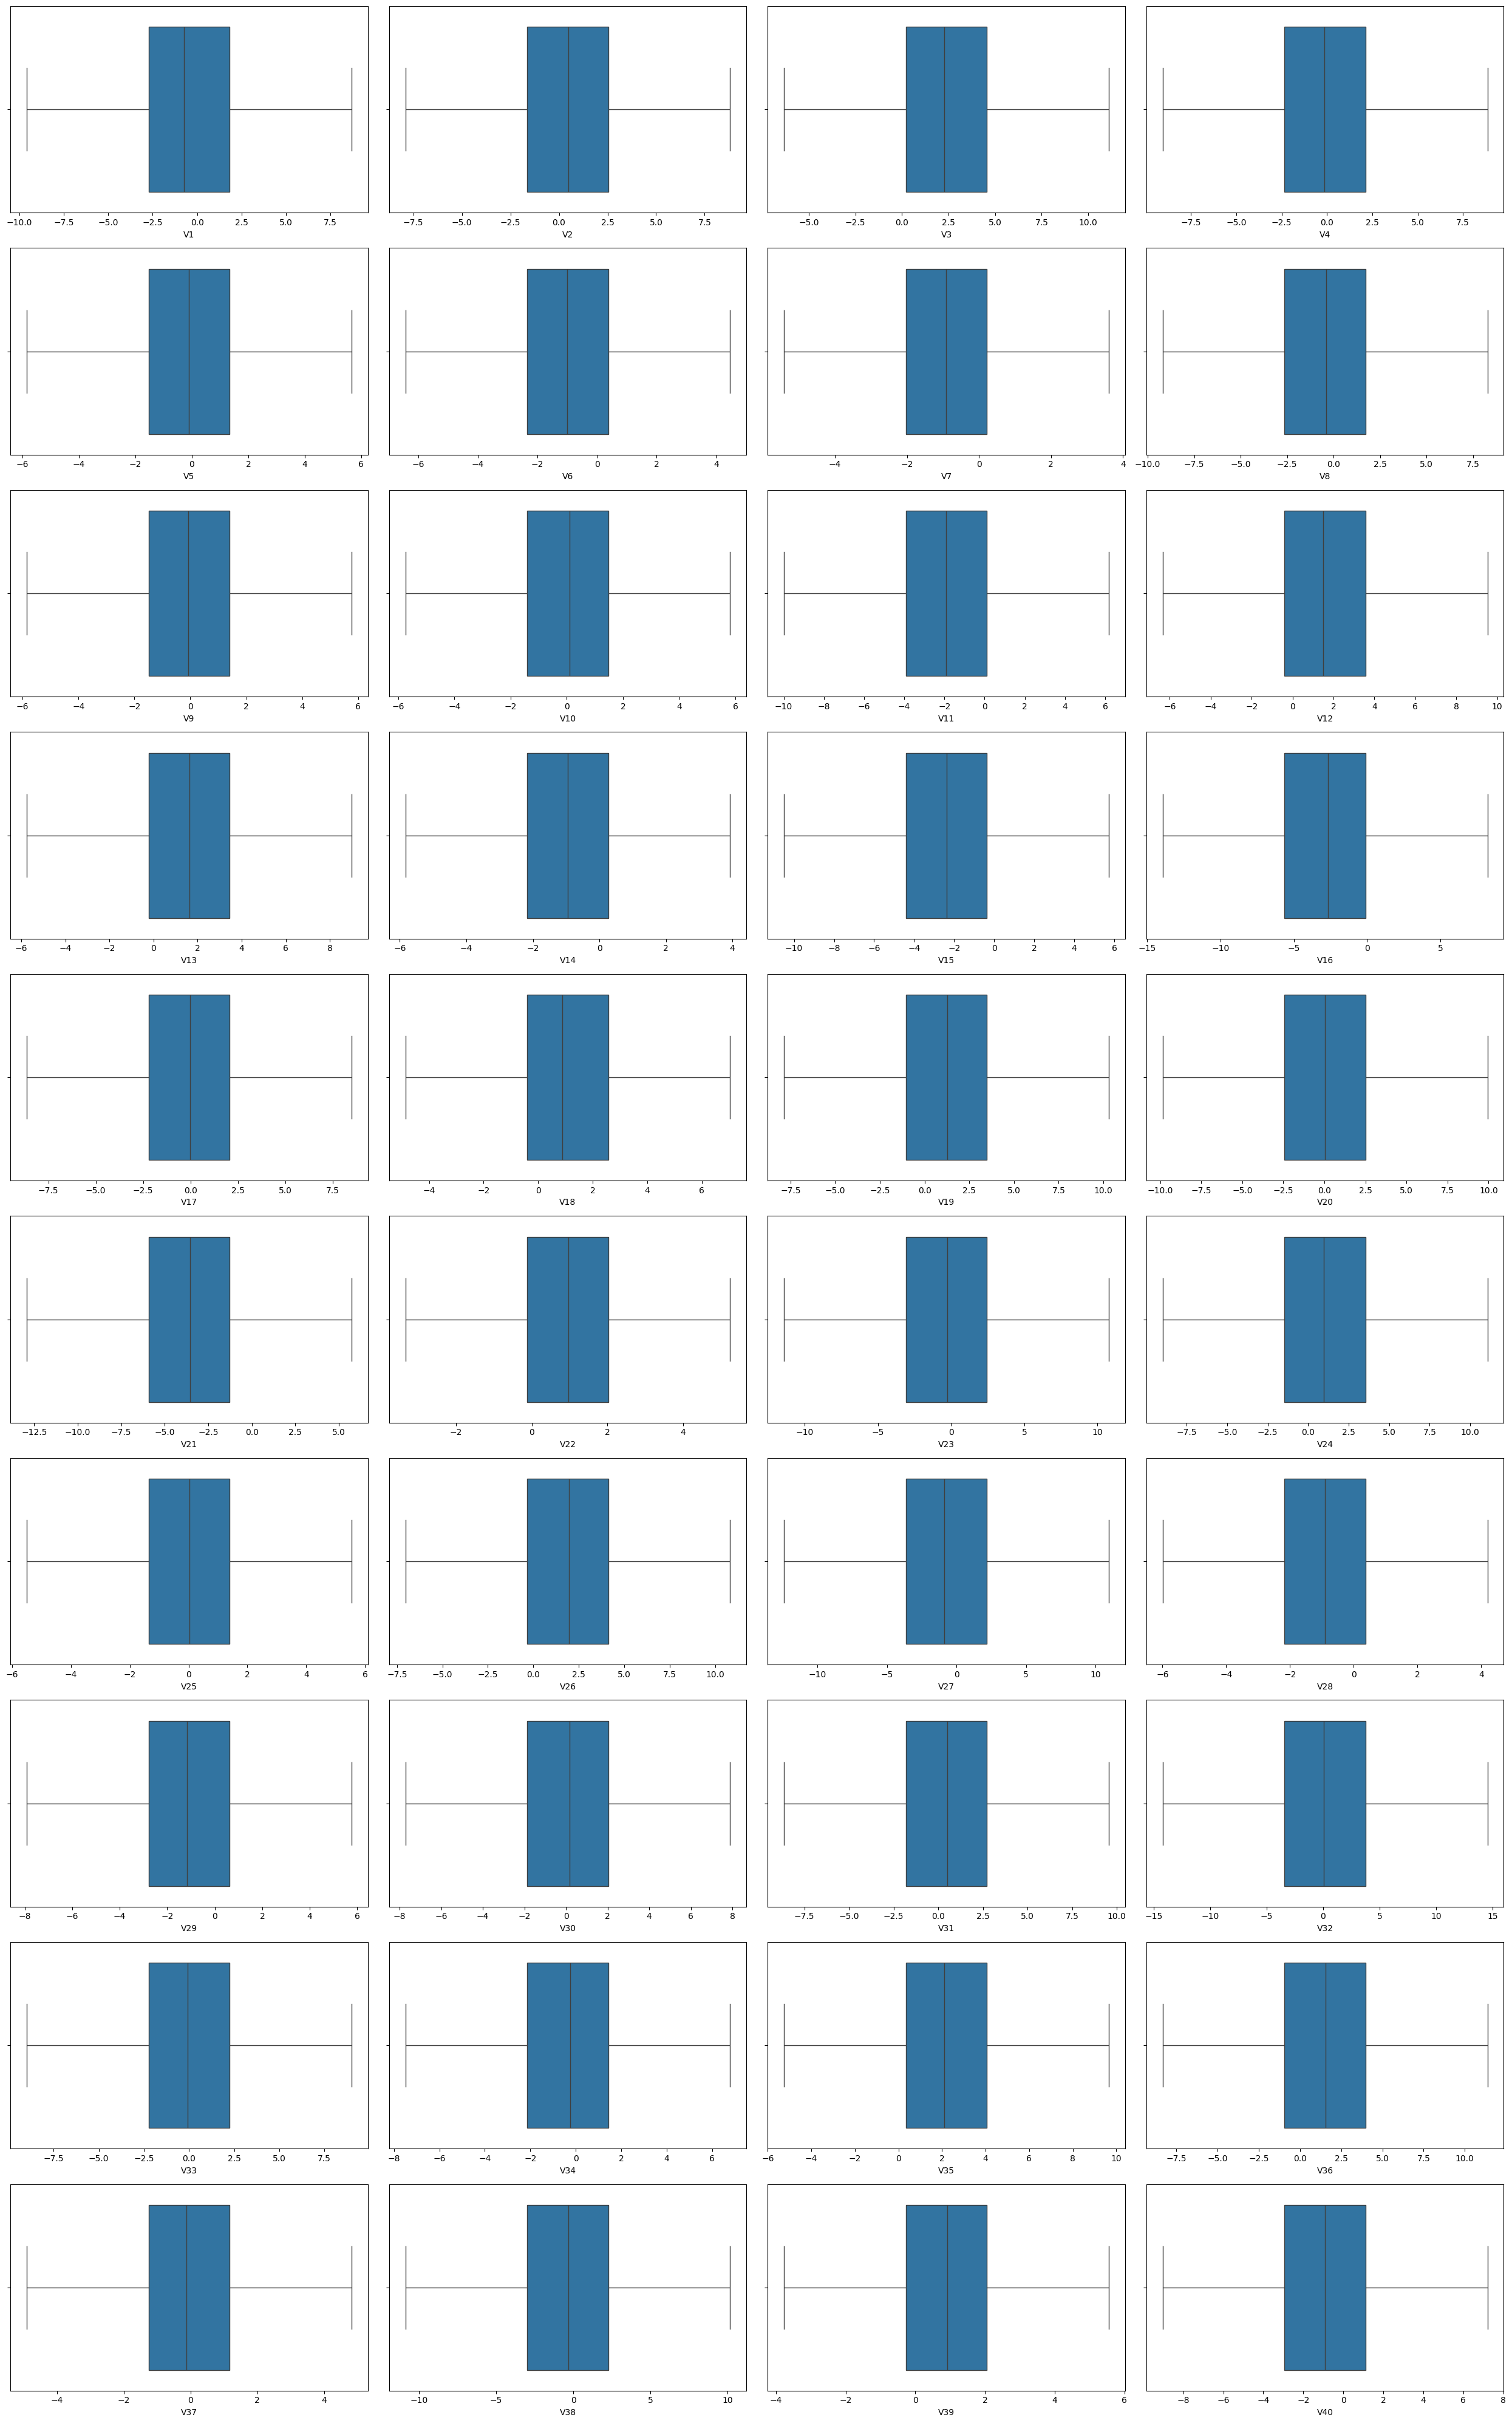

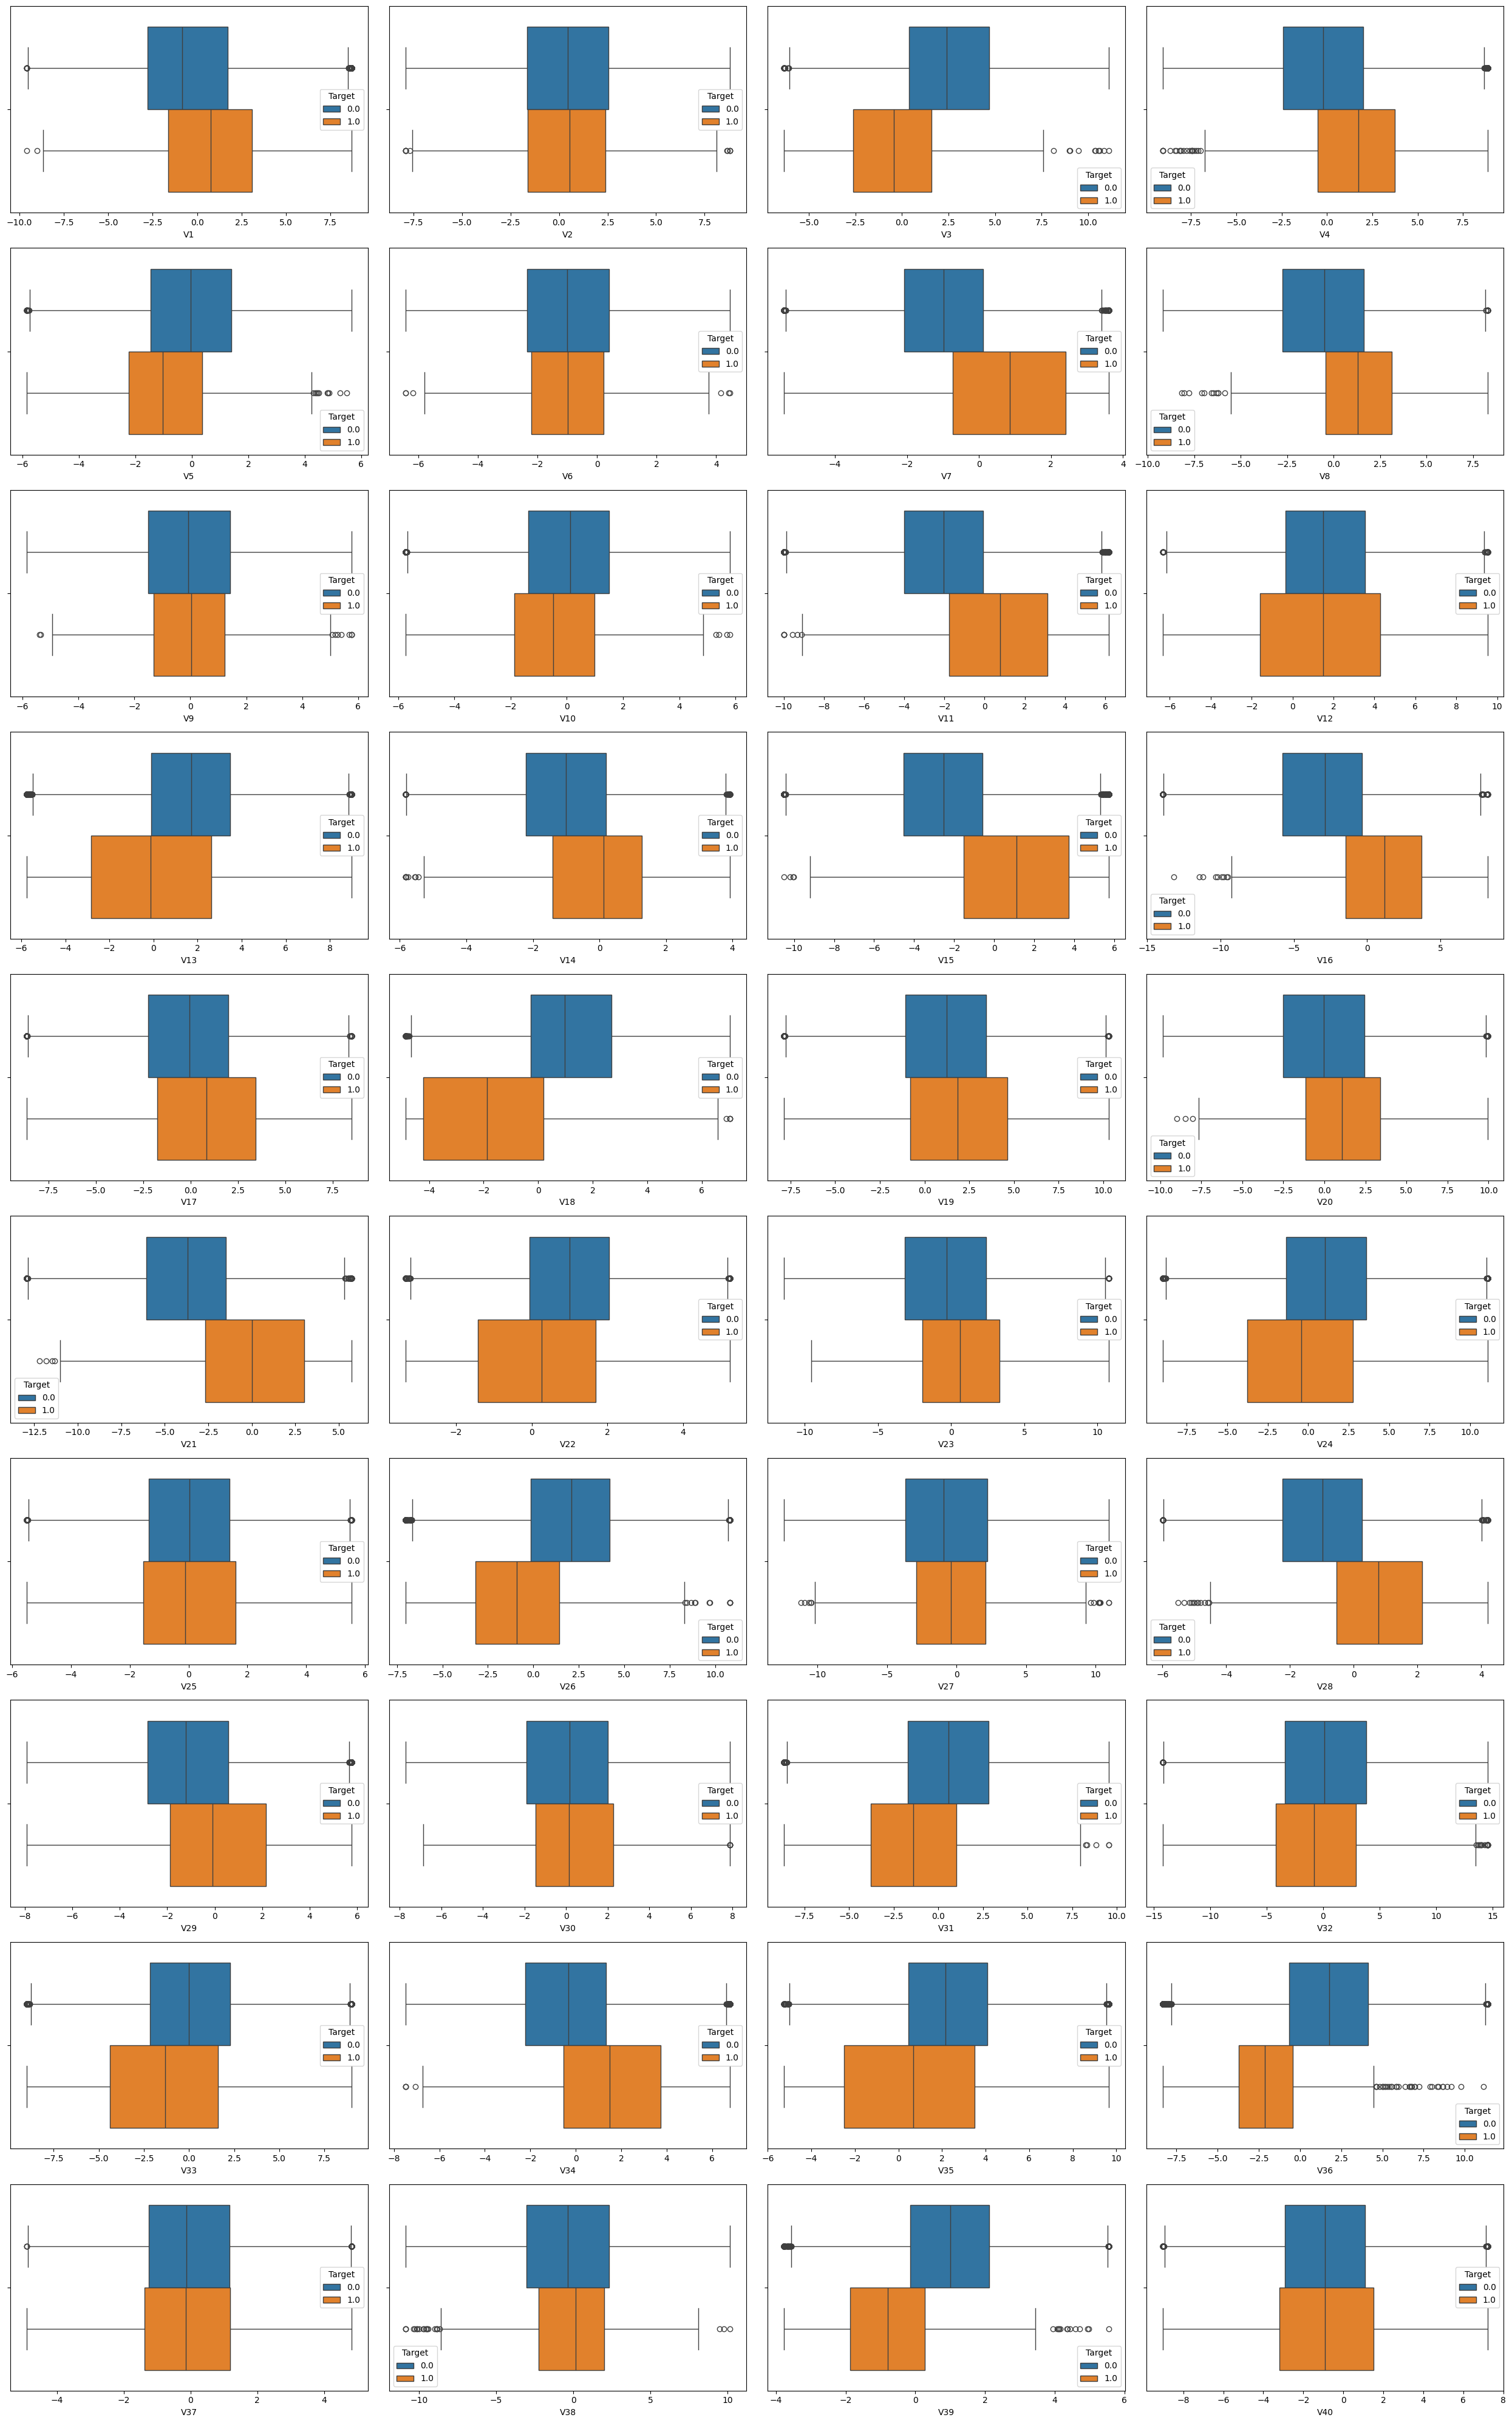

In [ ]:
print("These are the columns with 'Outliers' after the treatment")

plt_cols = 4
plt_rows = int(len(col_list) / plt_cols)

plt.figure(figsize=(25, plt_rows * plt_cols))
for index, column_name in enumerate(col_list):
    plt.subplot(plt_rows, plt_cols, index+1)
    sns.boxplot(df, x=column_name)
    plt.tight_layout();

plt.figure(figsize=(25, plt_rows * plt_cols))
for index, column_name in enumerate(col_list):
    plt.subplot(plt_rows, plt_cols, index+1)
    sns.boxplot(df, x=column_name, hue="Target")
    plt.tight_layout();

#### Observations:
Now we note that general view we don't have **Outliers** but when we plot by failures or not failures we can see a little of **Outliers**, that will not affect to much the model performance.

#### **Data Preparation for modeling**

In [ ]:
# Defining the X and y sets for Main Set
X = df.drop(["Target"], axis=1)
y = df["Target"]

# Defining the X and y sets for Testing Set
X_test = df_test.drop(["Target"], axis=1)
y_test = df_test["Target"]

# Splitting the dataset 'df' into Train and Validation
# We going to stratify the target variable to divide the sets with same proportion of 'No Failure' and 'Failure'
X_train, X_val, y_train,  y_val = train_test_split(
    X, y, test_size=.25, random_state=1, stratify=y
)

In [ ]:
# Checking the Independent Variables shape and Dependent Variable Division
print("'Independ. Var' Training set have {} rows and {} columns.".format(X_train.shape[0], X_train.shape[1]), end="\n")
print("'Independ. Var' Validation set have {}, rows and {} columns.".format(X_val.shape[0], X_val.shape[1]), end="\n")
print("'Independ. Var' Testing set have {} rows and {} columns.".format(X_test.shape[0], X_test.shape[1]), end="\n\n")
print("*" * 62, end="\n\n")
print("'Depend. Var' - Training set Composition \n", round(y_train.value_counts(normalize=True) * 100, 2), end="\n\n")
print("'Depend. Var' - Validation set Composition \n", round(y_val.value_counts(normalize=True) * 100, 2), end="\n\n")
print("'Depend. Var' - Testing set Composition \n", round(y_test.value_counts(normalize=True) * 100, 2))

'Independ. Var' Training set have 15000 rows and 40 columns.
'Independ. Var' Validation set have 5000, rows and 40 columns.
'Independ. Var' Testing set have 5000 rows and 40 columns.

**************************************************************

'Depend. Var' - Training set Composition 
 Target
0.0    94.45
1.0     5.55
Name: proportion, dtype: float64

'Depend. Var' - Validation set Composition 
 Target
0.0    94.44
1.0     5.56
Name: proportion, dtype: float64

'Depend. Var' - Testing set Composition 
 Target
0.0    94.36
1.0     5.64
Name: proportion, dtype: float64


# **Model Building**

## Model Evaluation Criterion

Write down the model evaluation criterion with rationale

**Model Evaluation Criterion: Recall**

- **Rationale:** ***Recall*** is chosen to prioritize the detection of actual failures (class “1”). Missing a failure (False Negative) leads to costly generator replacement, while false alarms (False Positives) only trigger low-cost inspections. Maximizing ***Recall*** ensures early repairs and minimizes high-impact maintenance costs.

In [ ]:
def model_performance_classification_sklearn(model, predictors, target, threshold=.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: '.5' is to help give a classification == '1' for results above him (threshold)
    """

    # predicting using the independent variables
    pred = model.predict(predictors) > threshold

    acc = round(accuracy_score(target, pred) * 100, 2)  # to compute Accuracy
    recall = round(recall_score(target, pred, average="binary") * 100, 2)  # to compute Recall we put average="binary" because we are treat about binary classification task
    precision = round(precision_score(target, pred, average="binary") * 100, 2)  # to compute Precision we put average="binary" because we are treat about binary classification task
    f1 = round(f1_score(target, pred, average="binary") * 100, 2)  # to compute F1-score we put average="binary" because we are treat about binary classification task

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target, threshold=.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predicting probabilities
    y_prob = model.predict(predictors)
    # Converting the predictions to adapte de confusion matrix to the Neural Networks
    y_pred = (y_prob > threshold).astype(int)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title("Confusion Matrix with Percentages");

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Recall
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# model name","# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization","train loss","validation loss","train recall","validation recall","time (secs)"]

# Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

## Initial Model Building (Model 0)

- Let's start with a neural network consisting of
  - just one hidden layer
  - activation function of ReLU
  - SGD as the optimizer

In [ ]:
# NN Initial Structure Model 0:
# Neurons
Hidden_Layer_Neurons = 64
Output_Layer_Neurons = 1

# Predictors or Features
predictores = X_train.shape[1]

# Weights
Hidden_Layer_Weights = Hidden_Layer_Neurons * predictores
Output_Layer_Weights = Hidden_Layer_Neurons * Output_Layer_Neurons
Total_Weights = Hidden_Layer_Weights + Output_Layer_Weights

#  Bias, for each Neuron we have a Bias
Hidden_Layer_Bias = Hidden_Layer_Neurons
Output_Layer_Bias = Output_Layer_Neurons
Total_Bias = Hidden_Layer_Bias + Output_Layer_Bias

print("Hidden_Layer - Weights:", Hidden_Layer_Weights)
print("Output_Layer - Weights:", Output_Layer_Weights)
print("*" * 30)

print("Hidden_Layer - Bias:", Hidden_Layer_Bias)
print("Output_Layer - Bias:", Output_Layer_Bias)
print("*" * 30)

print("Total Features/Predoctors:", predictores)
print("Total Weights:", Total_Weights)
print("Total Bias:", Total_Bias)


Hidden_Layer - Weights: 2560
Output_Layer - Weights: 64
******************************
Hidden_Layer - Bias: 64
Output_Layer - Bias: 1
******************************
Total Features/Predoctors: 40
Total Weights: 2624
Total Bias: 65


In [ ]:
# Clearing current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
batch_size = 50
epoch = 20

iterations_per_epoch = (X_train.shape[0] / batch_size)
print("Weight update for epoch in Train Set: {}.\nTotal Weight updates Train Set: {}".format(iterations_per_epoch, iterations_per_epoch * epoch))

Weight update for epoch in Train Set: 300.0.
Total Weight updates Train Set: 6000.0


In [ ]:
# Initializing the model - neural network
model_0 = Sequential()
model_0.add(Dense(64, activation="relu", input_dim=X_train.shape[1])) # hidden layer with "64 neurons", "ReLU" as activation function and with default weight_initializer = "xavier"
model_0.add(Dense(1, activation="sigmoid")) # output layer with "1 neuron" and an output function for binary classification "Sigmoid"

In [ ]:
# defining SGD as the optimizer to be used and the metric
model_0.compile(
            optimizer=SGD(),
            loss="binary_crossentropy",
            metrics=["Recall"]
        )

In [ ]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start = time.time()
history = model_0.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=batch_size, epochs=epoch)
end = time.time()

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.3221 - loss: 0.1602 - val_Recall: 0.5612 - val_loss: 0.1115
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5769 - loss: 0.1001 - val_Recall: 0.6835 - val_loss: 0.0954
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.6623 - loss: 0.0875 - val_Recall: 0.7230 - val_loss: 0.0872
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7019 - loss: 0.0807 - val_Recall: 0.7482 - val_loss: 0.0840
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7320 - loss: 0.0761 - val_Recall: 0.7554 - val_loss: 0.0805
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7464 - loss: 0.0727 - val_Recall: 0.7698 - val_loss: 0.0784
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7632 - loss: 0.0699 - val_Recall: 0.7662 - val_loss: 0.0765
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7740 - loss: 0.0680 - val_Recall: 0.7662 - val_loss: 0.0753
Epoch 9/

In [ ]:
print("Time taken to run all epochs in seconds {}".format(round(end-start, 2)))

Time taken to run all epochs in seconds 11.6


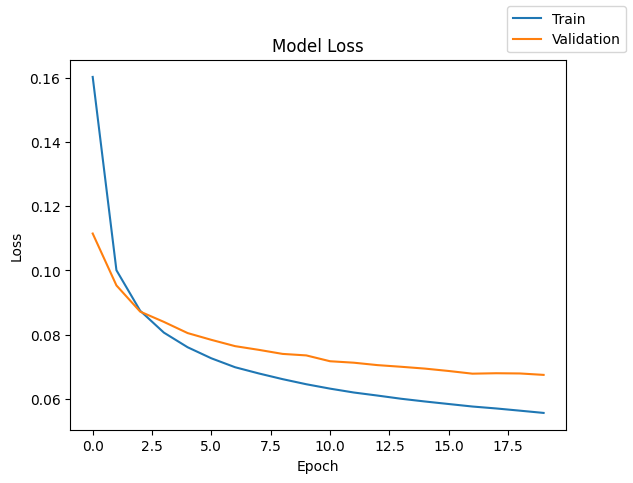

In [ ]:
plot(history,"loss")

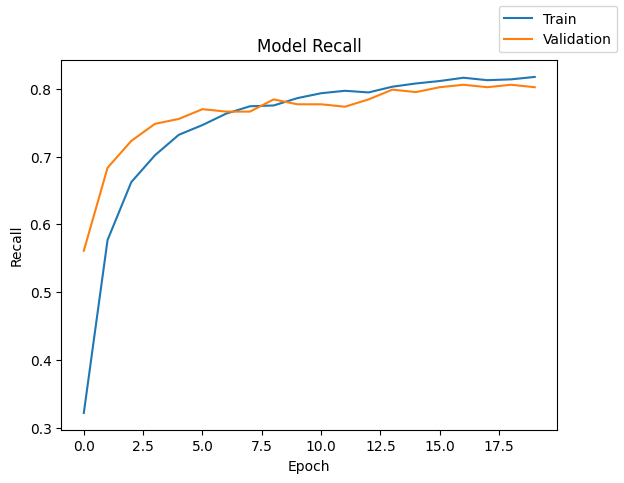

In [ ]:
plot(history, "Recall")

In [ ]:
model_0_train_perf = model_performance_classification_sklearn(model_0, X_train, y_train)
print("Training Performance - Model 0")
model_0_train_perf

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step
Training Performance - Model 0


Accuracy  Recall  Precision     F1
0     98.82   80.89       97.4  88.38

In [ ]:
model_0_val_perf = model_performance_classification_sklearn(model_0, X_val, y_val)
print("Validation Performance - Model 0")
model_0_val_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
Validation Performance - Model 0


Accuracy  Recall  Precision     F1
0     98.78   80.22      97.38  87.97

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
Training Set - Model 0


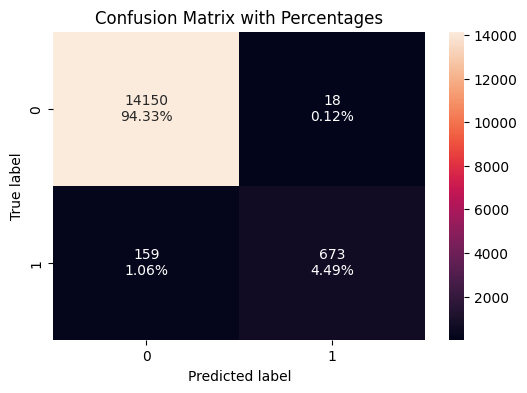

In [ ]:
confusion_matrix_sklearn(model_0, X_train, y_train)
print("Training Set - Model 0")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
Validation Set - Model 0


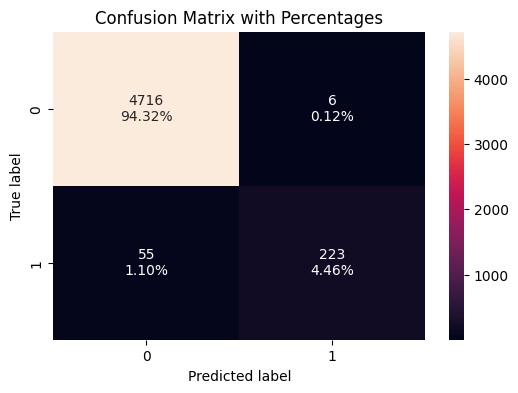

In [ ]:
confusion_matrix_sklearn(model_0, X_val, y_val)
print("Validation Set - Model 0")

In [ ]:
y_train_pred_0 = model_0.predict(X_train)
y_val_pred_0 = model_0.predict(X_val)

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step


In [ ]:
print("Classification Report - Train data Model_0", end="\n\n")
cr_train_model_0 = classification_report(y_train, y_train_pred_0 > .5, output_dict=True)
pd.DataFrame(cr_train_model_0).T

Classification Report - Train data Model_0



precision    recall  f1-score     support
0.0            0.988888  0.998730  0.993784  14168.0000
1.0            0.973951  0.808894  0.883782    832.0000
accuracy       0.988200  0.988200  0.988200      0.9882
macro avg      0.981419  0.903812  0.938783  15000.0000
weighted avg   0.988060  0.988200  0.987683  15000.0000

In [ ]:
print("Classification Report - Validation data Model_0",end="\n\n")
cr_val_model_0 = classification_report(y_val, y_val_pred_0 > .5, output_dict=True)
pd.DataFrame(cr_val_model_0).T

Classification Report - Validation data Model_0



precision    recall  f1-score    support
0.0            0.988472  0.998729  0.993574  4722.0000
1.0            0.973799  0.802158  0.879684   278.0000
accuracy       0.987800  0.987800  0.987800     0.9878
macro avg      0.981136  0.900444  0.936629  5000.0000
weighted avg   0.987656  0.987800  0.987242  5000.0000

#### Observation:
* **Model 0**
    - Stable model - [It is good]
    - High loss result - [It is not good]
    - Loss difference between Train and Validation is low/short - [It is acceptable == 1.179]
    - Isn't an Overfit model - [It is good]
    - Acceptable **Recall** results for unseen data more than 80% - [Needs improvement]

In [ ]:
results.loc[0] = ["model_0", 1, [64], ["relu"], epoch, batch_size, "SGD", [0.01,"-"], "xavier", "-", round(history.history["loss"][-1] * 100, 2), round(history.history["val_loss"][-1] * 100, 2), round(history.history["Recall"][-1] * 100, 2), round(history.history["val_Recall"][-1] * 100, 2), round(end - start, 2)  ]

In [ ]:
results

# model name  # hidden layers # neurons - hidden layer  \
0      model_0                1                     [64]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                              [relu]        20          50       SGD   

  learning rate, momentum weight initializer regularization  train loss  \
0               [0.01, -]             xavier              -        5.57   

   validation loss  train recall  validation recall  time (secs)  
0             6.75         81.73              80.22         11.6

# **Model Performance Improvement**

## Model 1

In [ ]:
# Clearing current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Initializing the model - neural network
model_1 = Sequential()
model_1.add(Dense(128, activation="relu", input_dim=X_train.shape[1])) # First hidden layer with "128 neurons", "ReLU" as activation function and with default weight_initializer = "xavier"
model_1.add(Dense(64, activation="tanh")) # Second hidden layer with "64 neurons", "Tanh" as activation function and with default weight_initializer = "xavier"
model_1.add(Dense(1, activation="sigmoid")) # output layer with "1 neuron" and an output function for binary classification "Sigmoid"

In [ ]:
model_1.compile(
    optimizer = SGD(),
    loss="binary_crossentropy",
    metrics=["Recall"]
)

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epoch)
end = time.time()

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.2861 - loss: 0.1596 - val_Recall: 0.4712 - val_loss: 0.1099
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5228 - loss: 0.0964 - val_Recall: 0.5971 - val_loss: 0.0907
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.6142 - loss: 0.0817 - val_Recall: 0.6619 - val_loss: 0.0812
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.6743 - loss: 0.0730 - val_Recall: 0.7086 - val_loss: 0.0752
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7115 - loss: 0.0672 - val_Recall: 0.7302 - val_loss: 0.0711
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7332 - loss: 0.0631 - val_Recall: 0.7626 - val_loss: 0.0682
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7476 - loss: 0.0598 - val_Recall: 0.7662 - val_loss: 0.0658
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7752 - loss: 0.0572 - val_Recall: 0.7770 - val_loss: 0.0638
Epoch 9/

In [ ]:
print("Time taken to run all epochs in seconds {}".format(round(end-start, 2)))

Time taken to run all epochs in seconds 12.55


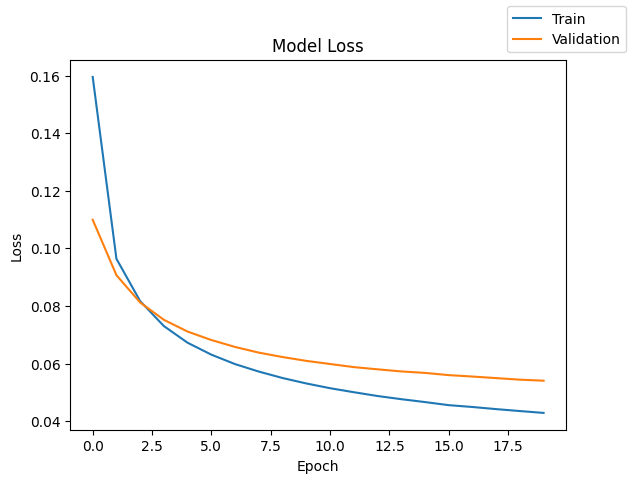

In [ ]:
plot(history, "loss")

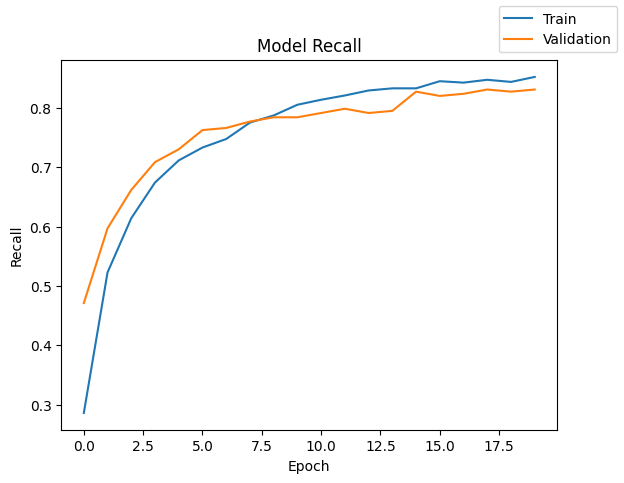

In [ ]:
plot(history, "Recall")

In [ ]:
model_1_train_perf = model_performance_classification_sklearn(model_1, X_train, y_train)
print("Training Performance - Model 1")
model_1_train_perf

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
Training Performance - Model 1


Accuracy  Recall  Precision     F1
0      99.1   85.22      98.34  91.31

In [ ]:
model_1_val_perf = model_performance_classification_sklearn(model_1, X_val, y_val)
print("Validation Performance - Model 1")
model_1_val_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step
Validation Performance - Model 1


Accuracy  Recall  Precision     F1
0     98.88   83.09      96.25  89.19

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step
Training Set - Model 1


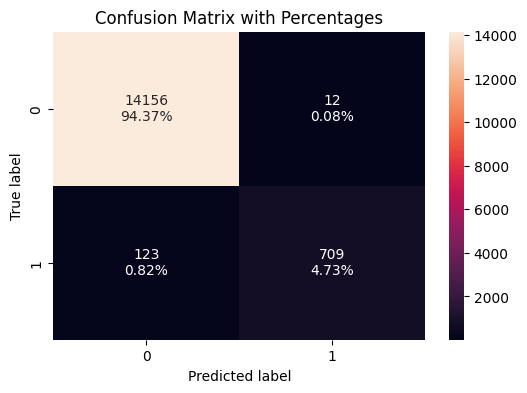

In [ ]:
confusion_matrix_sklearn(model_1, X_train, y_train)
print("Training Set - Model 1")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
Validation Set - Model 1


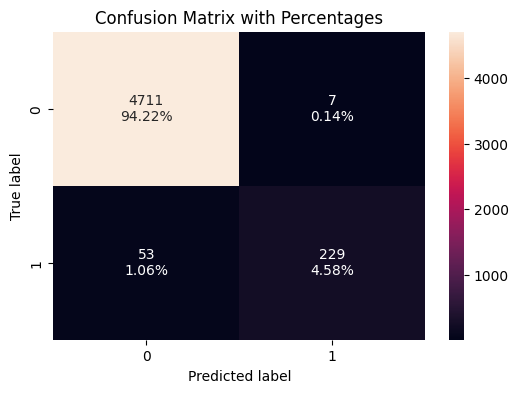

In [ ]:
confusion_matrix_sklearn(model_1, X_test, y_test)
print("Validation Set - Model 1")

In [ ]:
y_train_pred_1 = model_1.predict(X_train)
y_val_pred_1 = model_1.predict(X_val)

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step


In [ ]:
print("Classification Report - Train data Model_1", end="\n\n")
cr_train_model_1 = classification_report(y_train, y_train_pred_1 > .5, output_dict=True)
pd.DataFrame(cr_train_model_1).T

Classification Report - Train data Model_1



precision    recall  f1-score    support
0.0            0.991386  0.999153  0.995254  14168.000
1.0            0.983356  0.852163  0.913071    832.000
accuracy       0.991000  0.991000  0.991000      0.991
macro avg      0.987371  0.925658  0.954163  15000.000
weighted avg   0.990941  0.991000  0.990696  15000.000

In [ ]:
print("Classification Report - Validation data Model_1", end="\n\n")
cr_val_model_1 = classification_report(y_val, y_val_pred_1 > .5, output_dict=True)
pd.DataFrame(cr_val_model_1).T

Classification Report - Validation data Model_1



precision    recall  f1-score    support
0.0            0.990126  0.998094  0.994094  4722.0000
1.0            0.962500  0.830935  0.891892   278.0000
accuracy       0.988800  0.988800  0.988800     0.9888
macro avg      0.976313  0.914515  0.942993  5000.0000
weighted avg   0.988590  0.988800  0.988412  5000.0000

#### Observation:
* **Model 1**
    - Stable model - [It is good]
    - High loss result - [It is not good]
    - Loss difference between Train and Validation is low/short - [It is acceptable = 1.120]
    - Isn't an Overfit model - [It is good]
    - Acceptable **Recall** results for unseen data more than 82% - [Needs improvement]

In [ ]:
results.loc[1] = ["model_1", 2, [128, 64], ["relu", "tanh"], epoch, batch_size, "SGD", [0.01, "-"], "xavier", "-", round(history.history["loss"][-1] * 100, 2), round(history.history["val_loss"][-1] * 100, 2), round(history.history["Recall"][-1] * 100, 2), round(history.history["val_Recall"][-1] * 100, 2), round(end-start, 2)]

In [ ]:
results

# model name  # hidden layers # neurons - hidden layer  \
0      model_0                1                     [64]   
1      model_1                2                [128, 64]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                              [relu]        20          50       SGD   
1                        [relu, tanh]        20          50       SGD   

  learning rate, momentum weight initializer regularization  train loss  \
0               [0.01, -]             xavier              -        5.57   
1               [0.01, -]             xavier              -        4.29   

   validation loss  train recall  validation recall  time (secs)  
0             6.75         81.73              80.22        11.60  
1             5.41         85.22              83.09        12.55

## Model 2

In [ ]:
# Clearing current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Initializing the model - neural network
model_2 = Sequential()
model_2.add(Dense(256, activation="relu", input_dim=X_train.shape[1])) # First hidden layer with "128 neurons", "ReLU" as activation function
model_2.add(Dense(128, activation="tanh")) # Second hidden layer with "64 neurons", "Tanh" as activation function
model_2.add(Dense(1, activation="sigmoid")) # output layer with "1 neuron" and an output function for binary classification "Sigmoid"

In [ ]:
learning_rate = .01 # To improve the that the model learning patterns
momentum = .5 # To improve the oscilation of Gradient Descent find better minimum local or global

model_2.compile(
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum),
    loss = "binary_crossentropy",
    metrics = ["Recall"]

)

In [ ]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,521 (170.00 KB)

 Trainable params: 43,521 (170.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model
start = time.time()
history = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epoch)
end = time.time()

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.4062 - loss: 0.1166 - val_Recall: 0.6439 - val_loss: 0.0854
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.6875 - loss: 0.0736 - val_Recall: 0.7482 - val_loss: 0.0733
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7536 - loss: 0.0633 - val_Recall: 0.7842 - val_loss: 0.0669
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7885 - loss: 0.0573 - val_Recall: 0.7950 - val_loss: 0.0623
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8125 - loss: 0.0530 - val_Recall: 0.7878 - val_loss: 0.0599
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8269 - loss: 0.0500 - val_Recall: 0.7950 - val_loss: 0.0580
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8353 - loss: 0.0475 - val_Recall: 0.8058 - val_loss: 0.0561
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8474 - loss: 0.0456 - val_Recall: 0.8165 - val_loss: 0.0551
Epoch 9/

In [ ]:
print("Time taken to run all epochs in seconds {}".format(round(end-start, 2)))

Time taken to run all epochs in seconds 13.16


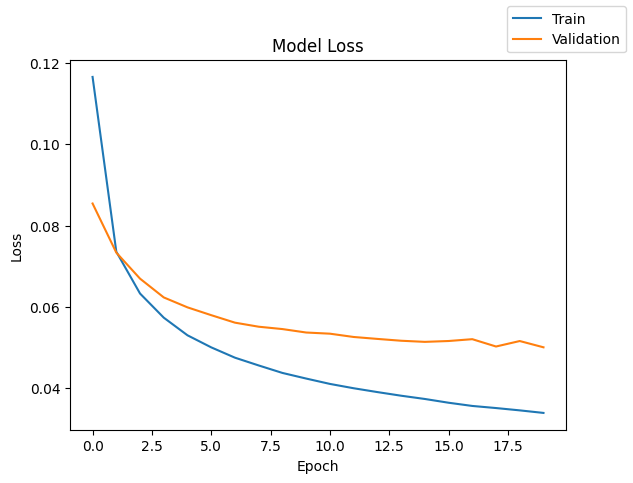

In [ ]:
plot(history, "loss")

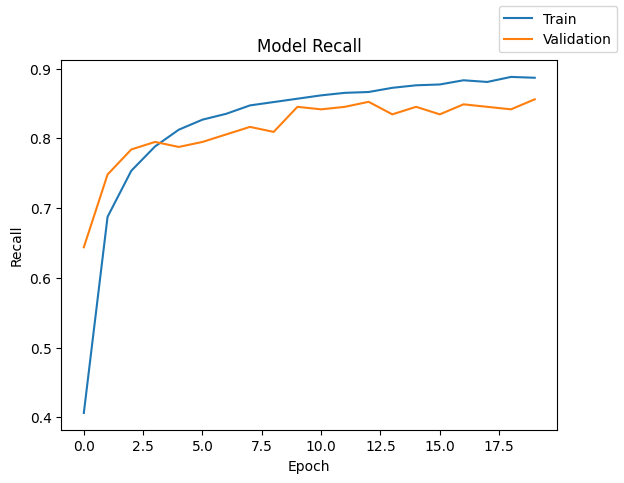

In [ ]:
plot(history, "Recall")

In [ ]:
model_2_train_perf = model_performance_classification_sklearn(model_2, X_train, y_train)
print("Training Performance - Model 2")
model_2_train_perf

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step
Training Performance - Model 2


Accuracy  Recall  Precision     F1
0     99.35   89.18      99.07  93.86

In [ ]:
model_2_val_perf = model_performance_classification_sklearn(model_2, X_val, y_val)
print("valing Performance - Model 2")
model_2_val_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step
valing Performance - Model 2


Accuracy  Recall  Precision     F1
0      99.1   85.61      97.94  91.36

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
Training Set - Model 2


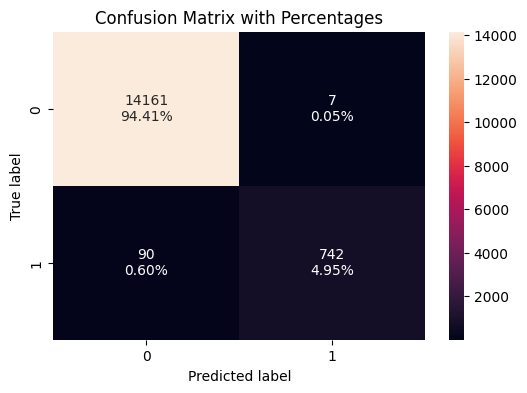

In [ ]:
confusion_matrix_sklearn(model_2, X_train, y_train)
print("Training Set - Model 2")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step
Validation Set - Model 2


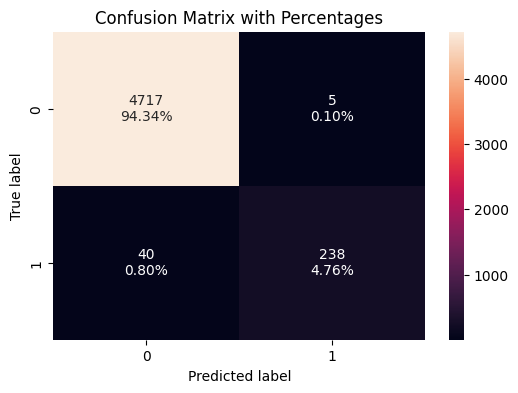

In [ ]:
confusion_matrix_sklearn(model_2, X_val, y_val)
print("Validation Set - Model 2")

In [ ]:
y_train_pred_2 = model_2.predict(X_train)
y_val_pred_2 = model_2.predict(X_val)

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step


In [ ]:
print("Classification Report - Train data Model_2", end="\n\n")
cr_train_model_2 = classification_report(y_train, y_train_pred_2 > .5, output_dict=True)
pd.DataFrame(cr_train_model_2).T

Classification Report - Train data Model_2



precision    recall  f1-score       support
0.0            0.993685  0.999506  0.996587  14168.000000
1.0            0.990654  0.891827  0.938646    832.000000
accuracy       0.993533  0.993533  0.993533      0.993533
macro avg      0.992169  0.945666  0.967617  15000.000000
weighted avg   0.993517  0.993533  0.993373  15000.000000

In [ ]:
print("Classification Report - Validation data Model_2", end="\n\n")
cr_val_model_2 = classification_report(y_val, y_val_pred_2 > .5, output_dict=True)
pd.DataFrame(cr_val_model_2).T

Classification Report - Validation data Model_2



precision    recall  f1-score   support
0.0            0.991591  0.998941  0.995253  4722.000
1.0            0.979424  0.856115  0.913628   278.000
accuracy       0.991000  0.991000  0.991000     0.991
macro avg      0.985508  0.927528  0.954440  5000.000
weighted avg   0.990915  0.991000  0.990714  5000.000

#### Observation:
* **Model 2**
    - Unstable model - [It is not good]
    - High loss result for validation set - [It is not good]
    - Loss difference between Train and Validation too high - [It is not good = 1.609]
    - Is an Overfit model - [It is not good]
    - Acceptable **Recall** results for unseen data more than 84% - [Needs improvement]

In [ ]:
results.loc[2] = ["model_2", 3, [256, 128], ["relu", "tanh"], epoch, batch_size, "SGD", [learning_rate, momentum], "xavier", "-", round(history.history["loss"][-1] * 100, 2), round(history.history["val_loss"][-1] * 100, 2), round(history.history["Recall"][-1] * 100, 2), round(history.history["val_Recall"][-1] * 100, 2), round(end-start, 2)]

In [ ]:
results

# model name  # hidden layers # neurons - hidden layer  \
0      model_0                1                     [64]   
1      model_1                2                [128, 64]   
2      model_2                3               [256, 128]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                              [relu]        20          50       SGD   
1                        [relu, tanh]        20          50       SGD   
2                        [relu, tanh]        20          50       SGD   

  learning rate, momentum weight initializer regularization  train loss  \
0               [0.01, -]             xavier              -        5.57   
1               [0.01, -]             xavier              -        4.29   
2             [0.01, 0.5]             xavier              -        3.39   

   validation loss  train recall  validation recall  time (secs)  
0             6.75         81.73              80.22        11.60  
1             5.41         85.22              83.09        12.55  
2             5.00         88.70              85.61        13.16

## Model 3

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Initializing the model - neural network
model_3 = Sequential()
model_3.add(Dense(256, activation="relu", kernel_initializer="he_normal", input_dim=X_train.shape[1]))
model_3.add(Dense(128, activation="tanh"))
model_3.add(Dense(1, activation="sigmoid"))

In [ ]:
learning_rate_adam = .001

model_3.compile(
    optimizer = Adam(learning_rate=learning_rate_adam),
    loss = "binary_crossentropy",
    metrics = ["Recall"]
)

In [ ]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,521 (170.00 KB)

 Trainable params: 43,521 (170.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start = time.time()
history = model_3.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epoch)
end = time.time()

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.6995 - loss: 0.0758 - val_Recall: 0.7986 - val_loss: 0.0584
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8438 - loss: 0.0464 - val_Recall: 0.8453 - val_loss: 0.0522
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8702 - loss: 0.0407 - val_Recall: 0.8597 - val_loss: 0.0483
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8858 - loss: 0.0366 - val_Recall: 0.8417 - val_loss: 0.0496
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8954 - loss: 0.0343 - val_Recall: 0.8741 - val_loss: 0.0486
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.9026 - loss: 0.0329 - val_Recall: 0.8777 - val_loss: 0.0493
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8990 - loss: 0.0320 - val_Recall: 0.8741 - val_loss: 0.0518
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.9062 - loss: 0.0305 - val_Recall: 0.8561 - val_loss: 0.0500
Epoch 9/

In [ ]:
print("Time taken to run all epochs in seconds {}".format(round(end-start, 2)))

Time taken to run all epochs in seconds 14.39


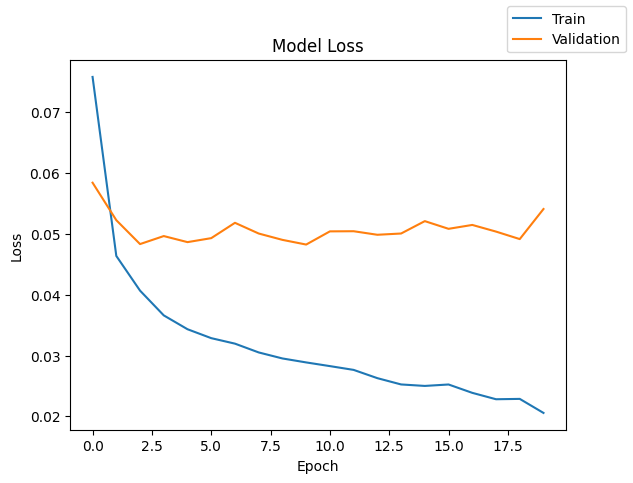

In [ ]:
plot(history, "loss")

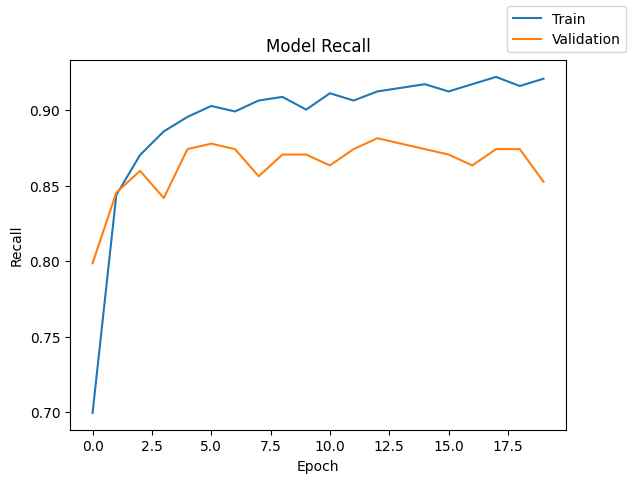

In [ ]:
plot(history, "Recall")

In [ ]:
model_3_train_perf = model_performance_classification_sklearn(model_3, X_train, y_train)
print("Training Performance - Model 3")
model_3_train_perf

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
Training Performance - Model 3


Accuracy  Recall  Precision     F1
0     99.55   92.19      99.74  95.82

In [ ]:
model_3_val_perf = model_performance_classification_sklearn(model_3, X_val, y_val)
print("Valtidation Performance - Model 3")
model_3_val_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
Valtidation Performance - Model 3


Accuracy  Recall  Precision    F1
0     99.04   85.25      97.13  90.8

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
Training Set - Model 3


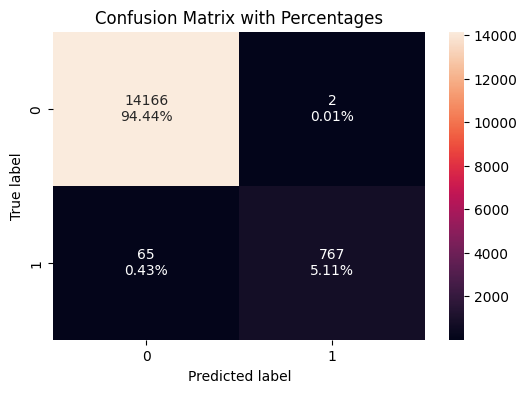

In [ ]:
confusion_matrix_sklearn(model_3, X_train, y_train)
print("Training Set - Model 3")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
Validation Set - Model 3


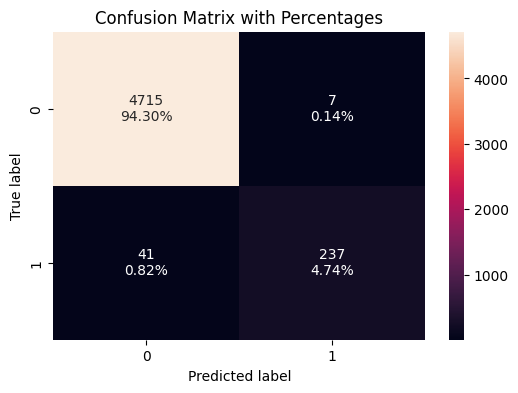

In [ ]:
confusion_matrix_sklearn(model_3, X_val, y_val)
print("Validation Set - Model 3")

In [ ]:
y_train_pred_3 = model_3.predict(X_train)
y_val_pred_3 = model_3.predict(X_val)

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step


In [ ]:
print("Classification Report - Train data Model_3", end="\n\n")
cr_train_model_3 = classification_report(y_train, y_train_pred_3 > .5, output_dict=True)
pd.DataFrame(cr_train_model_3).T

Classification Report - Train data Model_3



precision    recall  f1-score       support
0.0            0.995433  0.999859  0.997641  14168.000000
1.0            0.997399  0.921875  0.958151    832.000000
accuracy       0.995533  0.995533  0.995533      0.995533
macro avg      0.996416  0.960867  0.977896  15000.000000
weighted avg   0.995542  0.995533  0.995450  15000.000000

In [ ]:
print("Classification Report - Validation data Model_3", end="\n\n")
cr_val_model_3 = classification_report(y_val, y_val_pred_3 > .5, output_dict=True)
pd.DataFrame(cr_val_model_3).T

Classification Report - Validation data Model_3



precision    recall  f1-score    support
0.0            0.991379  0.998518  0.994936  4722.0000
1.0            0.971311  0.852518  0.908046   278.0000
accuracy       0.990400  0.990400  0.990400     0.9904
macro avg      0.981345  0.925518  0.951491  5000.0000
weighted avg   0.990264  0.990400  0.990105  5000.0000

#### Observation:
* **Model 3**
    - Unstable model - [It is not good]
    - High loss result for validation set - [It is not good]
    - Loss difference between Train and Validation too high - [It is not good = 3.350]
    - Is an Overfit model - [It is not good]
    - Great **Recall** results for unseen data more than 85% - [It is acceptable]

In [ ]:
results.loc[3] = ["model_3", 2, [256, 128], ["relu", "tanh"], epoch, batch_size, "Adam", [learning_rate_adam, "-"], "he, xavier", "-", round(history.history["loss"][-1] * 100, 2), round(history.history["val_loss"][-1] * 100, 2), round(history.history["Recall"][-1] * 100, 2), round(history.history["val_Recall"][-1] * 100, 2), round(end-start, 2)]

In [ ]:
results

# model name  # hidden layers # neurons - hidden layer  \
0      model_0                1                     [64]   
1      model_1                2                [128, 64]   
2      model_2                3               [256, 128]   
3      model_3                2               [256, 128]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                              [relu]        20          50       SGD   
1                        [relu, tanh]        20          50       SGD   
2                        [relu, tanh]        20          50       SGD   
3                        [relu, tanh]        20          50      Adam   

  learning rate, momentum weight initializer regularization  train loss  \
0               [0.01, -]             xavier              -        5.57   
1               [0.01, -]             xavier              -        4.29   
2             [0.01, 0.5]             xavier              -        3.39   
3              [0.001, -]                 he              -        2.06   

   validation loss  train recall  validation recall  time (secs)  
0             6.75         81.73              80.22        11.60  
1             5.41         85.22              83.09        12.55  
2             5.00         88.70              85.61        13.16  
3             5.41         92.07              85.25        14.39

## Model 4

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Initializing the model - neural network
model_4 = Sequential()
model_4.add(Dense(128, activation="relu", kernel_initializer="he_normal", input_dim=X_train.shape[1])) # First hidden layer with "256 neurons", "ReLU" as activation function
model_4.add(BatchNormalization()) # Adding a batch normalization layer
model_4.add(Dense(256, activation="tanh")) # Second hidden layer with "256 neurons", "Tanh" as activation function
model_4.add(Dense(64, activation="relu"))
model_4.add(Dense(1, activation="sigmoid")) # output layer with "1 neuron" and an output function for binary classification "Sigmoid"

In [ ]:
learning_rate # Equal to ==> .01 To improve the that the model learning patterns

model_4.compile(
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum),
    loss = "binary_crossentropy",
    metrics = ["Recall"]

)

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,297 (216.00 KB)

 Trainable params: 55,041 (215.00 KB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
start = time.time()
history = model_4.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epoch)
end = time.time()

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.3269 - loss: 0.1570 - val_Recall: 0.5396 - val_loss: 0.0976
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5998 - loss: 0.0862 - val_Recall: 0.6403 - val_loss: 0.0798
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.6755 - loss: 0.0720 - val_Recall: 0.7410 - val_loss: 0.0703
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7428 - loss: 0.0625 - val_Recall: 0.7518 - val_loss: 0.0648
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7764 - loss: 0.0570 - val_Recall: 0.7554 - val_loss: 0.0612
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7993 - loss: 0.0528 - val_Recall: 0.7806 - val_loss: 0.0586
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8185 - loss: 0.0497 - val_Recall: 0.8094 - val_loss: 0.0564
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8221 - loss: 0.0484 - val_Recall: 0.8237 - val_loss: 0.0552
Epoch 9/

In [ ]:
print("Time taken to run all epochs in seconds {}".format(round(end-start, 2)))

Time taken to run all epochs in seconds 15.36


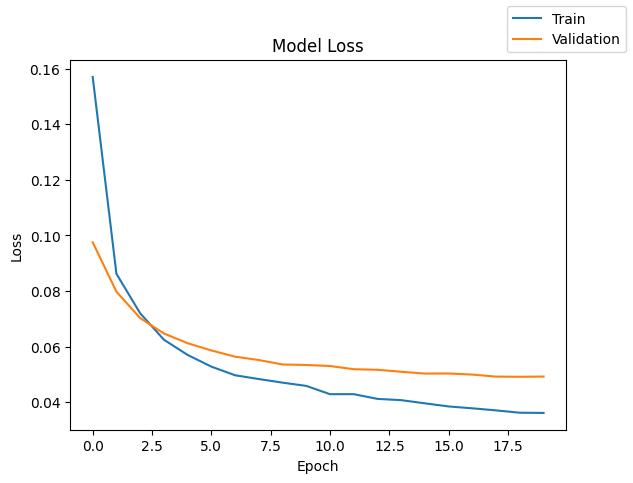

In [ ]:
plot(history, "loss")

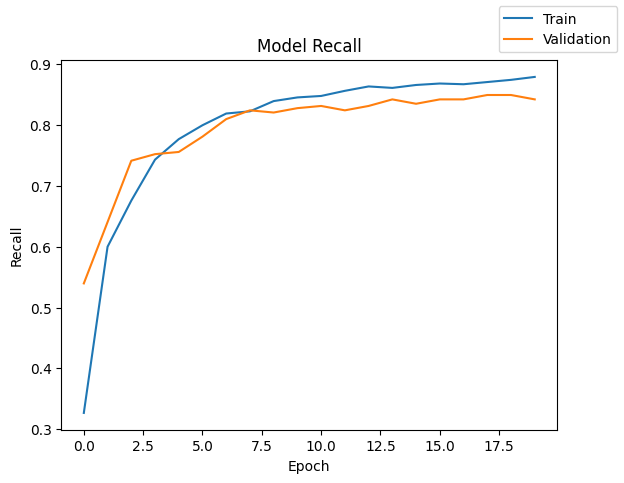

In [ ]:
plot(history, "Recall")

In [ ]:
model_4_train_perf = model_performance_classification_sklearn(model_4, X_train, y_train)
print("Training Performance - Model 4")
model_4_train_perf

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step
Training Performance - Model 4


Accuracy  Recall  Precision     F1
0     99.35   89.06       99.2  93.86

In [ ]:
model_4_val_perf = model_performance_classification_sklearn(model_4, X_val, y_val)
print("Validation Performance - Model 4")
model_4_val_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step
Validation Performance - Model 4


Accuracy  Recall  Precision     F1
0     99.02   84.17      97.91  90.52

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
Training Set - Model 4


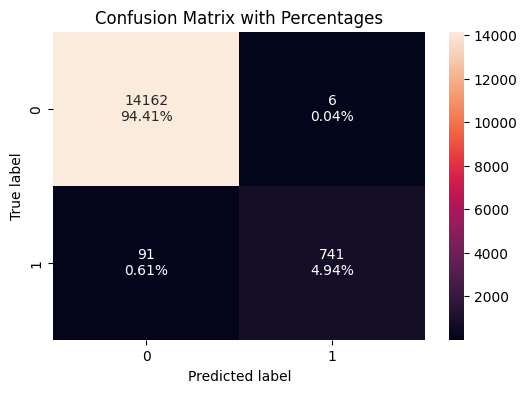

In [ ]:
confusion_matrix_sklearn(model_4, X_train, y_train)
print("Training Set - Model 4")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Validation Set - Model 4


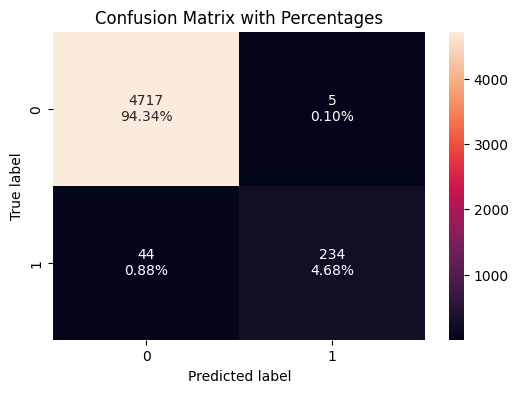

In [ ]:
confusion_matrix_sklearn(model_4, X_val, y_val)
print("Validation Set - Model 4")

In [ ]:
y_train_pred_4 = model_4.predict(X_train)
y_val_pred_4 = model_4.predict(X_val)

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step


In [ ]:
print("Classification Report - Training data Model_4", end="\n\n")
cr_train_model_4 = classification_report(y_train, y_train_pred_4 > .5, output_dict=True)
pd.DataFrame(cr_train_model_4).T

Classification Report - Training data Model_4



precision    recall  f1-score       support
0.0            0.993615  0.999577  0.996587  14168.000000
1.0            0.991968  0.890625  0.938569    832.000000
accuracy       0.993533  0.993533  0.993533      0.993533
macro avg      0.992792  0.945101  0.967578  15000.000000
weighted avg   0.993524  0.993533  0.993369  15000.000000

In [ ]:
print("Classification Report - Validation data Model_4", end="\n\n")
cr_val_model_4 = classification_report(y_val, y_val_pred_4 > .5, output_dict=True)
pd.DataFrame(cr_val_model_4).T

Classification Report - Validation data Model_4



precision    recall  f1-score    support
0.0            0.990758  0.998941  0.994833  4722.0000
1.0            0.979079  0.841727  0.905222   278.0000
accuracy       0.990200  0.990200  0.990200     0.9902
macro avg      0.984919  0.920334  0.950028  5000.0000
weighted avg   0.990109  0.990200  0.989851  5000.0000

#### Observation:
* **Model 4**
    - A very stable model - [It is good]
    - High loss result - [It is not good]
    - Loss difference between Train and Validation high - [It is not good = 1.309]
    - Isn't an Overfit model - [It is good]
    - Great **Recall** results for unseen data more than 83% - [It is acceptable]

In [ ]:
results.loc[4] = ["model_4", 3, [128, 256, 64], ["relu", "tanh", "relu"], epoch, batch_size, "SGD", [learning_rate, momentum], "he, xavier", "BatchNormalization", round(history.history["loss"][-1] * 100, 2), round(history.history["val_loss"][-1] * 100, 2), round(history.history["Recall"][-1] * 100, 2), round(history.history["val_Recall"][-1] * 100, 2), round(end-start, 2)]

In [ ]:
results

# model name  # hidden layers # neurons - hidden layer  \
0      model_0                1                     [64]   
1      model_1                2                [128, 64]   
2      model_2                3               [256, 128]   
3      model_3                2               [256, 128]   
4      model_4                3           [128, 256, 64]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                              [relu]        20          50       SGD   
1                        [relu, tanh]        20          50       SGD   
2                        [relu, tanh]        20          50       SGD   
3                        [relu, tanh]        20          50      Adam   
4                  [relu, tanh, relu]        20          50       SGD   

  learning rate, momentum weight initializer      regularization  train loss  \
0               [0.01, -]             xavier                   -        5.57   
1               [0.01, -]             xavier                   -        4.29   
2             [0.01, 0.5]             xavier                   -        3.39   
3              [0.001, -]         he, xavier                   -        2.06   
4             [0.01, 0.5]         he, xavier  BatchNormalization        3.62   

   validation loss  train recall  validation recall  time (secs)  
0             6.75         81.73              80.22        11.60  
1             5.41         85.22              83.09        12.55  
2             5.00         88.70              85.61        13.16  
3             5.41         92.07              85.25        14.39  
4             4.93         87.86              84.17        15.36

## Model 5

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
dropout_rate = .25

# Initializing the model - neural network
model_5 = Sequential()
model_5.add(Dense(256, activation="relu", kernel_initializer="he_normal", input_dim=X_train.shape[1])) # First hidden layer with "512 neurons", "ReLU" as activation function
model_5.add(Dropout(dropout_rate))
model_5.add(Dense(128, activation="tanh", kernel_initializer="he_normal")) # Third hidden layer with "128 neurons", "Tanh" as activation function
model_5.add(Dense(1, activation="sigmoid")) # output layer with "1 neuron" and an output function for binary classification "Sigmoid"

In [ ]:
learning_rate_adam # Equal to ==> .001 To improve the that the model learning patterns

model_5.compile(
    optimizer = Adam(learning_rate=learning_rate_adam),
    loss = "binary_crossentropy",
    metrics = ["Recall"]

)

In [ ]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,521 (170.00 KB)

 Trainable params: 43,521 (170.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start = time.time()
history = model_5.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epoch)
end = time.time()

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.5998 - loss: 0.0903 - val_Recall: 0.7842 - val_loss: 0.0638
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7776 - loss: 0.0597 - val_Recall: 0.8201 - val_loss: 0.0557
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8149 - loss: 0.0504 - val_Recall: 0.8309 - val_loss: 0.0552
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8377 - loss: 0.0466 - val_Recall: 0.8561 - val_loss: 0.0509
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8534 - loss: 0.0449 - val_Recall: 0.8561 - val_loss: 0.0515
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8654 - loss: 0.0420 - val_Recall: 0.8417 - val_loss: 0.0496
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8642 - loss: 0.0422 - val_Recall: 0.8597 - val_loss: 0.0475
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8798 - loss: 0.0392 - val_Recall: 0.8669 - val_loss: 0.0479
Epoch 9/

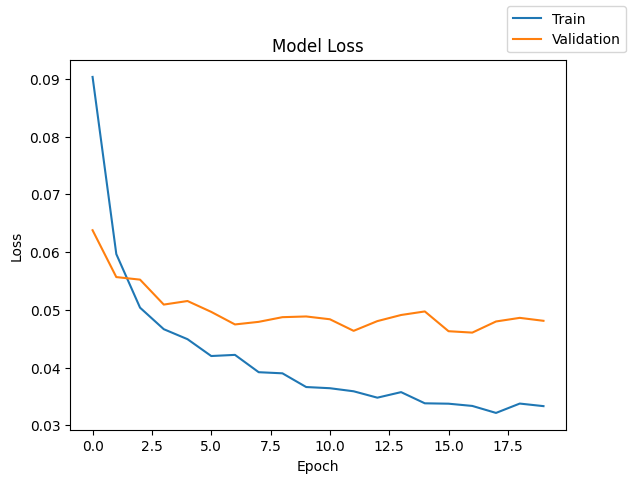

In [ ]:
plot(history, "loss")

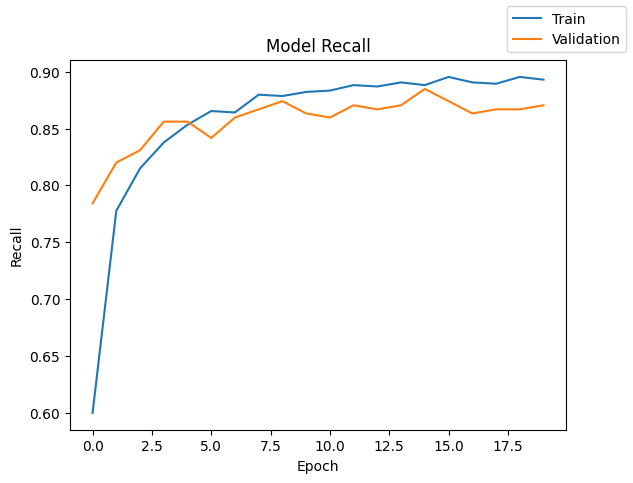

In [ ]:
plot(history, "Recall")

In [ ]:
model_5_train_perf = model_performance_classification_sklearn(model_5, X_train, y_train)
print("Training Performance - Model 5")
model_5_train_perf

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
Training Performance - Model 5


Accuracy  Recall  Precision     F1
0     99.45   90.75      99.21  94.79

In [ ]:
model_5_val_perf = model_performance_classification_sklearn(model_5, X_val, y_val)
print("valing Performance - Model 5")
model_5_val_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step
valing Performance - Model 5


Accuracy  Recall  Precision     F1
0     99.14   87.05      97.19  91.84

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
Training Set - Model 5


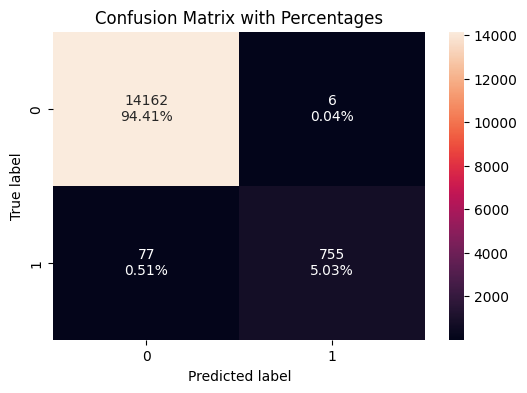

In [ ]:
confusion_matrix_sklearn(model_5, X_train, y_train)
print("Training Set - Model 5")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
Validation Set - Model 5


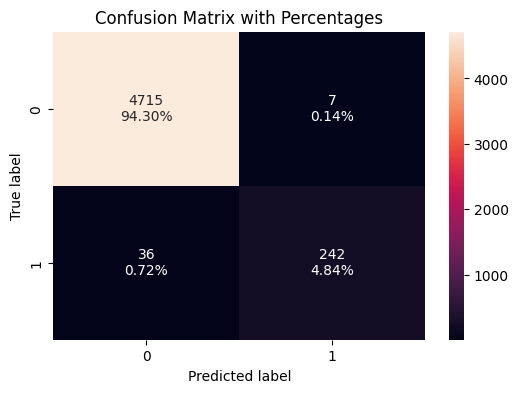

In [ ]:
confusion_matrix_sklearn(model_5, X_val, y_val)
print("Validation Set - Model 5")

In [ ]:
y_train_pred_5 = model_5.predict(X_train)
y_val_pred_5 = model_5.predict(X_val)

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step


In [ ]:
cr_train_model_5 = classification_report(y_train, y_train_pred_5 > .5, output_dict=True)
pd.DataFrame(cr_train_model_5).T

precision    recall  f1-score       support
0.0            0.994592  0.999577  0.997078  14168.000000
1.0            0.992116  0.907452  0.947897    832.000000
accuracy       0.994467  0.994467  0.994467      0.994467
macro avg      0.993354  0.953514  0.972488  15000.000000
weighted avg   0.994455  0.994467  0.994350  15000.000000

In [ ]:
cr_val_model_5 = classification_report(y_val, y_val_pred_5 > .5, output_dict=True)
pd.DataFrame(cr_val_model_5).T

precision    recall  f1-score    support
0.0            0.992423  0.998518  0.995461  4722.0000
1.0            0.971888  0.870504  0.918406   278.0000
accuracy       0.991400  0.991400  0.991400     0.9914
macro avg      0.982155  0.934511  0.956933  5000.0000
weighted avg   0.991281  0.991400  0.991177  5000.0000

#### Observation:
* **Model 5**
    - Stable model with low variations - [Needs improvement]
    - Low loss result - [It is good]
    - Loss difference between Train and Validation high - [Needs improvement = 1.479]
    - Isn't an Overfit model - [It is good]
    - Great **Recall** results for unseen data more than 86% - [It is good]

In [ ]:
results.loc[5] = ["model_5", 2, [256, 128], ["relu", "tanh"], epoch, batch_size, "Adam", [learning_rate_adam, "-"], ["he","he"], "Dropout", round(history.history["loss"][-1] * 100, 2), round(history.history["val_loss"][-1] * 100, 2), round(history.history["Recall"][-1] * 100, 2), round(history.history["val_Recall"][-1] * 100, 2), round(end-start, 2)]

In [ ]:
results

# model name  # hidden layers # neurons - hidden layer  \
0      model_0                1                     [64]   
1      model_1                2                [128, 64]   
2      model_2                3               [256, 128]   
3      model_3                2               [256, 128]   
4      model_4                3           [128, 256, 64]   
5      model_5                2               [256, 128]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                              [relu]        20          50       SGD   
1                        [relu, tanh]        20          50       SGD   
2                        [relu, tanh]        20          50       SGD   
3                        [relu, tanh]        20          50      Adam   
4                  [relu, tanh, relu]        20          50       SGD   
5                        [relu, tanh]        20          50      Adam   

  learning rate, momentum weight initializer      regularization  train loss  \
0               [0.01, -]             xavier                   -        5.57   
1               [0.01, -]             xavier                   -        4.29   
2             [0.01, 0.5]             xavier                   -        3.39   
3              [0.001, -]         he, xavier                   -        2.06   
4             [0.01, 0.5]         he, xavier  BatchNormalization        3.62   
5              [0.001, -]           [he, he]             Dropout        3.33   

   validation loss  train recall  validation recall  time (secs)  
0             6.75         81.73              80.22        11.60  
1             5.41         85.22              83.09        12.55  
2             5.00         88.70              85.61        13.16  
3             5.41         92.07              85.25        14.39  
4             4.93         87.86              84.17        15.36  
5             4.81         89.30              87.05        17.79

## Model 6

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_6 = Sequential()
model_6.add(Dense(64, activation="tanh", kernel_initializer="he_normal", input_dim=X_train.shape[1]))
model_6.add(Dropout(0.3))
model_6.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
model_6.add(BatchNormalization())
model_6.add(Dense(32, activation="tanh"))
model_6.add(Dense(1, activation="sigmoid"))

In [ ]:
model_6.compile(
    optimizer = Adam(learning_rate=.001),
    loss = "binary_crossentropy",
    metrics = ["Recall"]
)

In [ ]:
model_6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,617 (61.00 KB)

 Trainable params: 15,361 (60.00 KB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
start = time.time()
history = model_6.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=20)
end = time.time()

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.6298 - loss: 0.2213 - val_Recall: 0.6906 - val_loss: 0.0705
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7200 - loss: 0.0747 - val_Recall: 0.8201 - val_loss: 0.0561
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7861 - loss: 0.0605 - val_Recall: 0.8273 - val_loss: 0.0520
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8233 - loss: 0.0525 - val_Recall: 0.8561 - val_loss: 0.0498
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8341 - loss: 0.0497 - val_Recall: 0.8453 - val_loss: 0.0481
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8425 - loss: 0.0479 - val_Recall: 0.8525 - val_loss: 0.0499
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8486 - loss: 0.0457 - val_Recall: 0.8525 - val_loss: 0.0477
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8462 - loss: 0.0462 - val_Recall: 0.8489 - val_loss: 0.0472
Epoch 9/

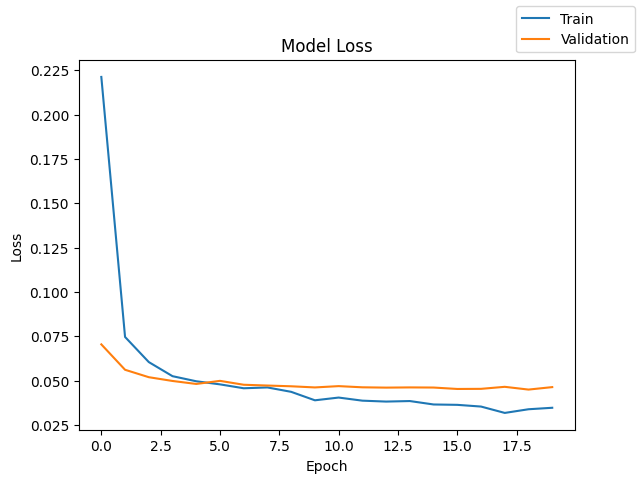

In [ ]:
plot(history, "loss")

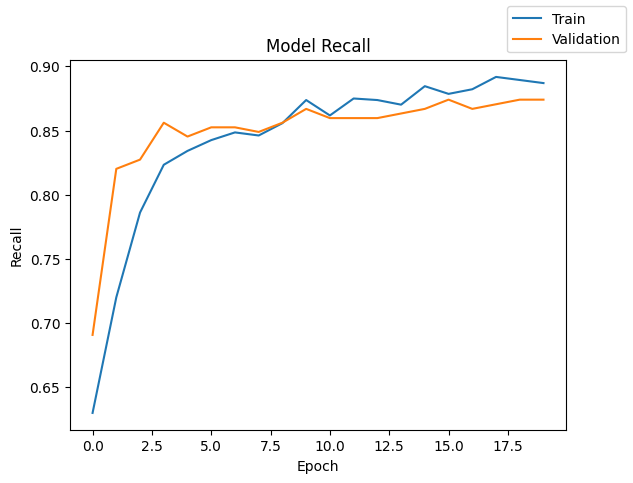

In [ ]:
plot(history, "Recall")

In [ ]:
model_6_train_perf = model_performance_classification_sklearn(model_6, X_train, y_train)
print("Training Performance - Model 6")
model_6_train_perf

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step
Training Performance - Model 6


Accuracy  Recall  Precision     F1
0     99.45   90.75      99.34  94.85

In [ ]:
model_6_val_perf = model_performance_classification_sklearn(model_6, X_val, y_val)
print("Validation Performance - Model 6")
model_6_val_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step
Validation Performance - Model 6


Accuracy  Recall  Precision     F1
0     99.18   87.41      97.59  92.22

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step
Training Set - Model 6


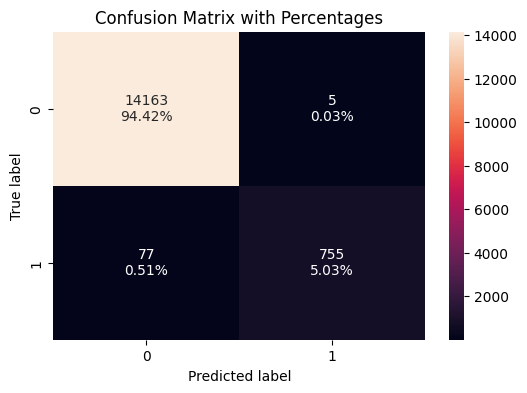

In [ ]:
confusion_matrix_sklearn(model_6, X_train, y_train)
print("Training Set - Model 6")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
Validation Set - Model 6


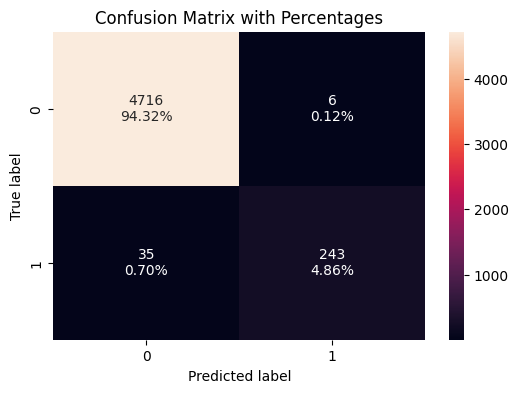

In [ ]:
confusion_matrix_sklearn(model_6, X_val, y_val)
print("Validation Set - Model 6")

In [ ]:
y_train_pred_6 = model_6.predict(X_train)
y_val_pred_6 = model_6.predict(X_val)

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step


In [ ]:
cr_train_model_6 = classification_report(y_train, y_train_pred_6 > .5, output_dict=True)
pd.DataFrame(cr_train_model_6).T

precision    recall  f1-score       support
0.0            0.994593  0.999647  0.997113  14168.000000
1.0            0.993421  0.907452  0.948492    832.000000
accuracy       0.994533  0.994533  0.994533      0.994533
macro avg      0.994007  0.953550  0.972803  15000.000000
weighted avg   0.994528  0.994533  0.994417  15000.000000

In [ ]:
cr_val_model_6 = classification_report(y_val, y_val_pred_6 > .5, output_dict=True)
pd.DataFrame(cr_val_model_6).T

precision    recall  f1-score    support
0.0            0.992633  0.998729  0.995672  4722.0000
1.0            0.975904  0.874101  0.922201   278.0000
accuracy       0.991800  0.991800  0.991800     0.9918
macro avg      0.984268  0.936415  0.958937  5000.0000
weighted avg   0.991703  0.991800  0.991587  5000.0000

#### Observation:
* **Model 6**
    - Stable model - [Needs improvement]
    - Low loss result - [It is good]
    - Loss difference between Train and Validation low/short - [It is good = 1.169]
    - Isn't an Overfit model - [It is good]
    - Great **Recall** results for unseen data more than 87% - [It is good]

In [ ]:
results.loc[6] = ["model_6", 3, [64, 128, 32], ["tanh", "relu", "tanh"], epoch, batch_size, "Adam", [learning_rate_adam, "-"], ["he","he"], ["Dropout", "BatchNormalization"], round(history.history["loss"][-1] * 100, 2), round(history.history["val_loss"][-1] * 100, 2), round(history.history["Recall"][-1] * 100, 2), round(history.history["val_Recall"][-1] * 100, 2), round(end-start, 2)]

In [ ]:
results

# model name  # hidden layers # neurons - hidden layer  \
0      model_0                1                     [64]   
1      model_1                2                [128, 64]   
2      model_2                3               [256, 128]   
3      model_3                2               [256, 128]   
4      model_4                3           [128, 256, 64]   
5      model_5                2               [256, 128]   
6      model_6                3            [64, 128, 32]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                              [relu]        20          50       SGD   
1                        [relu, tanh]        20          50       SGD   
2                        [relu, tanh]        20          50       SGD   
3                        [relu, tanh]        20          50      Adam   
4                  [relu, tanh, relu]        20          50       SGD   
5                        [relu, tanh]        20          50      Adam   
6                  [tanh, relu, tanh]        20          50      Adam   

  learning rate, momentum weight initializer                 regularization  \
0               [0.01, -]             xavier                              -   
1               [0.01, -]             xavier                              -   
2             [0.01, 0.5]             xavier                              -   
3              [0.001, -]         he, xavier                              -   
4             [0.01, 0.5]         he, xavier             BatchNormalization   
5              [0.001, -]           [he, he]                        Dropout   
6              [0.001, -]           [he, he]  [Dropout, BatchNormalization]   

   train loss  validation loss  train recall  validation recall  time (secs)  
0        5.57             6.75         81.73              80.22        11.60  
1        4.29             5.41         85.22              83.09        12.55  
2        3.39             5.00         88.70              85.61        13.16  
3        2.06             5.41         92.07              85.25        14.39  
4        3.62             4.93         87.86              84.17        15.36  
5        3.33             4.81         89.30              87.05        17.79  
6        3.47             4.64         88.70              87.41        16.99

# **Model Performance Comparison and Final Model Selection**

Now, in order to select the final model, we will compare the performances of all the models for the training and validation sets.

In [ ]:
# Creating the Performance Comparison

models_comparision_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T,
    ],
    axis=1,
)
models_comparision_df.columns = [
    "Training - Model 0",
    "Training - Model 1",
    "Training - Model 2",
    "Training - Model 3",
    "Training - Model 4",
    "Training - Model 5",
    "Training - Model 6",

]
print("***"*15, "Model 'Training Set' Performance Comparison 'MPC'", "***"*15)
models_comparision_df

********************************************* Model 'Training Set' Performance Comparison 'MPC' *********************************************


Training - Model 0  Training - Model 1  Training - Model 2  \
Accuracy                98.82               99.10               99.35   
Recall                  80.89               85.22               89.18   
Precision               97.40               98.34               99.07   
F1                      88.38               91.31               93.86   

           Training - Model 3  Training - Model 4  Training - Model 5  \
Accuracy                99.55               99.35               99.45   
Recall                  92.19               89.06               90.75   
Precision               99.74               99.20               99.21   
F1                      95.82               93.86               94.79   

           Training - Model 6  
Accuracy                99.45  
Recall                  90.75  
Precision               99.34  
F1                      94.85

In [ ]:
# Creating the Performance Comparison

models_comparision_df = pd.concat(
    [
        model_0_val_perf.T,
        model_1_val_perf.T,
        model_2_val_perf.T,
        model_3_val_perf.T,
        model_4_val_perf.T,
        model_5_val_perf.T,
        model_6_val_perf.T,
    ],
    axis=1,
)
models_comparision_df.columns = [
    "Validation - Model 0",
    "Validation - Model 1",
    "Validation - Model 2",
    "Validation - Model 3",
    "Validation - Model 4",
    "Validation - Model 5",
    "Validation - Model 6",
]
print("***"*15, "Model 'Validation Set' Performance Comparison 'MPC'", "***"*15)
models_comparision_df

********************************************* Model 'Validation Set' Performance Comparison 'MPC' *********************************************


Validation - Model 0  Validation - Model 1  Validation - Model 2  \
Accuracy                  98.78                 98.88                 99.10   
Recall                    80.22                 83.09                 85.61   
Precision                 97.38                 96.25                 97.94   
F1                        87.97                 89.19                 91.36   

           Validation - Model 3  Validation - Model 4  Validation - Model 5  \
Accuracy                  99.04                 99.02                 99.14   
Recall                    85.25                 84.17                 87.05   
Precision                 97.13                 97.91                 97.19   
F1                        90.80                 90.52                 91.84   

           Validation - Model 6  
Accuracy                  99.18  
Recall                    87.41  
Precision                 97.59  
F1                        92.22

#### **Observations**

* **Model 6 - Best Model**
    - Why Model 6 is the Best:
        - Higher Recall: Compared to earlier models, it achieves the best recall on validation/test sets.
        - Balanced Generalization: Batch normalization + dropout reduced overfitting.
        - Stable Training: With a generalization strong.
        - Business Alignment: Captures the majority of failing turbines and minimizes downtime cost.

Now, let's check the performance of the final model on the test set.

In [ ]:
best_model = model_6

In [ ]:
best_model_test_perf = model_performance_classification_sklearn(best_model, X_test, y_test)
best_model_test_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step


Accuracy  Recall  Precision     F1
0     99.04   86.17      96.43  91.01

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step


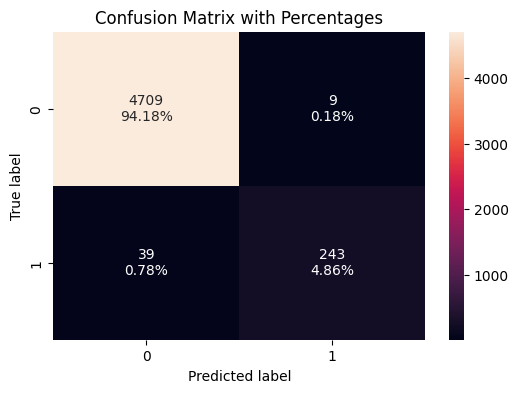

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
y_test_pred_best_model = best_model.predict(X_test)

cr_val_best_model = classification_report(y_test, y_test_pred_best_model > .5, output_dict=True)
round(pd.DataFrame(cr_val_best_model).T, 3)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step


precision  recall  f1-score  support
0.0               0.992   0.998     0.995  4718.00
1.0               0.964   0.862     0.910   282.00
accuracy          0.990   0.990     0.990     0.99
macro avg         0.978   0.930     0.953  5000.00
weighted avg      0.990   0.990     0.990  5000.00

# **Actionable Insights and Recommendations**

##### **Actionable Insights into the Projects**

- High Recall priority: The chosen model ensures minimal turbine failures go undetected, aligning directly with cost reduction strategy.
- Data-driven maintenance: Shifting from reactive to preventive maintenance improves turbine life cycle.
- Scalability: Framework can be expanded to predict other failure types, beyond binary classification.
- ROI potential: Preventing just a few turbine failures can offset the cost of building and maintaining this AI system.


##### **Recommendations for the Company**

1. Adopt Model 6 for Deployment
    - Prioritize recall to ensure failing turbines are flagged.
    - Integrate into turbine monitoring pipeline for real-time predictions.

2. Implement Continuous Monitoring
    - Retrain periodically as new turbine data arrives.
    - Track Recall drift over time to ensure reliability.

3. Operational Integration
    - Use predictions to schedule preventive maintenance.
    - Build a dashboard for engineers showing risk scores of each turbine.

4. Proactive maintenance reduces downtime → cost savings.
    - Improved turbine reliability enhances investor/partner trust.
    - Can scale the approach to other renewable energy assets (solar panels, wind farms).